# 1. Linear regressions

In [2]:
#Importing the modules
import os
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as mpl

import matplotlib.dates as mdates
import matplotlib.pyplot as plt

import seaborn as sns

# recommended by Pandas
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import glob
from glob import glob

import datetime

from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

In [3]:
# importing the cost functions from Scikit learn

# MAE - mean absolute error
from sklearn.metrics import mean_absolute_error

# MSE - mean squared error
from sklearn.metrics import mean_squared_error

# MSLE
from sklearn.metrics import mean_squared_log_error

# R2
from sklearn.metrics import r2_score

from math import sqrt

In [4]:
# TO BE USED FOR TRAINING PURPOSE ONLY

%store -r data_ofac_cleaned

# 1.1 Defining the functions

In [7]:
def shiftingvalues(df, iata_code, nbshift):

# ADD DESCRIPTION

    i = np.arange(1, nbshift+1, 1)
    for nb in i:
        df['x'+iata_code+str(nb)] = df[iata_code].shift(nb)
    return df.head(10)

In [8]:
"""Function to transform values to log nth difference
It takes a numpy array and take the log difference. We can specify the shift with the variable n.
Source : # https://groups.google.com/forum/#!topic/pystatsmodels/rdyNYlxJyg8 -> for the
np.diff(np.log. The function has been written by me
"""

def transdiff(source, n):
    
    c = np.diff(np.log(source), n=n)
    return c

In [9]:
"""Function to reverse transform values from log n-difference, and converts the data type to integer.
Source : # https://groups.google.com/forum/#!topic/pystatsmodels/rdyNYlxJyg8 -> for the
np.exp(np.cumsum(np.concatenate(([np.log(orig[0])], logdiff)))). The function has bee
written by me
"""

def revtransdiff(logdiff, orig): 
    d = np.exp(np.cumsum(np.concatenate(([np.log(orig[0])], logdiff))))
    d = d.astype(int)
    return d

In [10]:
#data_ofac_cleaned.drop(datetime.date(year=2010, month=4, day=17), axis=0, inplace=True)
#data_ofac_cleaned.drop(datetime.date(year=2010, month=4, day=18), axis=0, inplace=True)
#data_ofac_cleaned.drop(datetime.date(year=2010, month=4, day=19), axis=0, inplace=True)
#data_ofac_cleaned.drop(datetime.date(year=2010, month=4, day=20), axis=0, inplace=True)

In [11]:
data_ofac_cleaned.loc['2010-04-15':'2010-04-20']

ZRH      GVA     EAP  year month month_nb  FirstDifferenceEAP  \
date                                                                            
2010-04-15  55960.0  24898.0  9436.0  2010   Apr       04              -770.0   
2010-04-16  33371.0  16648.0  7938.0  2010   Apr       04             -1498.0   
2010-04-17  17088.0   9290.0  2330.0  2010   Apr       04             -5608.0   
2010-04-18  17088.0   9290.0  2330.0  2010   Apr       04                 0.0   
2010-04-19  17088.0   9290.0  2330.0  2010   Apr       04                 0.0   
2010-04-20  17088.0   9290.0  2330.0  2010   Apr       04                 0.0   

            FirstDifferenceGVA  FirstDifferenceZRH  LogTransformEAP  ...  \
date                                                                 ...   
2010-04-15             -6333.0             -5826.0         9.152287  ...   
2010-04-16             -8250.0            -22589.0         8.979417  ...   
2010-04-17             -7358.0            -16283.0         7.753624  ...   
2010-04-18                 0.0                 0.0         7.753624  ...   
2010-04-19                 0.0                 0.0         7.753624  ...   
2010-04-20                 0.0                 0.0         7.753624  ...   

            shift1_logdiffGVA  shift7_logdiffGVA  shift1_logdiffZRH  \
date                                                                  
2010-04-15           0.046936           0.054476           0.073511   
2010-04-16          -0.226624           0.129554          -0.099040   
2010-04-17          -0.402497           0.309128          -0.516950   
2010-04-18          -0.583352          -0.083534          -0.669311   
2010-04-19           0.000000          -0.268254           0.000000   
2010-04-20           0.000000          -0.217308           0.000000   

            shift7_logdiffZRH            GDP  population  GDP_stand  \
date                                                                  
2010-04-15           0.013044  591940.216341     1710100   0.855531   
2010-04-16           0.113806  591987.261450     1710156   0.855881   
2010-04-17           0.012373  592034.704971     1710211   0.856234   
2010-04-18           0.051587  592082.546903     1710267   0.856590   
2010-04-19          -0.058758  592130.787246     1710322   0.856949   
2010-04-20          -0.172674  592179.426001     1710377   0.857311   

            population_stand   GDP_diff  population_diff  
date                                                      
2010-04-15          0.728427  46.646698             55.0  
2010-04-16          0.728766  47.045109             56.0  
2010-04-17          0.729099  47.443521             55.0  
2010-04-18          0.729439  47.841932             56.0  
2010-04-19          0.729772  48.240343             55.0  
2010-04-20          0.730105  48.638755             55.0  

[6 rows x 48 columns]

In [12]:
data_ofac_cleaned['y_GVA'] = data_ofac_cleaned['GVA']

In [13]:
# using the function
shiftingvalues(data_ofac_cleaned, 'GVA', 31) 

ZRH        GVA       EAP  year month month_nb  \
date                                                              
1970-01-01  3680187.0  2254752.0  350708.0  1970   Jan       01   
1971-01-01  4173445.0  2487270.0  410088.0  1971   Jan       01   
1972-01-01  4407162.0  2657988.0  460797.0  1972   Jan       01   
1973-01-01  4916594.0  2882865.0  507258.0  1973   Jan       01   
1974-01-01  4981495.0  2845841.0  504500.0  1974   Jan       01   
1975-01-01  5039039.0  2882353.0  505512.0  1975   Jan       01   
1976-01-01  5450427.0  3149394.0  545988.0  1976   Jan       01   
1977-01-01  5903946.0  3352376.0  553753.0  1977   Jan       01   
1978-01-01  6194311.0  3504238.0  591042.0  1978   Jan       01   
1979-01-01  6463609.0  3599321.0  622482.0  1979   Jan       01   

            FirstDifferenceEAP  FirstDifferenceGVA  FirstDifferenceZRH  \
date                                                                     
1970-01-01                 NaN                 NaN                 NaN   
1971-01-01             59380.0            232518.0            493258.0   
1972-01-01             50709.0            170718.0            233717.0   
1973-01-01             46461.0            224877.0            509432.0   
1974-01-01             -2758.0            -37024.0             64901.0   
1975-01-01              1012.0             36512.0             57544.0   
1976-01-01             40476.0            267041.0            411388.0   
1977-01-01              7765.0            202982.0            453519.0   
1978-01-01             37289.0            151862.0            290365.0   
1979-01-01             31440.0             95083.0            269298.0   

            LogTransformEAP  ...  xGVA22  xGVA23  xGVA24  xGVA25  xGVA26  \
date                         ...                                           
1970-01-01        12.767709  ...     NaN     NaN     NaN     NaN     NaN   
1971-01-01        12.924127  ...     NaN     NaN     NaN     NaN     NaN   
1972-01-01        13.040713  ...     NaN     NaN     NaN     NaN     NaN   
1973-01-01        13.136775  ...     NaN     NaN     NaN     NaN     NaN   
1974-01-01        13.131323  ...     NaN     NaN     NaN     NaN     NaN   
1975-01-01        13.133327  ...     NaN     NaN     NaN     NaN     NaN   
1976-01-01        13.210352  ...     NaN     NaN     NaN     NaN     NaN   
1977-01-01        13.224474  ...     NaN     NaN     NaN     NaN     NaN   
1978-01-01        13.289642  ...     NaN     NaN     NaN     NaN     NaN   
1979-01-01        13.341470  ...     NaN     NaN     NaN     NaN     NaN   

            xGVA27  xGVA28  xGVA29  xGVA30  xGVA31  
date                                                
1970-01-01     NaN     NaN     NaN     NaN     NaN  
1971-01-01     NaN     NaN     NaN     NaN     NaN  
1972-01-01     NaN     NaN     NaN     NaN     NaN  
1973-01-01     NaN     NaN     NaN     NaN     NaN  
1974-01-01     NaN     NaN     NaN     NaN     NaN  
1975-01-01     NaN     NaN     NaN     NaN     NaN  
1976-01-01     NaN     NaN     NaN     NaN     NaN  
1977-01-01     NaN     NaN     NaN     NaN     NaN  
1978-01-01     NaN     NaN     NaN     NaN     NaN  
1979-01-01     NaN     NaN     NaN     NaN     NaN  

[10 rows x 80 columns]

In [14]:
def createsets(df, iata_code, nbshift):

# ADD DESCRIPTION

# defining the real values
    x_real = data_ofac_cleaned.loc[datetime.date(year=1984, month=1, day=1+nbshift):]['x'+iata_code+str(nbshift)]
    y_real = data_ofac_cleaned.loc[datetime.date(year=1984, month=1, day=1+nbshift):]['y_'+iata_code]

# defining the log diff values
    x_logdiff = np.diff(np.log(x_real))
    y_logdiff = np.diff(np.log(y_real))
    
    # defining the separation line for the train/test set
    uptoline = int(len(x_real)*0.70075)
    #print(uptoline)
    
# defining the log diff values for the train set
    x_train_logdiff = x_logdiff[:uptoline-1]
    y_train_logdiff = y_logdiff[:uptoline-1]

# defining the log diff values for the test set
    x_test_logdiff = x_logdiff[uptoline:]
    y_test_logdiff = y_logdiff[uptoline:]

# defining the real values for the train set
    x_train_real = x_real[:uptoline]
    y_train_real = y_real[:uptoline]

# defining the real values for the test set
    x_test_real = x_real[uptoline:]
    y_test_real = y_real[uptoline:]
    
    return (x_real, y_real,
            x_train_logdiff, y_train_logdiff,
           x_test_logdiff, y_test_logdiff,
           x_train_real, y_train_real,
            x_test_real, y_test_real
           )

In [15]:
def createsetscaled(df, iata_code, nbshift):

# ADD DESCRIPTION

# defining the real values
    x_real = data_ofac_cleaned.loc[datetime.date(year=1984, month=1, day=1+nbshift):]['x'+iata_code+str(nbshift)]
    y_real = data_ofac_cleaned.loc[datetime.date(year=1984, month=1, day=1+nbshift):]['y_'+iata_code]

# defining the log diff values
    x_logdiff = np.diff(np.log(x_real))
    y_logdiff = np.diff(np.log(y_real))
    
    # defining the separation line for the train/test set
    uptoline = int(len(x_real)*0.70)
    
# defining the log diff values for the train set
    x_train_logdiff = x_logdiff[:uptoline-1]
    y_train_logdiff = y_logdiff[:uptoline-1]

# defining the log diff values for the test set
    x_test_logdiff = x_logdiff[uptoline:]
    y_test_logdiff = y_logdiff[uptoline:]

# defining the real values for the train set
    x_train_real = x_real[:uptoline]
    y_train_real = y_real[:uptoline]

# defining the real values for the test set
    x_test_real = x_real[uptoline:]
    y_test_real = y_real[uptoline:]

# scaling the sets
    scaler = StandardScaler()
    scaler.fit(x_train_logdiff.reshape(-1, 1))
    
    x_train_logdiff_scaled = scaler.transform(x_train_logdiff.reshape(-1, 1))
    y_train_logdiff_scaled = scaler.transform(y_train_logdiff.reshape(-1, 1))
    
    x_test_logdiff_scaled = scaler.transform(x_test_logdiff.reshape(-1, 1))
    y_test_logdiff_scaled = scaler.transform(y_test_logdiff.reshape(-1, 1))    
    
    return (x_real, y_real,
            x_train_logdiff_scaled, y_train_logdiff_scaled,
            x_test_logdiff_scaled, y_test_logdiff_scaled
           )

In [16]:
# ADD DESCRIPTION

# function for the root_mean_squared_error
def RMSE(y_true, y_pred):
    return sqrt(mean_squared_error(y_true, y_pred))

# function for the root_mean_squared_log_error
def RMSLE(y_true, y_pred):
    return sqrt(mean_squared_log_error(y_true, y_pred))

def costfunctions(y_true, y_pred):

    MAE = mean_absolute_error(y_true, y_pred)
    MSE = mean_squared_error(y_true, y_pred)
    MSLE = mean_squared_log_error(y_true, y_pred)
    RMSE_res = RMSE(y_true, y_pred)
    RMSLE_res = RMSLE(y_true, y_pred)
    R2 = r2_score(y_true, y_pred)
    
    print('Results')
    print('MAE   : {:.1f}'.format(MAE))
    print('MSE   : {:.1f}'.format(MSE))
    print('MSLE  : {:.3f}'.format(MSLE))
    print('RMSE  : {:.1f}'.format(RMSE_res))
    print('RMSLE : {:.3f}'.format(RMSLE_res))
    print('R2    : {:.3f}'.format(R2))
    
    return(MAE, MSE, MSLE, RMSE_res, RMSLE_res, R2)

In [17]:
# Plotting

def resulplot(y_pred, y_real, dfindex, iata):
    plt.style.use('ggplot')
    plt.figure(figsize=(16,10), dpi=100)

    # setting the x axis
    x = dfindex.index

    plt.plot(x, y_pred, marker='', color='limegreen', linewidth=1, alpha=1, label='forecast')
    plt.plot(x, y_real, marker='', color='seagreen', linewidth=1, alpha=0.4, label='true values')

    # Add title & legend
    plt.title('Evolution of the trafic passengers at {} airport - real VS forecasted with the TEST set'.format(iata), loc='left', fontsize=14, fontweight=0, color='black')
    plt.xlabel("Years")
    plt.ylabel("# passengers")
    plt.legend()
    plt.show()

In [18]:
# ADD DESCRIPTION 

def residualsplotw(y_real, y_pred):
    residuals = [y_real[i] - y_pred[i] for i in range(len(y_pred))]
    residuals = pd.DataFrame(residuals)

    fig = plt.figure(figsize=(15, 4.5), dpi=80)

    sub1 = fig.add_subplot(121) # instead of plt.subplot(2, 2, 1)
    sub1.set_title('Residuals', fontsize=17, color="seagreen")
    plt.plot(residuals, color='seagreen')
    #sub1.set_xticks(list(range(0,52,10)))
    #sub1.set_xticklabels(list(range(0,52,10)))

    sub2 = fig.add_subplot(122)
    sub2.set_title('Distribution', fontsize=17, color="seagreen")
    sns.kdeplot(residuals[0], shade=True, color="seagreen", legend=False)
    plt.show()
    
    return(residuals.describe())

In [19]:
def createsetsmultifeaturesMS(df, iata_code, nbshift, lg1):

# ADD DESCRIPTION

# defining the real values

    # defining x_real dataset
    nbshiftserie = len(np.arange(0, nbshift, 7)[1:])  # defines the # of times we find a multiple of 7
    nbturn = np.arange(1, nbshiftserie+1, 1)  # defines the # of loop to execute
    nbincr = len(np.arange(1, len(np.arange(0, nbshift, 7)[1:])+1, 1))*7  # defines the # of days to shift

    print('# multiples of 7 : {}'.format(nbshiftserie))
    print('# loops to execute : {}'.format(nbturn))
    print('# of days to shift : {}'.format(nbincr))
    
    x_real = pd.DataFrame()
    x_logdiff = pd.DataFrame()

    if lg1 == 'y':
        x_real[1] = (data_ofac_cleaned.loc[datetime.date(year=1984, month=1, day=1+nbincr):datetime.date(year=2019, month=12, day=31)]['x'+iata_code+str(1)])
        x_logdiff[1] = np.diff(np.log(x_real[1]))

    for i in nbturn:
        lag = i * 7
        x_real[lag] = (data_ofac_cleaned.loc[datetime.date(year=1984, month=1, day=1+nbincr):datetime.date(year=2019, month=12, day=31)]['x'+iata_code+str(lag)])
        x_logdiff[lag] = np.diff(np.log(x_real[lag]))
    
    print(x_real.head(5))
    
    x_real = np.column_stack([x_real])  # stacking the columns to be interpreted with Scikit learn
    x_logdiff = np.column_stack([x_logdiff])
    
    # defining y_real dataset
    y_real = data_ofac_cleaned.loc[datetime.date(year=1984, month=1, day=1+nbincr):datetime.date(year=2019, month=12, day=31)]['y_'+iata_code]

# defining the log diff values

    #x_logdiff = np.diff(np.log(x_real))
    y_logdiff = np.diff(np.log(y_real))
    
    # defining the separation line for the train/test set
    uptoline = int(len(x_real)*0.70075)
    print('Line nb of train/test sets : {}'.format(uptoline))
    
# defining the log diff values for the train set
    x_train_logdiff = x_logdiff[:uptoline-1]
    y_train_logdiff = y_logdiff[:uptoline-1]

# defining the log diff values for the test set
    x_test_logdiff = x_logdiff[uptoline:]
    y_test_logdiff = y_logdiff[uptoline:]

# defining the real values for the train set
    x_train_real = x_real[:uptoline]
    y_train_real = y_real[:uptoline]

# defining the real values for the test set
    x_test_real = x_real[uptoline:]
    y_test_real = y_real[uptoline:]
    
    return (x_logdiff, y_logdiff,
            x_real, y_real,
            x_train_logdiff, y_train_logdiff,
           x_test_logdiff, y_test_logdiff,
           x_train_real, y_train_real,
            x_test_real, y_test_real
           )

In [20]:
def createsetsmultifeatures(df, iata_code, nbshift):

# ADD DESCRIPTION

# defining the real values

    # defining x_real dataset
    nbshiftserie = np.arange(1, nbshift+1, 1)
    
    x_real = pd.DataFrame()
    x_logdiff = pd.DataFrame()
    
    for i in nbshiftserie:
        x_real[i] = (data_ofac_cleaned.loc[datetime.date(year=1984, month=1, day=1+nbshift):datetime.date(year=2019, month=12, day=31)]['x'+iata_code+str(i)])
        x_logdiff[i] = np.diff(np.log(x_real[i]))
    
    x_real = np.column_stack([x_real])  # stacking the columns to be interpreted with Scikit learn
    x_logdiff = np.column_stack([x_logdiff])
    
    # defining y_real dataset
    y_real = data_ofac_cleaned.loc[datetime.date(year=1984, month=1, day=1+nbshift):datetime.date(year=2019, month=12, day=31)]['y_'+iata_code]

# defining the log diff values

    #x_logdiff = np.diff(np.log(x_real))
    y_logdiff = np.diff(np.log(y_real))
    
    # defining the separation line for the train/test set
    uptoline = int(len(x_real)*0.70075)
    #print(uptoline)
    
# defining the log diff values for the train set
    x_train_logdiff = x_logdiff[:uptoline-1]
    y_train_logdiff = y_logdiff[:uptoline-1]

# defining the log diff values for the test set
    x_test_logdiff = x_logdiff[uptoline:]
    y_test_logdiff = y_logdiff[uptoline:]

# defining the real values for the train set
    x_train_real = x_real[:uptoline]
    y_train_real = y_real[:uptoline]

# defining the real values for the test set
    x_test_real = x_real[uptoline:]
    y_test_real = y_real[uptoline:]
    
    return (x_logdiff, y_logdiff,
            x_real, y_real,
            x_train_logdiff, y_train_logdiff,
           x_test_logdiff, y_test_logdiff,
           x_train_real, y_train_real,
            x_test_real, y_test_real
           )

In [21]:
def createsetshuber(df, iata_code, nbshift):

# ADD DESCRIPTION

# defining the real values
    x_real = data_ofac_cleaned.loc[datetime.date(year=1984, month=1, day=1+nbshift):]['x'+iata_code+str(nbshift)]
    y_real = data_ofac_cleaned.loc[datetime.date(year=1984, month=1, day=1+nbshift):]['y_'+iata_code]

# defining the log diff values
    x_logdiff = np.diff(np.log(x_real))
    y_logdiff = np.diff(np.log(y_real))
    
    # defining the separation line for the train/test set
    uptoline = int(len(x_real)*0.70075)
    print(uptoline)
    
# defining the log diff values for the train set
    x_train_logdiff = x_logdiff[:uptoline-1]
    y_train_logdiff = y_logdiff[:uptoline-1]

# defining the log diff values for the test set
    x_test_logdiff = x_logdiff[uptoline:]
    y_test_logdiff = y_logdiff[uptoline:]

# defining the real values for the train set
    x_train_real = x_real[:uptoline]
    y_train_real = y_real[:uptoline]

# defining the real values for the test set
    x_test_real = x_real[uptoline:]
    y_test_real = y_real[uptoline:]
    
    return (x_real, y_real,
            x_train_logdiff, y_train_logdiff,
           x_test_logdiff, y_test_logdiff,
           x_train_real, y_train_real,
            x_test_real, y_test_real
           )

In [22]:
# ADD DESCRIPTION 

def searchresno(df, cost1, cost2):

    fig = plt.figure(figsize=(12.5, 4.5), dpi=80)

    sub1 = fig.add_subplot(121) # instead of plt.subplot(2, 2, 1)
    sub1.set_title('Results {}'.format(cost1), fontsize=17, color="seagreen")
    plt.plot(df[cost1])

    sub2 = fig.add_subplot(122)
    sub2.set_title('Results {}'.format(cost2), fontsize=17, color="seagreen")
    plt.plot(df[cost2])
    plt.show()

In [23]:
# ADD DESCRIPTION 

def searchres(df, col, cost1, cost2):

    fig = plt.figure(figsize=(12.5, 4.5), dpi=80)

    sub1 = fig.add_subplot(121) # instead of plt.subplot(2, 2, 1)
    sub1.set_title('Results {}'.format(cost1), fontsize=17, color="seagreen")
    plt.plot(df[cost1][df[col]=='n'])
    plt.plot(df[cost1][df[col]=='y'])

    sub2 = fig.add_subplot(122)
    sub2.set_title('Results {}'.format(cost2), fontsize=17, color="seagreen")
    plt.plot(df[cost2][df[col]=='n'])
    plt.plot(df[cost2][df[col]=='y'])
    plt.show()

In [24]:
# ADD DESCRIPTION 

def scatterres(x_test_real, y_test_real, y_te_pred):

    plt.figure(figsize=(16,10), dpi=80)

    
    # Plotting
    plt.style.use('ggplot')

    # Plot outputs
    plt.scatter(x_test_real, y_test_real,  color='seagreen')
    plt.plot(x_test_real, y_te_pred, color='green', linewidth=3)
    plt.title('Forecasted VS real values', fontsize=16)

    plt.show()

In [25]:
# ADD DESCRIPTION 

def plotressearch(df, indicator):

# plotting the cost functions
    plt.style.use('ggplot')

    plt.figure(figsize=(15,4))
    plt.subplots_adjust(wspace=0.5)

    plt.subplot(1,4,1)
    plt.title('MAE test')
    plt.plot(df[indicator], df['MAE te'])
    plt.xlabel(indicator)
    plt.ylabel('MAE')

    plt.subplot(1,4,2)
    plt.title('MSLE')
    plt.plot(df[indicator], df['MSLE'])
    plt.xlabel(indicator)
    plt.ylabel('MSLE')

    plt.subplot(1,4,3)
    plt.title('RMSLE')
    plt.plot(df[indicator], df['RMSLE'])
    plt.xlabel(indicator)
    plt.ylabel('RMSLE')

    plt.subplot(1,4,4)
    plt.title('R2')
    plt.plot(df[indicator], df['R2'])
    plt.xlabel(indicator)
    plt.ylabel('R2')

    plt.show()

In [26]:
def createsetsmultifeaturesMSadd(df, iata_code, nbshift, lg1, adcol):

# ADD DESCRIPTION

# defining the real values

    # defining x_real dataset
    nbshiftserie = len(np.arange(0, nbshift, 7)[1:])  # defines the # of times we find a multiple of 7
    nbturn = np.arange(1, nbshiftserie+1, 1)  # defines the # of loop to execute
    nbincr = len(np.arange(1, len(np.arange(0, nbshift, 7)[1:])+1, 1))*7  # defines the # of days to shift
    
    print('# multiples of 7 : {}'.format(nbshiftserie))
    print('# loops to execute : {}'.format(nbturn))
    print('# of days to shift : {}'.format(nbincr))
    
    x_real = pd.DataFrame()
    x_logdiff = pd.DataFrame()
    
    for col in df[adcol].columns:
        x_real[col] = (df.loc[datetime.date(year=1984, month=1, day=1+nbincr):datetime.date(year=2019, month=12, day=31)][col])
        x_logdiff[col] = x_real[col].loc[datetime.date(year=1984, month=1, day=1+nbincr+1):datetime.date(year=2019, month=12, day=31)]
            #one more day is added as the logdiff doesn't take into account the first day        

    if lg1 == 'y':
        x_real[1] = (df.loc[datetime.date(year=1984, month=1, day=1+nbincr):datetime.date(year=2019, month=12, day=31)]['x'+iata_code+str(1)])
        x_logdiff[1] = np.diff(np.log(x_real[1]))            
            
    for i in nbturn:
        lag = i * 7
        x_real[lag] = (df.loc[datetime.date(year=1984, month=1, day=1+nbincr):datetime.date(year=2019, month=12, day=31)]['x'+iata_code+str(lag)])
        x_logdiff[lag] = np.diff(np.log(x_real[lag]))        
            
        
    print(x_real.head(5))
    
    x_real = np.column_stack([x_real])  # stacking the columns to be interpreted with Scikit learn
    x_logdiff = np.column_stack([x_logdiff])
    
    # defining y_real dataset
    y_real = df.loc[datetime.date(year=1984, month=1, day=1+nbincr):datetime.date(year=2019, month=12, day=31)]['y_'+iata_code]

# defining the log diff values

    #x_logdiff = np.diff(np.log(x_real))
    y_logdiff = np.diff(np.log(y_real))
    
    # defining the separation line for the train/test set
    uptoline = int(len(x_real)*0.70075)
    print('Line nb of train/test sets : {}'.format(uptoline))
    
# defining the log diff values for the train set
    x_train_logdiff = x_logdiff[:uptoline-1]
    y_train_logdiff = y_logdiff[:uptoline-1]

# defining the log diff values for the test set
    x_test_logdiff = x_logdiff[uptoline:]
    y_test_logdiff = y_logdiff[uptoline:]

# defining the real values for the train set
    x_train_real = x_real[:uptoline]
    y_train_real = y_real[:uptoline]

# defining the real values for the test set
    x_test_real = x_real[uptoline:]
    y_test_real = y_real[uptoline:]
    
    return (x_logdiff, y_logdiff,
            x_real, y_real,
            x_train_logdiff, y_train_logdiff,
           x_test_logdiff, y_test_logdiff,
           x_train_real, y_train_real,
            x_test_real, y_test_real
           )

# 1.2. Univariate Linear Regression

### 1.2.1. Time lags only

#### 1.2.1.1. Linear regression over single day lags

#### 1.2.1.1.1. Linear regression over single day lags

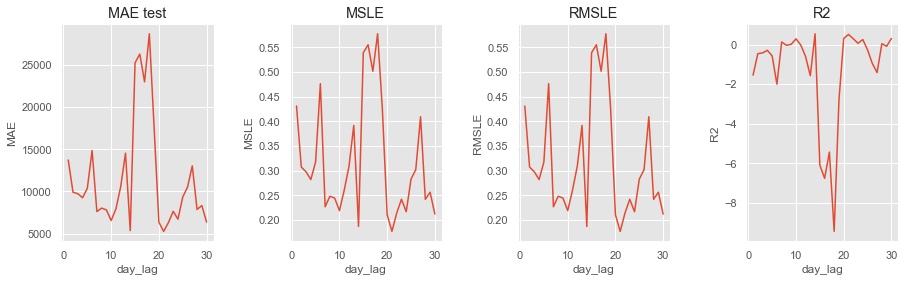

Linear regression - best day_lag which minimizes MAE : 21


In [321]:
# 1.2.1.1.1 LR over the day lags

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr111res = []

for i in np.arange(1,31,1):
    
    # creating the datasets
    x_real, y_real, x_train_logdiff, y_train_logdiff, x_test_logdiff, y_test_logdiff, x_train_real, y_train_real, x_test_real, y_test_real = createsets(data_ofac_cleaned, 'GVA', i)

    lr.fit(x_train_logdiff.reshape(-1, 1), y_train_logdiff)

    # predicting
    y_tr_pred = lr.predict(x_train_logdiff.reshape(-1, 1))
    y_te_pred = lr.predict(x_test_logdiff.reshape(-1, 1))

    # converting the predicted values
    y_tr_pred_r = revtransdiff(y_tr_pred, y_train_real)
    y_te_pred_r = revtransdiff(y_te_pred, y_test_real)
   
    # cost functions
    lr111res.append({
        'day_lag':i,
        'coefficients':lr.coef_,
        'intercept':lr.intercept_,
        'MAE tr':mean_absolute_error(y_train_real, y_tr_pred_r),
        'MAE te':mean_absolute_error(y_test_real, y_te_pred_r),
        'MSE':mean_squared_error(y_test_real, y_te_pred_r),
        'MSLE':sqrt(mean_squared_log_error(y_test_real, y_te_pred_r)),
        'RMSE':RMSE(y_test_real, y_te_pred_r),
        'RMSLE':RMSLE(y_test_real, y_te_pred_r),
        'R2':r2_score(y_test_real, y_te_pred_r),
    })
    
lr111res = pd.DataFrame(lr111res)

plotressearch(lr111res, 'day_lag')

# finding the value which maximimizes MSLE and saving it into a variable to be reused later
lr111best = lr111res[lr111res['MAE te'] == lr111res['MAE te'].min()]['day_lag'].values[0]
print('Linear regression - best day_lag which minimizes MAE : {:.0f}'.format(lr111best))

Coefficients: [0.53037404]
Intercept:    4.6289267918259264e-05
Results
MAE   : 3877.1
MSE   : 22063773.5
MSLE  : 0.066
RMSE  : 4697.2
RMSLE : 0.257
R2    : 0.553
Results
MAE   : 5269.5
MSE   : 50308684.1
MSLE  : 0.031
RMSE  : 7092.9
RMSLE : 0.177
R2    : 0.512


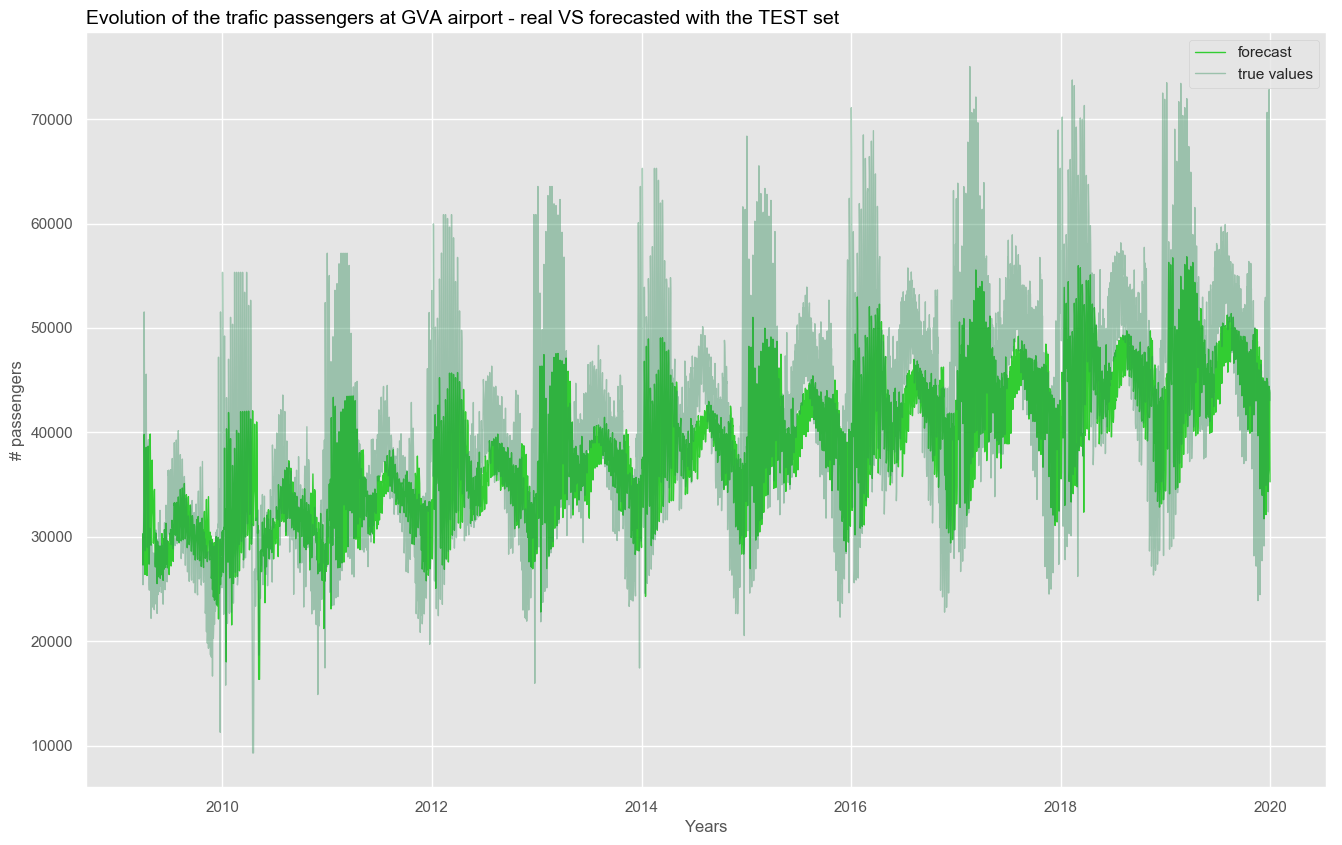

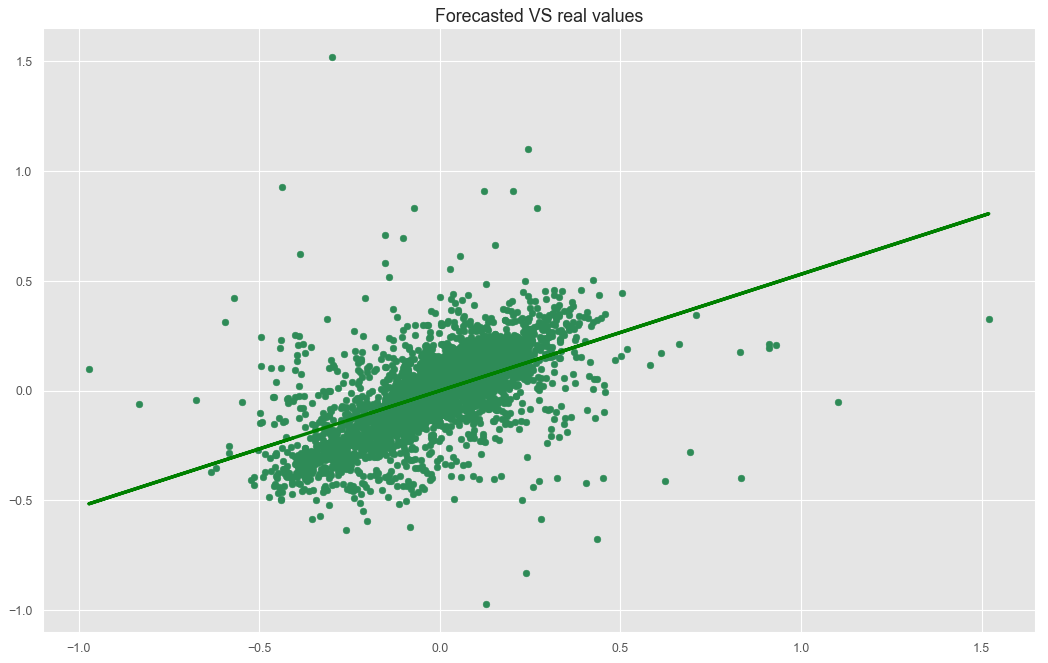

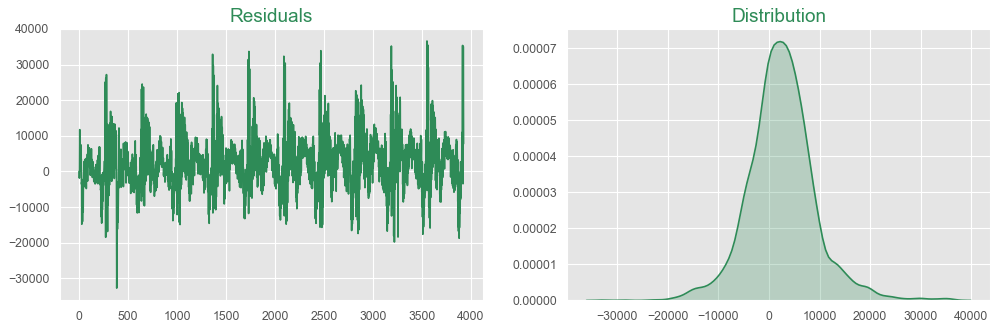

In [322]:
# 1.2.1.1.1 Selecting with LR the best day lag

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
    
# creating the datasets
x_real, y_real, x_train_logdiff, y_train_logdiff, x_test_logdiff, y_test_logdiff, x_train_real, y_train_real, x_test_real, y_test_real = createsets(data_ofac_cleaned, 'GVA', lr111best)

lr.fit(x_train_logdiff.reshape(-1, 1), y_train_logdiff)

# predicting
y_tr_pred = lr.predict(x_train_logdiff.reshape(-1, 1))
y_te_pred = lr.predict(x_test_logdiff.reshape(-1, 1))

# converting the predicted values
y_tr_pred_r = revtransdiff(y_tr_pred, y_train_real)
y_te_pred_r = revtransdiff(y_te_pred, y_test_real)

# coefficients
print('Coefficients:', lr.coef_)
print('Intercept:   ', lr.intercept_)

costfunctions(y_train_real, y_tr_pred_r)
costfunctions(y_test_real, y_te_pred_r)

lr111bestfinal = pd.DataFrame()
lr111bestfinal['x_test_real'] = x_test_real
lr111bestfinal['y_test_real'] = y_test_real
lr111bestfinal['y_test_pred'] = y_te_pred_r

resulplot(y_te_pred_r, y_test_real, iata='GVA', dfindex=y_test_real)
scatterres(x_test_logdiff, y_test_logdiff, y_te_pred)
residuals = residualsplotw(y_test_real, y_te_pred_r)

#### 1.2.1.1.2. Linear regression over single day lags using TimeSeriesSplit

In [323]:
# 1.2.1.1.2 Linear model with log diff values and TimeSeriesSplit

nbsplit = 7
iata_code = 'GVA'

from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=nbsplit)     # info and source code at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html

tss_score_gr = []

for nbshift in np.arange(1,31,1):
    
    # selecting the datasets
    X = data_ofac_cleaned['x'+iata_code+str(nbshift)].loc[datetime.date(year=1984, month=1, day=1+nbshift):]
    y = data_ofac_cleaned['y_GVA'].loc[datetime.date(year=1984, month=1, day=1+nbshift):]

    for train_index, test_index in tscv.split(X):
        #print("TRAIN:", train_index, "TEST:", test_index)

    # preparing the data
        # original train/test split
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index] 
        
        # log differencing the split
        X_train_diff = transdiff(source = X_train,n=1)
        X_test_diff = transdiff(source = X_test,n=1)
        y_train_diff = transdiff(source = y_train,n=1)
        y_test_diff = transdiff(source = y_test,n=1)

    # model
        # linear regression
        lr = LinearRegression()
        lr.fit(X_train_diff.reshape(-1, 1), y_train_diff)

        # predicting
        y_pred = lr.predict(X_test_diff.reshape(-1, 1))
        
    # the data needs to be retransformed to their original values
        # retransforming the data
        y_pred_retrans = revtransdiff(y_pred, y_test)
        
    # cost functions
        tss_score_gr.append({
            'nb split':nbsplit,
            'nb day shift':nbshift,
            'coefficients':lr.coef_,
            'intercept':lr.intercept_,
            'MAE':mean_absolute_error(y_test, y_pred_retrans),
            'MSE':mean_squared_error(y_test, y_pred_retrans),
            'MSLE':sqrt(mean_squared_log_error(y_test, y_pred_retrans)),
            'RMSE':RMSE(y_test, y_pred_retrans),
            'RMSLE':RMSLE(y_test, y_pred_retrans),
            'R2':r2_score(y_test, y_pred_retrans),
        })

tss_score_gr = pd.DataFrame(tss_score_gr)

best_tss_score_gr = tss_score_gr['nb day shift'][tss_score_gr['MAE'] == tss_score_gr['MAE'].min()].values[0]
print('Best lag (# days) that minimises the MAE : lag {}'.format(best_tss_score_gr))

Best lag (# days) that minimises the MAE : lag 7


Results with the best score previously reached with a lag of 7 days
TRAIN: [   0    1    2 ... 1645 1646 1647] TEST: [1648 1649 1650 ... 3287 3288 3289]
TRAIN: [   0    1    2 ... 3287 3288 3289] TEST: [3290 3291 3292 ... 4929 4930 4931]
TRAIN: [   0    1    2 ... 4929 4930 4931] TEST: [4932 4933 4934 ... 6571 6572 6573]
TRAIN: [   0    1    2 ... 6571 6572 6573] TEST: [6574 6575 6576 ... 8213 8214 8215]
TRAIN: [   0    1    2 ... 8213 8214 8215] TEST: [8216 8217 8218 ... 9855 9856 9857]
TRAIN: [   0    1    2 ... 9855 9856 9857] TEST: [ 9858  9859  9860 ... 11497 11498 11499]
TRAIN: [    0     1     2 ... 11497 11498 11499] TEST: [11500 11501 11502 ... 13139 13140 13141]
Coefficients: [0.66563534]
Intercept:    -5.05222848673564e-06
Results
MAE   : 3515.1
MSE   : 23346865.8
MSLE  : 0.013
RMSE  : 4831.9
RMSLE : 0.112
R2    : 0.731


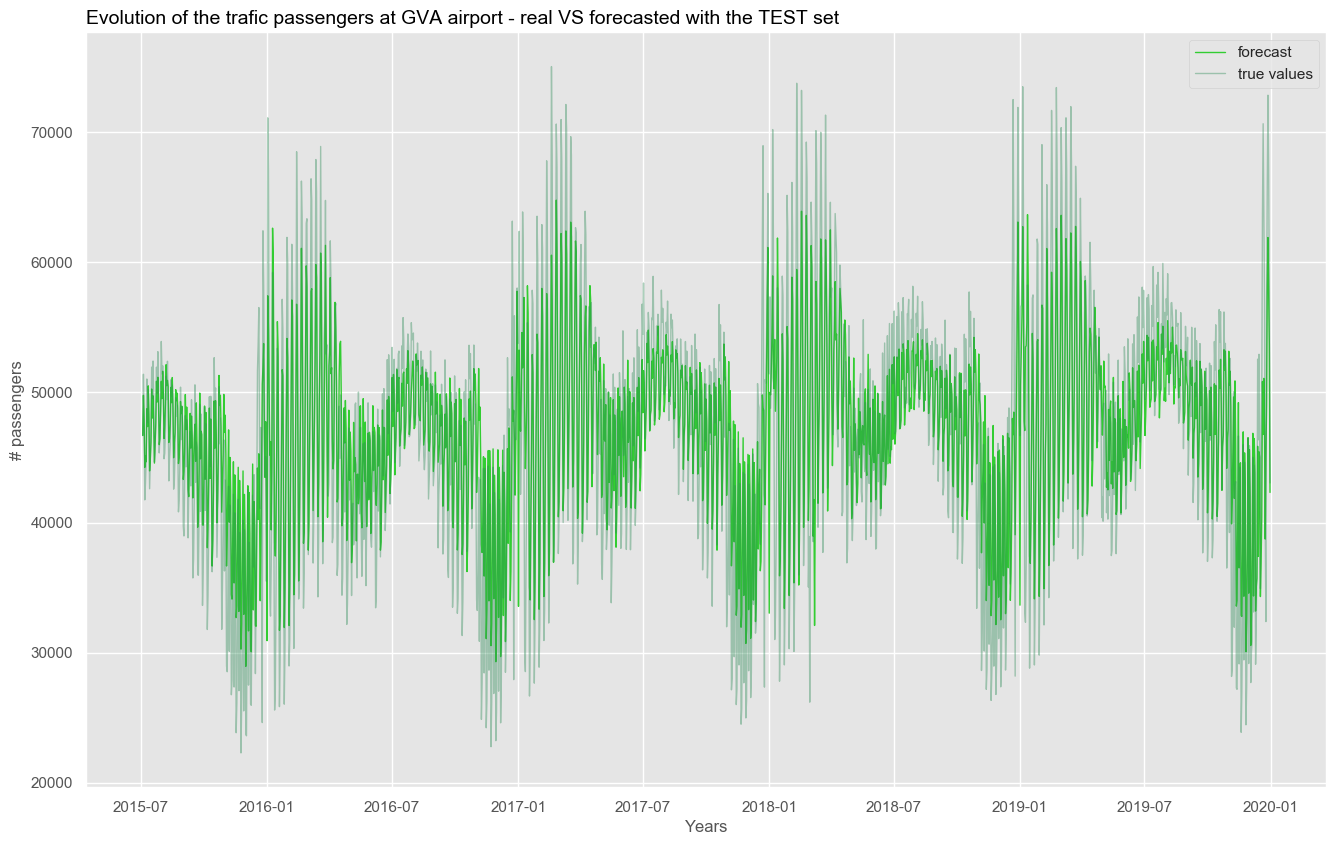

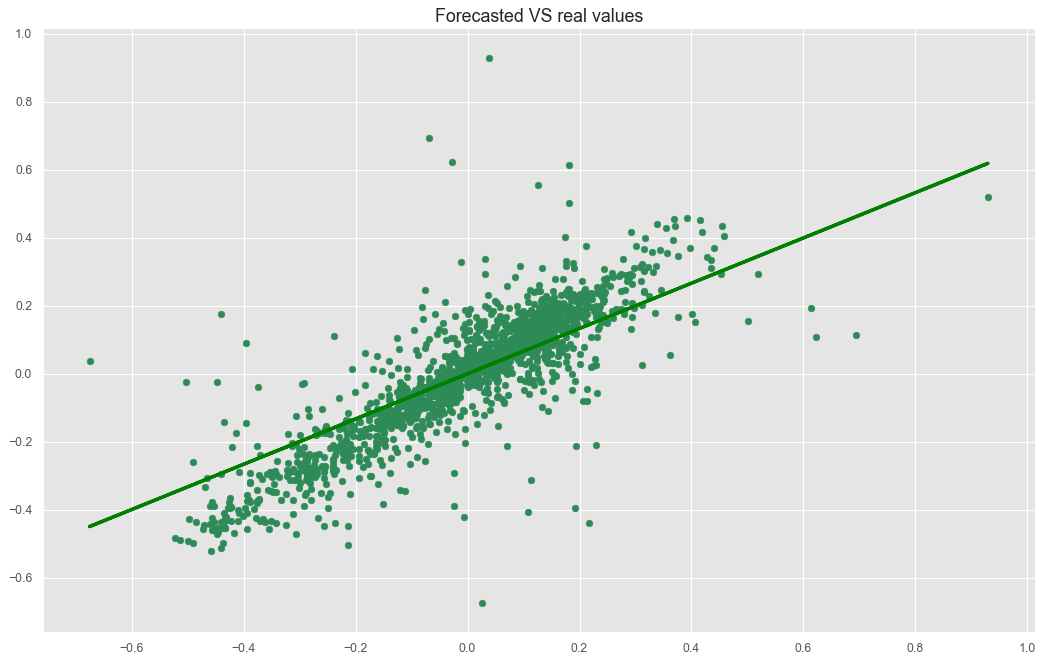

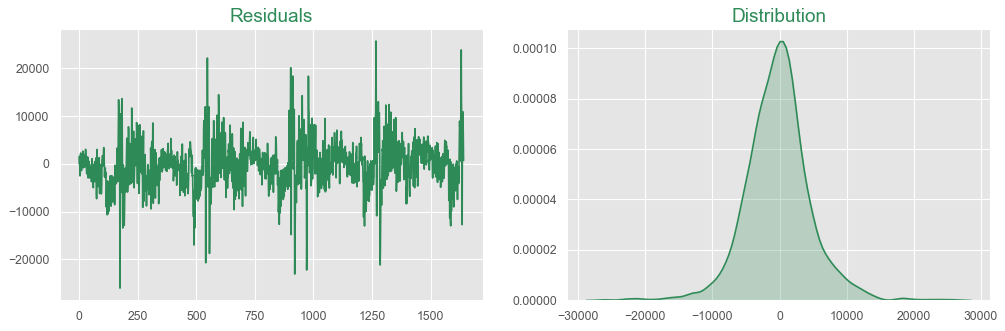

In [324]:
# 1.2.1.1.2 Using the last lag to plot the results

print('Results with the best score previously reached with a lag of {} days'.format(best_tss_score_gr))

nbsplit = 7
iata_code = 'GVA'

from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=nbsplit)     # info and source code at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html
    
# selecting the datasets
X = data_ofac_cleaned['x'+iata_code+str(best_tss_score_gr)].loc[datetime.date(year=1984, month=1, day=1+best_tss_score_gr):]
y = data_ofac_cleaned['y_GVA'].loc[datetime.date(year=1984, month=1, day=1+best_tss_score_gr):]

for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)

    # preparing the data
    # original train/test split
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index] 
        
    # log differencing the split
    X_train_diff = transdiff(source = X_train,n=1)
    X_test_diff = transdiff(source = X_test,n=1)
    y_train_diff = transdiff(source = y_train,n=1)
    y_test_diff = transdiff(source = y_test,n=1)

    # model
    # linear regression
    lr = LinearRegression()
    lr.fit(X_train_diff.reshape(-1, 1), y_train_diff)

    # predicting
    y_pred = lr.predict(X_test_diff.reshape(-1, 1))
        
    # the data needs to be retransformed to their original values
    # retransforming the data
    y_pred_retrans = revtransdiff(y_pred, y_test)


# coefficients
print('Coefficients:', lr.coef_)
print('Intercept:   ', lr.intercept_)

costfunctions(y_test, y_pred_retrans)

lr112bestfinal = pd.DataFrame()
lr112bestfinal['x_test_real'] = X_test
lr112bestfinal['y_test_real'] = y_test
lr112bestfinal['y_test_pred'] = y_pred_retrans

resulplot(y_pred_retrans, y_test, iata='GVA', dfindex=y_test)
scatterres(X_test_diff, y_test_diff, y_pred)
residuals = residualsplotw(y_test, y_pred_retrans)

#### 1.2.1.1.3 Linear Regression using Huber Regressor

In [325]:
# 1.2.1.1.3 LR Huber regressor - searching the best value over 30 days and the best epsilon

gs_huber_l = []

for i in np.arange(1,31,1):
    # creating the datasets
    x_real, y_real, x_train_logdiff, y_train_logdiff, x_test_logdiff, y_test_logdiff, x_train_real, y_train_real, x_test_real, y_test_real = createsets(data_ofac_cleaned, 'GVA', i)

    # scaling the sets
    scaler = StandardScaler()
    scaler.fit(x_train_logdiff.reshape(-1, 1))

    x_train_logdiff_scaled = scaler.transform(x_train_logdiff.reshape(-1, 1))
    y_train_logdiff_scaled = scaler.transform(y_train_logdiff.reshape(-1, 1))
    
    x_test_logdiff_scaled = scaler.transform(x_test_logdiff.reshape(-1, 1))
    y_test_logdiff_scaled = scaler.transform(y_test_logdiff.reshape(-1, 1)) 


    from sklearn.linear_model import HuberRegressor

    for eps in np.arange(1,2.2,0.01):
        # Create the estimator
        huber = HuberRegressor(epsilon=eps)
    
        # Fit it to X,y
        huber.fit(x_train_logdiff_scaled.reshape(-1, 1), y_train_logdiff.reshape(-1))
    
        # predicting
        y_pred_huber_trans = huber.predict(x_test_logdiff_scaled.reshape(-1, 1))

        # retransforming the data
        # First let's remove the scaling
        y_pred_huber = scaler.inverse_transform(y_pred_huber_trans)
        # Then retransform from logg diff
        y_pred_huber_retrans = revtransdiff(y_pred_huber, y_test_real)

        gs_huber_l.append({
            'day lag':i,
            'epsilon':eps,
            'Coefficients': huber.coef_,
            'Intercept:': huber.intercept_,
            'MAE': mean_absolute_error(y_test_real, y_pred_huber_retrans),
            'MSE': mean_squared_error(y_test_real, y_pred_huber_retrans),
            'MSLE': mean_squared_log_error(y_test_real, y_pred_huber_retrans),
            'RMSE': RMSE(y_test_real, y_pred_huber_retrans),
            'RMSLE': RMSLE(y_test_real, y_pred_huber_retrans),        
            'R2': r2_score(y_test_real, y_pred_huber_retrans)        
        })

gs_huber_l = pd.DataFrame(gs_huber_l)

huber_eps_bestvalue_l = gs_huber_l['epsilon'][gs_huber_l['MSLE'] == gs_huber_l['MSLE'].min()].values[0]
huber_lag_bestvalue_l = gs_huber_l['day lag'][gs_huber_l['MSLE'] == gs_huber_l['MSLE'].min()].values[0]
print('Huber Regressor : epsilon value which minimize MSLE is {:.2f} for day lag of {}.'.format(huber_eps_bestvalue_l, huber_lag_bestvalue_l))

Huber Regressor : epsilon value which minimize MSLE is 2.20 for day lag of 7.


In [326]:
# 1.2.1.1.3 generating the datasets and scaling it
x_real, y_real, x_train_logdiff, y_train_logdiff, x_test_logdiff, y_test_logdiff, x_train_real, y_train_real, x_test_real, y_test_real = createsetshuber(data_ofac_cleaned, 'GVA', nbshift=huber_lag_bestvalue_l)

# scaling the sets
scaler = StandardScaler()
scaler.fit(x_train_logdiff.reshape(-1, 1))
    
x_train_logdiff_scaled = scaler.transform(x_train_logdiff.reshape(-1, 1))
y_train_logdiff_scaled = scaler.transform(y_train_logdiff.reshape(-1, 1))
    
x_test_logdiff_scaled = scaler.transform(x_test_logdiff.reshape(-1, 1))
y_test_logdiff_scaled = scaler.transform(y_test_logdiff.reshape(-1, 1)) 

9209


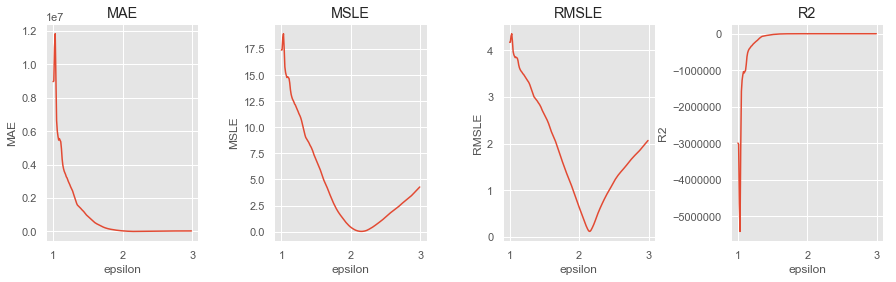

Huber Regressor : epsilon value which minimize MSLE is 2.15


In [327]:
# 1.2.1.1.3 LR Huber regressor - using the best lag day, refining the epsilon once again

from sklearn.linear_model import HuberRegressor
gs_huber = []

for eps in np.arange(1,3,0.01):
    # Create the estimator
    huber = HuberRegressor(epsilon=eps)
    
    # Fit it to X,y
    huber.fit(x_train_logdiff_scaled.reshape(-1, 1), y_train_logdiff_scaled.reshape(-1))   #
    
    # predicting
    y_pred_huber_trans = huber.predict(x_test_logdiff_scaled.reshape(-1, 1))

    # retransforming the data
    # First let's remove the scaling
    y_pred_huber = scaler.inverse_transform(y_pred_huber_trans)
    # Then retransform from logg diff
    y_pred_huber_retrans = revtransdiff(y_pred_huber, y_test_real)
    
    gs_huber.append({
        'epsilon':eps,
        'Coefficients': huber.coef_,
        'Intercept:': huber.intercept_,
        'MAE': mean_absolute_error(y_test_real, y_pred_huber_retrans),
        'MSE': mean_squared_error(y_test_real, y_pred_huber_retrans),
        'MSLE': mean_squared_log_error(y_test_real, y_pred_huber_retrans),
        'RMSE': RMSE(y_test_real, y_pred_huber_retrans),
        'RMSLE': RMSLE(y_test_real, y_pred_huber_retrans),        
        'R2': r2_score(y_test_real, y_pred_huber_retrans)
    })
gs_huber = pd.DataFrame(gs_huber)

# plotting the cost functions
plt.style.use('ggplot')

plt.figure(figsize=(15,4))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1,4,1)
plt.title('MAE')
plt.plot(gs_huber['epsilon'], gs_huber['MAE'])
plt.xlabel('epsilon')
plt.ylabel('MAE')

plt.subplot(1,4,2)
plt.title('MSLE')
plt.plot(gs_huber['epsilon'], gs_huber['MSLE'])
plt.xlabel('epsilon')
plt.ylabel('MSLE')

plt.subplot(1,4,3)
plt.title('RMSLE')
plt.plot(gs_huber['epsilon'], gs_huber['RMSLE'])
plt.xlabel('epsilon')
plt.ylabel('RMSLE')

plt.subplot(1,4,4)
plt.title('R2')
plt.plot(gs_huber['epsilon'], gs_huber['R2'])
plt.xlabel('epsilon')
plt.ylabel('R2')

plt.show()

# finding the value which maximimizes MSLE and saving it into a variable to be reused later
huber_eps_bestvalue = gs_huber[gs_huber['MSLE'] == gs_huber['MSLE'].min()].epsilon.values[0]
print('Huber Regressor : epsilon value which minimize MSLE is {:.2f}'.format(huber_eps_bestvalue))

Coefficients: [0.77108825]
Intercept: 2.674304495383916e-05
Results
MAE   : 2951.0
MSE   : 18713150.7
MSLE  : 0.014
RMSE  : 4325.9
RMSLE : 0.120
R2    : 0.818
Results
MAE   : 2951.0
MSE   : 18713150.7
MSLE  : 0.014
RMSE  : 4325.9
RMSLE : 0.120
R2    : 0.818


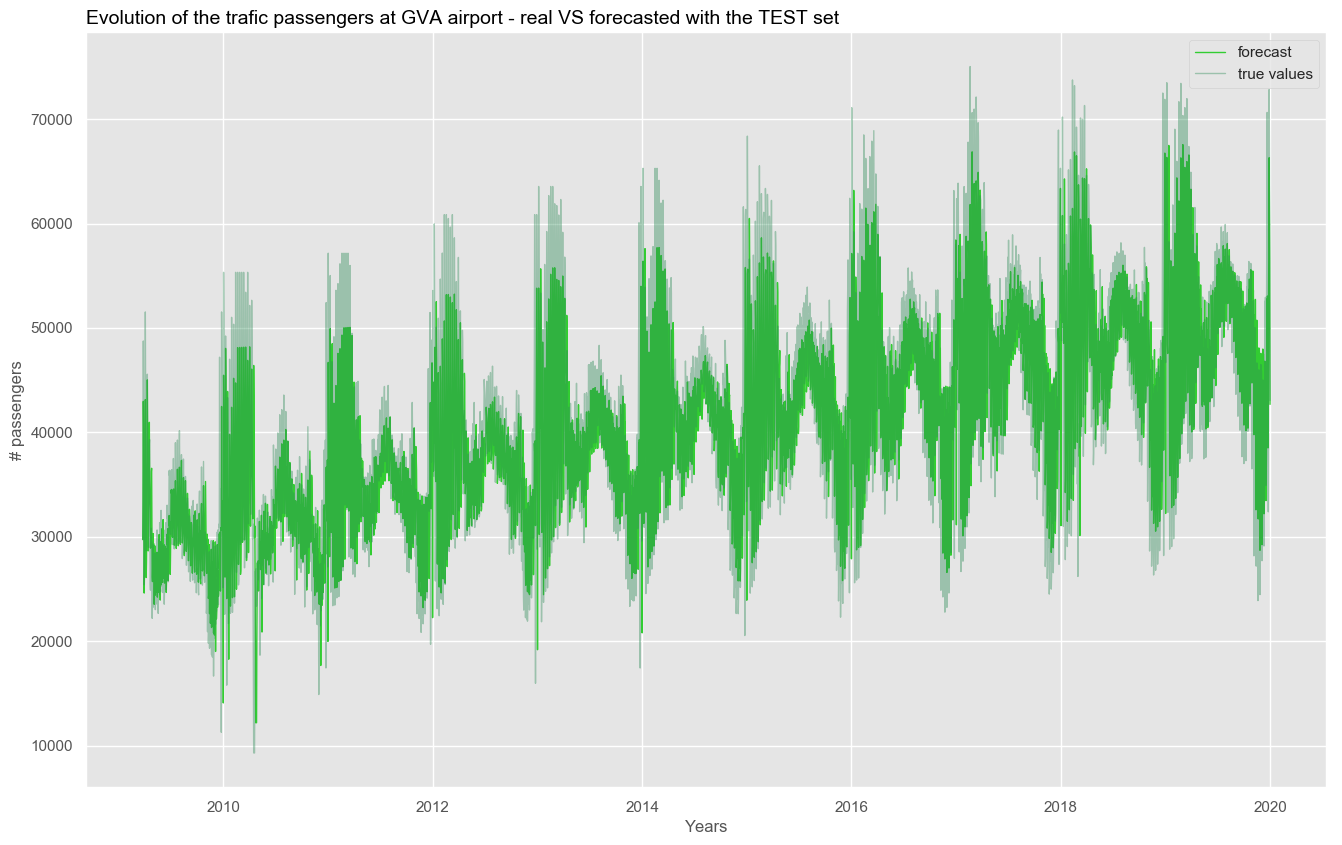

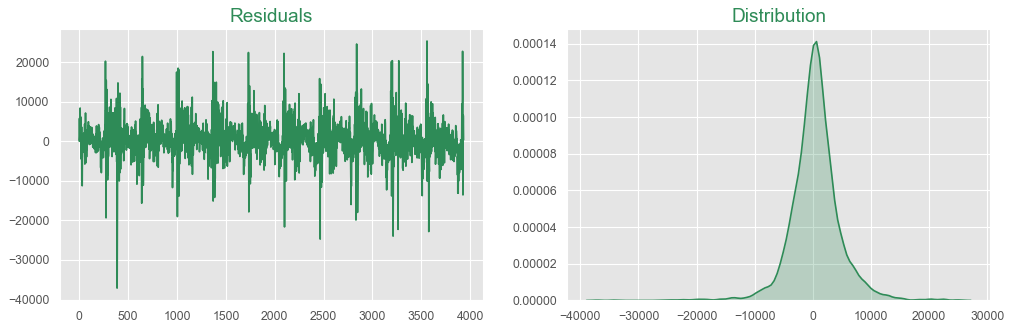

In [328]:
# 1.2.1.1.3 Using the best set
from sklearn.linear_model import HuberRegressor

# Create the estimator
huber = HuberRegressor(epsilon=huber_eps_bestvalue)

# Fit it to X,y
huber.fit(x_train_logdiff_scaled, y_train_logdiff_scaled.reshape(-1))  

print('Coefficients:', huber.coef_)
print('Intercept:', huber.intercept_)

# predicting
y_pred_huber_trans = huber.predict(x_test_logdiff_scaled)

# retransforming the data
# First let's remove the scaling
y_pred_huber = scaler.inverse_transform(y_pred_huber_trans)
# Then retransform from logg diff
y_pred_huber_retrans = revtransdiff(y_pred_huber, y_test_real)

costfunctions(y_test_real, y_pred_huber_retrans)

lrhuber12113 = pd.DataFrame(costfunctions(y_test_real, y_pred_huber_retrans))

resulplot(y_pred_huber_retrans, y_test_real, iata='GVA', dfindex=y_test_real)
residuals = residualsplotw(y_test_real, y_pred_huber_retrans)

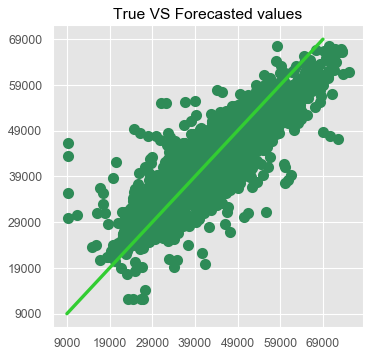

In [339]:
# Plotting
plt.style.use('ggplot')
plt.figure(figsize=(5,5), dpi=80)

# scatter plot
plt.scatter(y_test_real, y_pred_huber_retrans, color='seagreen', linewidth=4, alpha=1)

# Add title & legend
plt.title('True VS Forecasted values', fontsize=14, fontweight=0, color='black')
plt.xticks(np.arange(9000, 70000, 10000))
plt.yticks(np.arange(9000, 70000, 10000))

# creating a straight line
xline = np.arange(9000, 70000, 10000)
yline = np.arange(9000, 70000, 10000)
plt.plot(xline, yline, '-r', c='limegreen', linewidth=3)

plt.show()

# 1.3. Multiple Linear Regression

### 1.3.1. Time lags only

#### 1.3.1.1.1. Consecutive days using Time Series Split

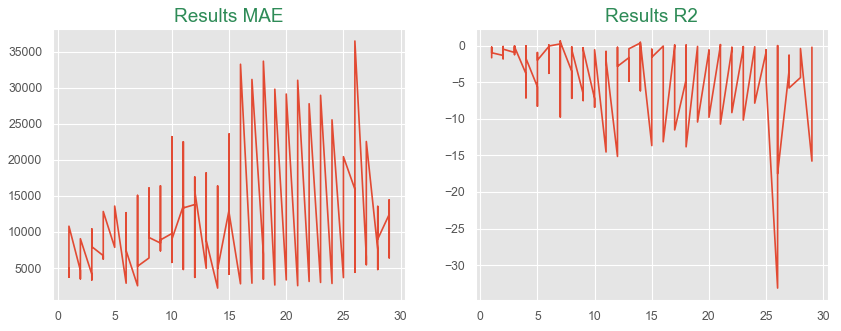

The MAE has the lowest value at lag 14 with a value of 2218.12.
The R2 has the maximum value at lag 7 with a value of 0.65.


In [340]:
# 1.3.1.1.1 LR consecutive days with TSS
#=======================================
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
    
maxiterations = 32
nbsplit = 5
lrwindow = []

# shifting the values in the dataframe
shiftingvalues(data_ofac_cleaned, 'GVA', maxiterations)

for nbi in np.arange(1,30,1):

    tscv = TimeSeriesSplit(n_splits=nbsplit)     # info and source code at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html
    
    # selecting the datasets
    X = data_ofac_cleaned['x'+iata_code+str(nbi)].loc[datetime.date(year=1984, month=1, day=1+nbi):]
    y = data_ofac_cleaned['y_GVA'].loc[datetime.date(year=1984, month=1, day=1+nbi):]

    for train_index, test_index in tscv.split(X):
#        print("TRAIN:", train_index, "TEST:", test_index)

        # preparing the data
        # original train/test split
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]     
    
        # log differencing the split
        X_train_diff = transdiff(source = X_train,n=1)
        X_test_diff = transdiff(source = X_test,n=1)
        y_train_diff = transdiff(source = y_train,n=1)
        y_test_diff = transdiff(source = y_test,n=1)
        
        # model
        lr = LinearRegression()
        lr.fit(X_train_diff.reshape(-1, 1), y_train_diff)

        # predicting
        y_tr_pred = lr.predict(X_train_diff.reshape(-1, 1))
        y_te_pred = lr.predict(X_test_diff.reshape(-1, 1))

        y_tr_pred_r = revtransdiff(y_tr_pred, y_train)
        y_te_pred_r = revtransdiff(y_te_pred, y_test)
        
        lrwindow.append({
            '# of days':nbi,
            'Intercept:': lr.intercept_,
            'Coefficients': lr.coef_,
            'MAE': mean_absolute_error(y_train, y_tr_pred_r),
            'MAE': mean_absolute_error(y_test, y_te_pred_r),
            'MSE': mean_squared_error(y_test, y_te_pred_r),
            'MSLE': mean_squared_log_error(y_test, y_te_pred_r),
            'RMSE': RMSE(y_test, y_te_pred_r),
            'RMSLE': RMSLE(y_test, y_te_pred_r),        
            'R2': r2_score(y_test, y_te_pred_r)
        })

lrwindowsearch = pd.DataFrame(lrwindow)

fig = plt.figure(figsize=(12.5, 4.5), dpi=80)

sub1 = fig.add_subplot(121) # instead of plt.subplot(2, 2, 1)
sub1.set_title('Results {}'.format('MAE'), fontsize=17, color="seagreen")
plt.plot(lrwindowsearch['# of days'], lrwindowsearch['MAE'])

sub2 = fig.add_subplot(122)
sub2.set_title('Results {}'.format('R2'), fontsize=17, color="seagreen")
plt.plot(lrwindowsearch['# of days'], lrwindowsearch['R2'])
plt.show()

lrwindowsearchmaxr2lag = lrwindowsearch['# of days'][lrwindowsearch['R2'] == lrwindowsearch['R2'].max()].values[0]
lrwindowsearchmaxr2 = lrwindowsearch['R2'][lrwindowsearch['R2'] == lrwindowsearch['R2'].max()].values[0]

lrwindowsearchlowmaelag = lrwindowsearch['# of days'][lrwindowsearch['MAE'] == lrwindowsearch['MAE'].min()].values[0]
lrwindowsearchlowmae = lrwindowsearch['MAE'][lrwindowsearch['MAE'] == lrwindowsearch['MAE'].min()].values[0]

print('The MAE has the lowest value at lag {} with a value of {:.2f}.'.format(lrwindowsearchlowmaelag, lrwindowsearchlowmae))
print('The R2 has the maximum value at lag {} with a value of {:.2f}.'.format(lrwindowsearchmaxr2lag, lrwindowsearchmaxr2))

Results with the best score previously reached with a lag of 7 days
TRAIN: [   0    1    2 ... 2189 2190 2191] TEST: [2192 2193 2194 ... 4379 4380 4381]
TRAIN: [   0    1    2 ... 4379 4380 4381] TEST: [4382 4383 4384 ... 6569 6570 6571]
TRAIN: [   0    1    2 ... 6569 6570 6571] TEST: [6572 6573 6574 ... 8759 8760 8761]
TRAIN: [   0    1    2 ... 8759 8760 8761] TEST: [ 8762  8763  8764 ... 10949 10950 10951]
TRAIN: [    0     1     2 ... 10949 10950 10951] TEST: [10952 10953 10954 ... 13139 13140 13141]
Coefficients: [0.6605902]
Intercept:    2.852722299022533e-05
Results
MAE   : 5244.9
MSE   : 40126589.0
MSLE  : 0.023
RMSE  : 6334.6
RMSLE : 0.152
R2    : 0.538


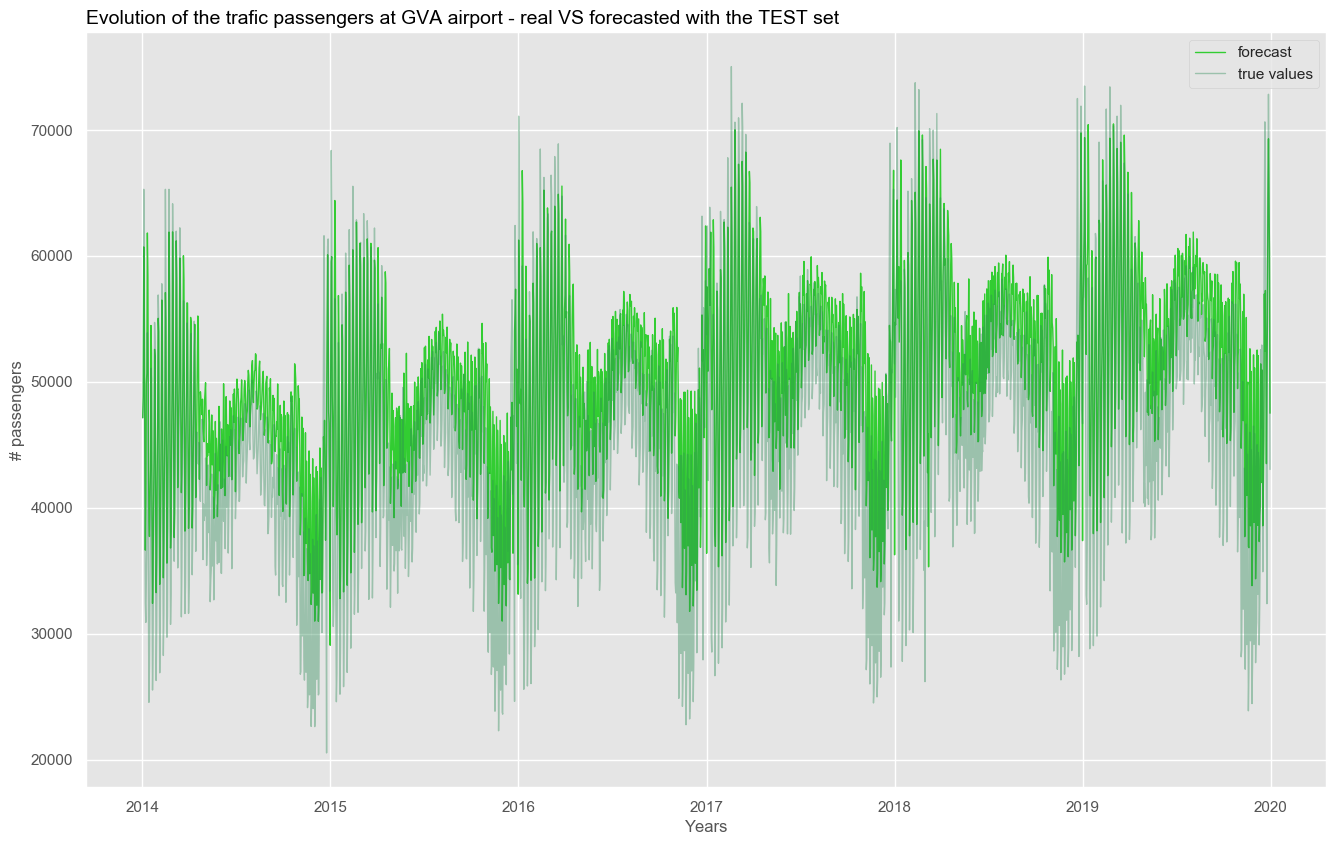

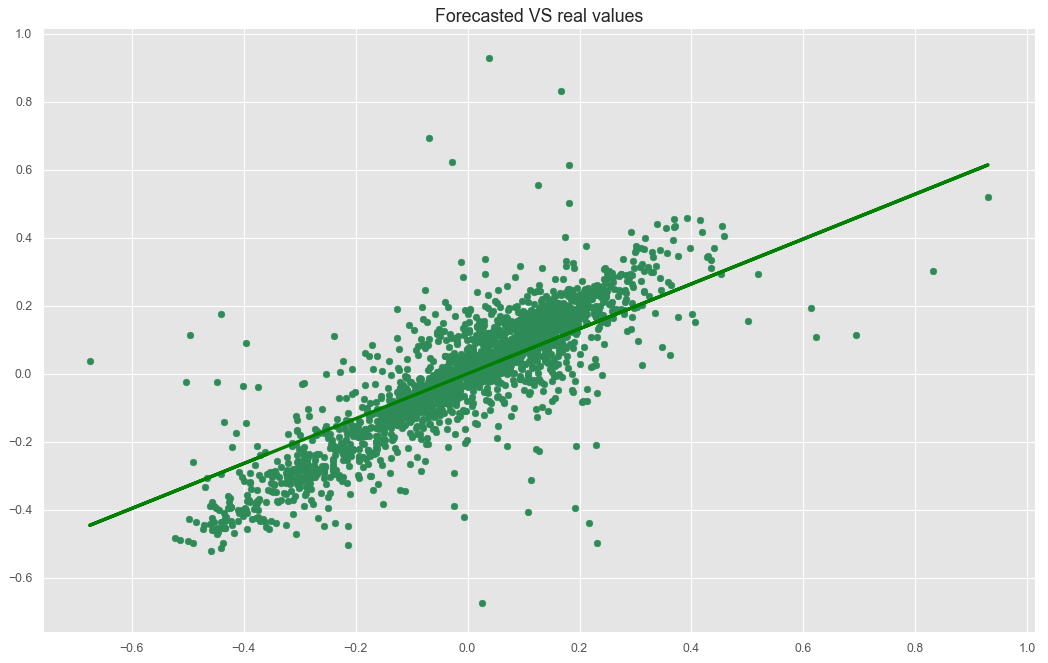

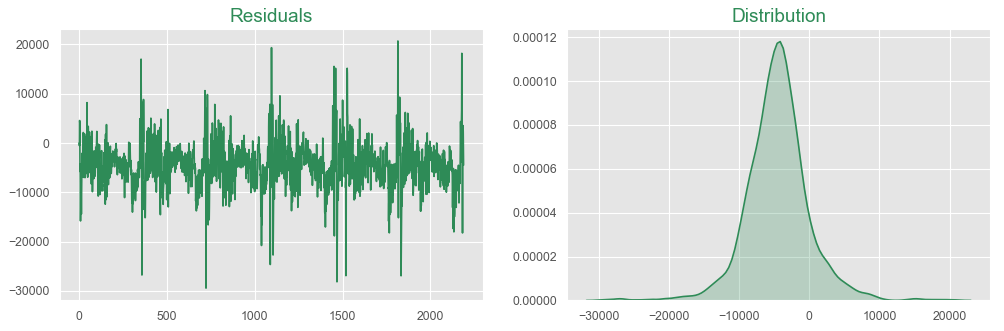

In [341]:
# 1.3.1.1.1 Using the last lag to plot the results - R2

print('Results with the best score previously reached with a lag of {} days'.format(lrwindowsearchmaxr2lag))

nbsplit = 5
iata_code = 'GVA'

from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=nbsplit)     # info and source code at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html
    
# selecting the datasets
X = data_ofac_cleaned['x'+iata_code+str(lrwindowsearchmaxr2lag)].loc[datetime.date(year=1984, month=1, day=1+lrwindowsearchmaxr2lag):]
y = data_ofac_cleaned['y_GVA'].loc[datetime.date(year=1984, month=1, day=1+lrwindowsearchmaxr2lag):]

for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)

    # preparing the data
    # original train/test split
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index] 
        
    # log differencing the split
    X_train_diff = transdiff(source = X_train,n=1)
    X_test_diff = transdiff(source = X_test,n=1)
    y_train_diff = transdiff(source = y_train,n=1)
    y_test_diff = transdiff(source = y_test,n=1)

    # model
    # linear regression
    lr = LinearRegression()
    lr.fit(X_train_diff.reshape(-1, 1), y_train_diff)

    # predicting
    y_pred = lr.predict(X_test_diff.reshape(-1, 1))
        
    # the data needs to be retransformed to their original values
    # retransforming the data
    y_pred_retrans = revtransdiff(y_pred, y_test)


# coefficients
print('Coefficients:', lr.coef_)
print('Intercept:   ', lr.intercept_)

costfunctions(y_test, y_pred_retrans)

lr13111bestfinal = pd.DataFrame()
lr13111bestfinal['x_test_real'] = X_test
lr13111bestfinal['y_test_real'] = y_test
lr13111bestfinal['y_test_pred'] = y_pred_retrans

resulplot(y_pred_retrans, y_test, iata='GVA', dfindex=y_test)
scatterres(X_test_diff, y_test_diff, y_pred)
residuals = residualsplotw(y_test, y_pred_retrans)

Results with the best score previously reached with a lag of 14 days
TRAIN: [   0    1    2 ... 2187 2188 2189] TEST: [2190 2191 2192 ... 4376 4377 4378]
TRAIN: [   0    1    2 ... 4376 4377 4378] TEST: [4379 4380 4381 ... 6565 6566 6567]
TRAIN: [   0    1    2 ... 6565 6566 6567] TEST: [6568 6569 6570 ... 8754 8755 8756]
TRAIN: [   0    1    2 ... 8754 8755 8756] TEST: [ 8757  8758  8759 ... 10943 10944 10945]
TRAIN: [    0     1     2 ... 10943 10944 10945] TEST: [10946 10947 10948 ... 13132 13133 13134]
Coefficients: [0.59917536]
Intercept:    4.0214803218029284e-05
Results
MAE   : 4897.5
MSE   : 42937280.9
MSLE  : 0.025
RMSE  : 6552.7
RMSLE : 0.157
R2    : 0.506
Results
MAE   : 4897.5
MSE   : 42937280.9
MSLE  : 0.025
RMSE  : 6552.7
RMSLE : 0.157
R2    : 0.506


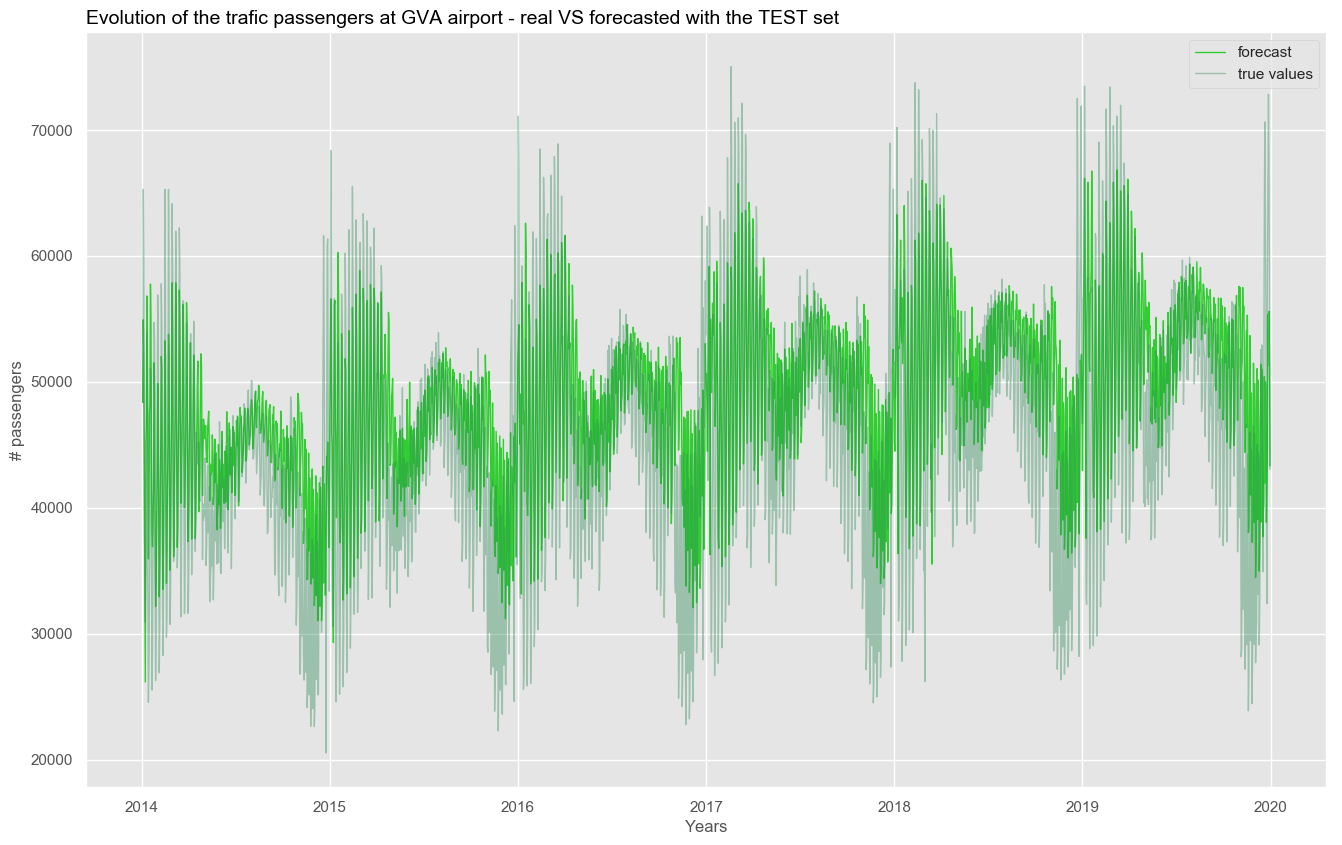

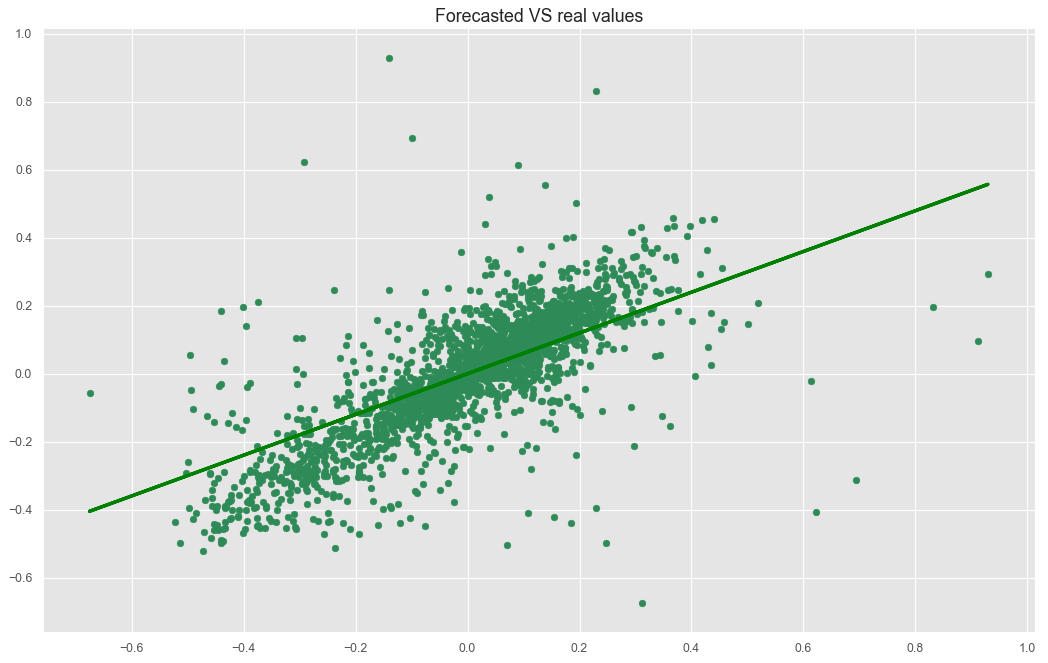

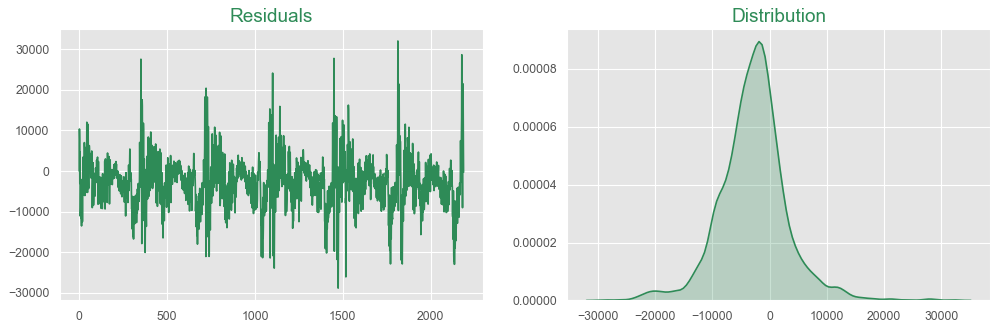

In [342]:
# 1.3.1.1.1 Using the last lag to plot the results - MAE

print('Results with the best score previously reached with a lag of {} days'.format(lrwindowsearchlowmaelag))

nbsplit = 5
iata_code = 'GVA'

from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=nbsplit)     # info and source code at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html
    
# selecting the datasets
X = data_ofac_cleaned['x'+iata_code+str(lrwindowsearchlowmaelag)].loc[datetime.date(year=1984, month=1, day=1+lrwindowsearchlowmaelag):]
y = data_ofac_cleaned['y_GVA'].loc[datetime.date(year=1984, month=1, day=1+lrwindowsearchlowmaelag):]

for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)

    # preparing the data
    # original train/test split
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index] 
        
    # log differencing the split
    X_train_diff = transdiff(source = X_train,n=1)
    X_test_diff = transdiff(source = X_test,n=1)
    y_train_diff = transdiff(source = y_train,n=1)
    y_test_diff = transdiff(source = y_test,n=1)

    # model
    # linear regression
    lr = LinearRegression()
    lr.fit(X_train_diff.reshape(-1, 1), y_train_diff)

    # predicting
    y_pred = lr.predict(X_test_diff.reshape(-1, 1))
        
    # the data needs to be retransformed to their original values
    # retransforming the data
    y_pred_retrans = revtransdiff(y_pred, y_test)


# coefficients
print('Coefficients:', lr.coef_)
print('Intercept:   ', lr.intercept_)

res13111 = pd.DataFrame(costfunctions(y_test, y_pred_retrans))
costfunctions(y_test, y_pred_retrans)

lr13111maebestfinal = pd.DataFrame()
lr13111maebestfinal['x_test_real'] = X_test
lr13111maebestfinal['y_test_real'] = y_test
lr13111maebestfinal['y_test_pred'] = y_pred_retrans

resulplot(y_pred_retrans, y_test, iata='GVA', dfindex=y_test)
scatterres(X_test_diff, y_test_diff, y_pred)
residuals = residualsplotw(y_test, y_pred_retrans)

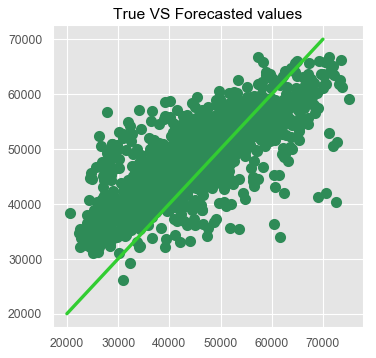

In [349]:
# Plotting
plt.style.use('ggplot')
plt.figure(figsize=(5,5), dpi=80)

# scatter plot
plt.scatter(y_test, y_pred_retrans, color='seagreen', linewidth=4, alpha=1)

val = np.arange(20000, 80000, 10000)

# Add title & legend
plt.title('True VS Forecasted values', fontsize=14, fontweight=0, color='black')
plt.xticks(val)
plt.yticks(val)

# creating a straight line
xline = val
yline = val
plt.plot(xline, yline, '-r', c='limegreen', linewidth=3)

plt.show()

#### 1.3.1.1.2. Multiple of 7 days using Time Series Split

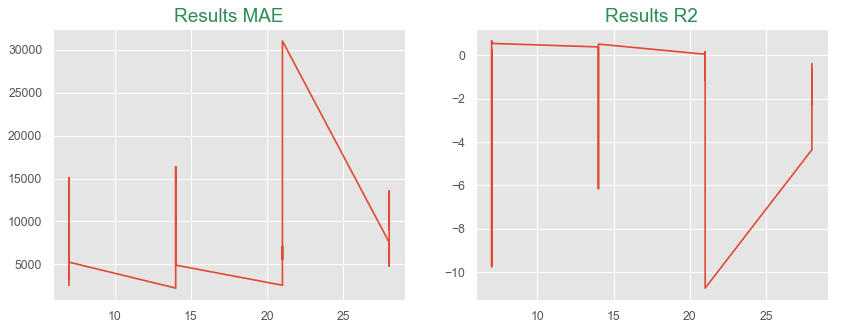

The MAE has the lowest value at lag 14 with a value of 2218.12.
The R2 has the maximum value at lag 7 with a value of 0.65.


In [350]:
# 1.3.1.1.2. LR multiple of 7 days with TSS
#==========================================
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
    
maxiterations = 32
nbsplit = 5
lrwindow = []

# shifting the values in the dataframe
shiftingvalues(data_ofac_cleaned, 'GVA', maxiterations)


for nbi in np.array([7, 14, 21, 28]):
    # shifting the values in the dataframe
    shiftingvalues(data_ofac_cleaned, 'GVA', maxiterations)

    tscv = TimeSeriesSplit(n_splits=nbsplit)     # info and source code at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html
    
    # selecting the datasets
    X = data_ofac_cleaned['x'+iata_code+str(nbi)].loc[datetime.date(year=1984, month=1, day=1+nbi):]
    y = data_ofac_cleaned['y_GVA'].loc[datetime.date(year=1984, month=1, day=1+nbi):]

    for train_index, test_index in tscv.split(X):

        # preparing the data
        # original train/test split
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]     
    
        # log differencing the split
        X_train_diff = transdiff(source = X_train,n=1)
        X_test_diff = transdiff(source = X_test,n=1)
        y_train_diff = transdiff(source = y_train,n=1)
        y_test_diff = transdiff(source = y_test,n=1)
        
        # model
        lr = LinearRegression()
        lr.fit(X_train_diff.reshape(-1, 1), y_train_diff)

        # predicting
        y_tr_pred = lr.predict(X_train_diff.reshape(-1, 1))
        y_te_pred = lr.predict(X_test_diff.reshape(-1, 1))

        y_tr_pred_r = revtransdiff(y_tr_pred, y_train)
        y_te_pred_r = revtransdiff(y_te_pred, y_test)
        
        lrwindow.append({
            '# of days':nbi,
            'Intercept:': lr.intercept_,
            'Coefficients': lr.coef_,
            'MAE': mean_absolute_error(y_train, y_tr_pred_r),
            'MAE': mean_absolute_error(y_test, y_te_pred_r),
            'MSE': mean_squared_error(y_test, y_te_pred_r),
            'MSLE': mean_squared_log_error(y_test, y_te_pred_r),
            'RMSE': RMSE(y_test, y_te_pred_r),
            'RMSLE': RMSLE(y_test, y_te_pred_r),        
            'R2': r2_score(y_test, y_te_pred_r)
        })

lrwindowsearch7 = pd.DataFrame(lrwindow)

fig = plt.figure(figsize=(12.5, 4.5), dpi=80)

sub1 = fig.add_subplot(121) # instead of plt.subplot(2, 2, 1)
sub1.set_title('Results {}'.format('MAE'), fontsize=17, color="seagreen")
plt.plot(lrwindowsearch7['# of days'], lrwindowsearch7['MAE'])

sub2 = fig.add_subplot(122)
sub2.set_title('Results {}'.format('R2'), fontsize=17, color="seagreen")
plt.plot(lrwindowsearch7['# of days'], lrwindowsearch7['R2'])
plt.show()

lrwindowsearchmaxr2lag = lrwindowsearch7['# of days'][lrwindowsearch7['R2'] == lrwindowsearch7['R2'].max()].values[0]
lrwindowsearchmaxr2 = lrwindowsearch7['R2'][lrwindowsearch7['R2'] == lrwindowsearch7['R2'].max()].values[0]

lrwindowsearchlowmaelag = lrwindowsearch7['# of days'][lrwindowsearch7['MAE'] == lrwindowsearch7['MAE'].min()].values[0]
lrwindowsearchlowmae = lrwindowsearch7['MAE'][lrwindowsearch7['MAE'] == lrwindowsearch7['MAE'].min()].values[0]

print('The MAE has the lowest value at lag {} with a value of {:.2f}.'.format(lrwindowsearchlowmaelag, lrwindowsearchlowmae))
print('The R2 has the maximum value at lag {} with a value of {:.2f}.'.format(lrwindowsearchmaxr2lag, lrwindowsearchmaxr2))

Results with the best score previously reached with a lag of 14 days
TRAIN: [   0    1    2 ... 2187 2188 2189] TEST: [2190 2191 2192 ... 4376 4377 4378]
TRAIN: [   0    1    2 ... 4376 4377 4378] TEST: [4379 4380 4381 ... 6565 6566 6567]
TRAIN: [   0    1    2 ... 6565 6566 6567] TEST: [6568 6569 6570 ... 8754 8755 8756]
TRAIN: [   0    1    2 ... 8754 8755 8756] TEST: [ 8757  8758  8759 ... 10943 10944 10945]
TRAIN: [    0     1     2 ... 10943 10944 10945] TEST: [10946 10947 10948 ... 13132 13133 13134]
Coefficients: [0.59917536]
Intercept:    4.0214803218029284e-05
Results
MAE   : 4897.5
MSE   : 42937280.9
MSLE  : 0.025
RMSE  : 6552.7
RMSLE : 0.157
R2    : 0.506
Results
MAE   : 4897.5
MSE   : 42937280.9
MSLE  : 0.025
RMSE  : 6552.7
RMSLE : 0.157
R2    : 0.506


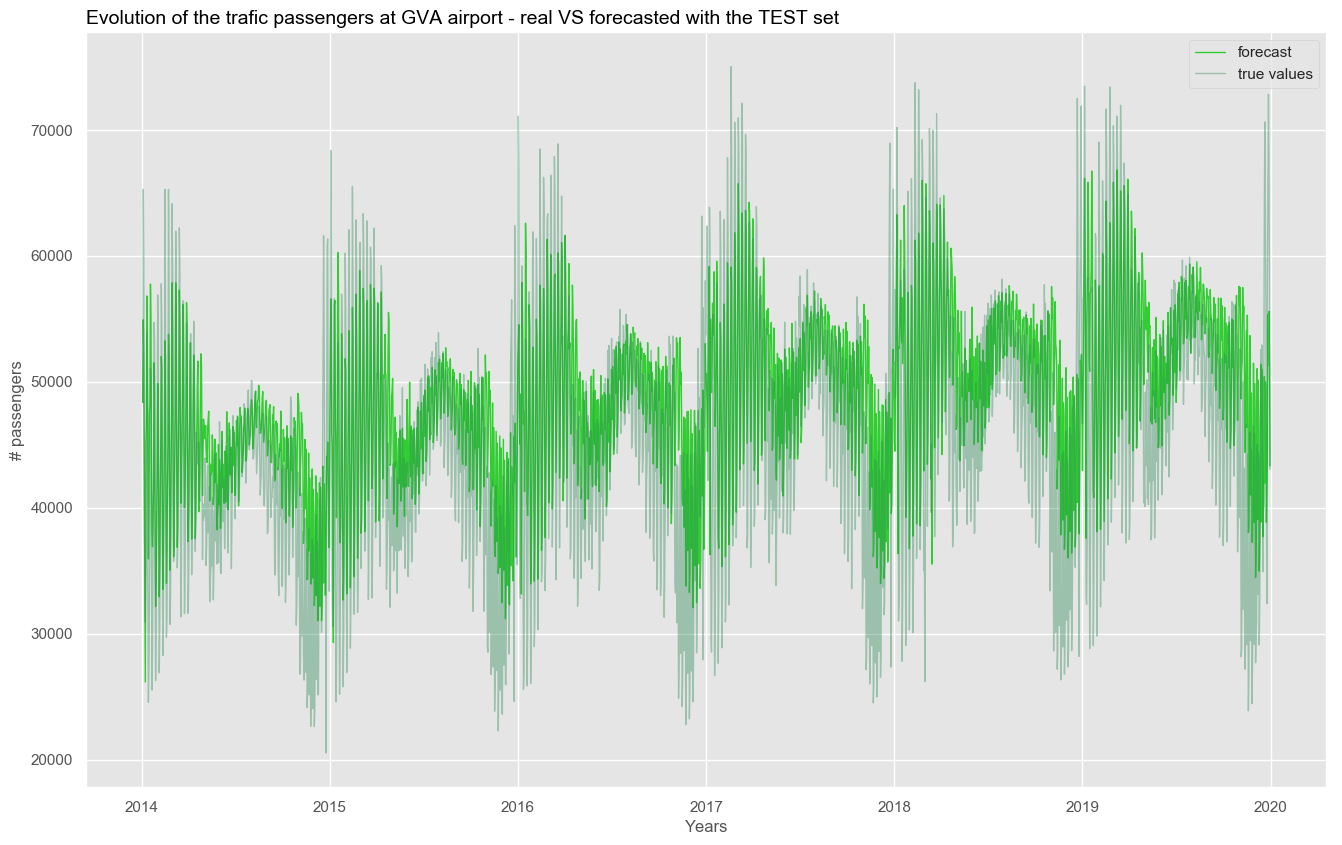

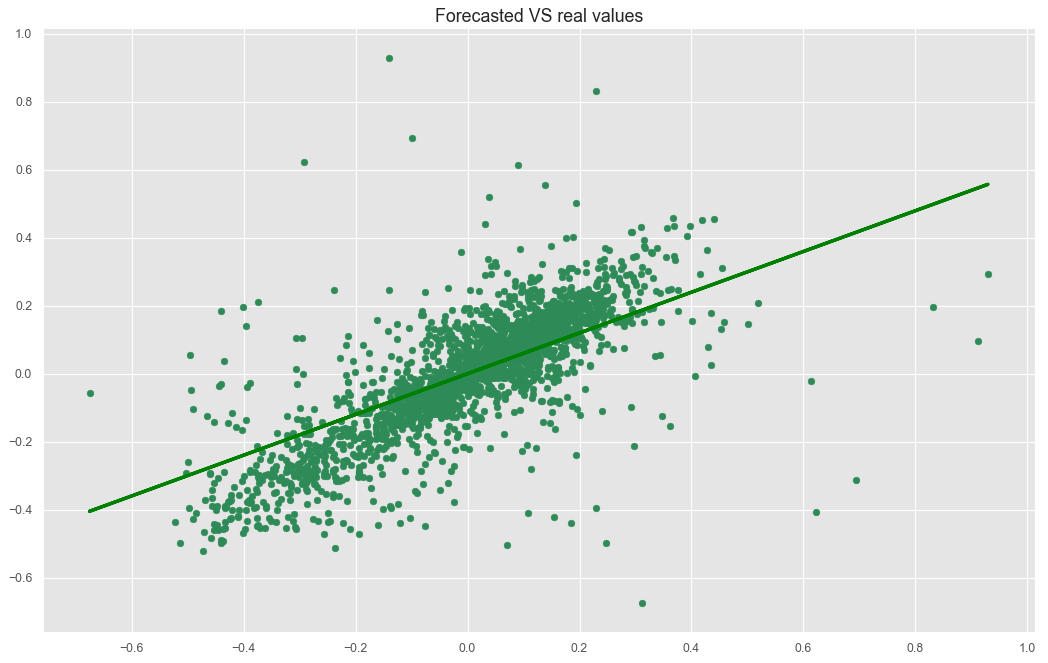

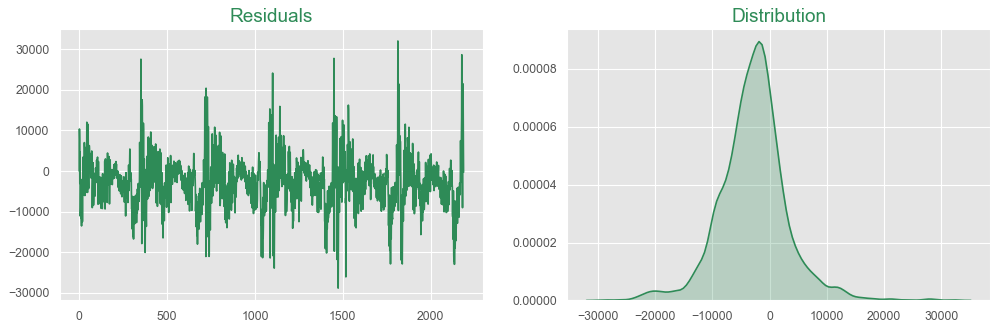

In [351]:
# 1.3.1.1.2 Using the last lag to plot the results - MAE

print('Results with the best score previously reached with a lag of {} days'.format(lrwindowsearchlowmaelag))

nbsplit = 5
iata_code = 'GVA'

from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=nbsplit)     # info and source code at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html
    
# selecting the datasets
X = data_ofac_cleaned['x'+iata_code+str(lrwindowsearchlowmaelag)].loc[datetime.date(year=1984, month=1, day=1+lrwindowsearchlowmaelag):]
y = data_ofac_cleaned['y_GVA'].loc[datetime.date(year=1984, month=1, day=1+lrwindowsearchlowmaelag):]

for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)

    # preparing the data
    # original train/test split
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index] 
        
    # log differencing the split
    X_train_diff = transdiff(source = X_train,n=1)
    X_test_diff = transdiff(source = X_test,n=1)
    y_train_diff = transdiff(source = y_train,n=1)
    y_test_diff = transdiff(source = y_test,n=1)

    # model
    # linear regression
    lr = LinearRegression()
    lr.fit(X_train_diff.reshape(-1, 1), y_train_diff)

    # predicting
    y_pred = lr.predict(X_test_diff.reshape(-1, 1))
        
    # the data needs to be retransformed to their original values
    # retransforming the data
    y_pred_retrans = revtransdiff(y_pred, y_test)


# coefficients
print('Coefficients:', lr.coef_)
print('Intercept:   ', lr.intercept_)

res13112 = pd.DataFrame(costfunctions(y_test, y_pred_retrans))
costfunctions(y_test, y_pred_retrans)

lr13112maebestfinal = pd.DataFrame()
lr13112maebestfinal['x_test_real'] = X_test
lr13112maebestfinal['y_test_real'] = y_test
lr13112maebestfinal['y_test_pred'] = y_pred_retrans

resulplot(y_pred_retrans, y_test, iata='GVA', dfindex=y_test)
scatterres(X_test_diff, y_test_diff, y_pred)
residuals = residualsplotw(y_test, y_pred_retrans)

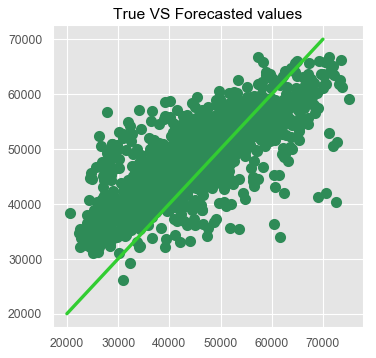

In [352]:
# Plotting
plt.style.use('ggplot')
plt.figure(figsize=(5,5), dpi=80)

# scatter plot
plt.scatter(y_test, y_pred_retrans, color='seagreen', linewidth=4, alpha=1)

val = np.arange(20000, 80000, 10000)

# Add title & legend
plt.title('True VS Forecasted values', fontsize=14, fontweight=0, color='black')
plt.xticks(val)
plt.yticks(val)

# creating a straight line
xline = val
yline = val
plt.plot(xline, yline, '-r', c='limegreen', linewidth=3)

plt.show()

#### 1.3.1.1.3. LR over the combination of multiples of 7

# multiples of 7 : 1
# loops to execute : [1]
# of days to shift : 7
                  1        7
date                        
1984-01-08  21307.0   8011.0
1984-01-09  15239.0  15318.0
1984-01-10  11652.0  11596.0
1984-01-11   9664.0  12820.0
1984-01-12  12534.0  11230.0
Line nb of train/test sets : 9209
# multiples of 7 : 1
# loops to execute : [1]
# of days to shift : 7
                  7
date               
1984-01-08   8011.0
1984-01-09  15318.0
1984-01-10  11596.0
1984-01-11  12820.0
1984-01-12  11230.0
Line nb of train/test sets : 9209
# multiples of 7 : 2
# loops to execute : [1 2]
# of days to shift : 14
                 1        7        14
date                                 
1984-01-15  20707.0  15239.0   8011.0
1984-01-16  11218.0  11652.0  15318.0
1984-01-17   8921.0   9664.0  11596.0
1984-01-18   8720.0  12534.0  12820.0
1984-01-19   8175.0   9863.0  11230.0
Line nb of train/test sets : 9204
# multiples of 7 : 2
# loops to execute : [1 2]
# of days to shift : 14
       

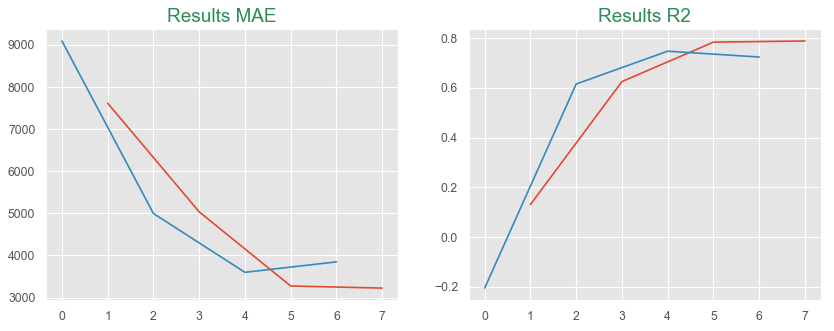

The lag 28 shows the lowest value for MAE at 3224.61 and R2 0.79.


In [353]:
# 1.3.1.1.3 LR over the combination of multiples of 7
#====================================================

from sklearn.linear_model import LinearRegression

maxiterations = 32
lrwindow = []

for nbi in np.array([8, 15, 22, 29]):
    for lg in np.array(['y', 'n']):
        # shifting the values in the dataframe
        shiftingvalues(data_ofac_cleaned, 'GVA', maxiterations)

        # preparing the datasets
        x_logdiff, y_logdiff, x_real, y_real, x_train_logdiff, y_train_logdiff, x_test_logdiff, y_test_logdiff, x_train_real, y_train_real, x_test_real, y_test_real = createsetsmultifeaturesMS(data_ofac_cleaned, 'GVA', nbi, lg1=lg)
        
        # model
        lr = LinearRegression()
        lr.fit(x_train_logdiff, y_train_logdiff)

        # predicting
        y_tr_pred = lr.predict(x_train_logdiff)
        y_te_pred = lr.predict(x_test_logdiff)

        y_tr_pred_r = revtransdiff(y_tr_pred, y_train_real)
        y_te_pred_r = revtransdiff(y_te_pred, y_test_real)
        
        
        lrwindow.append({
            '# of days':nbi-1,
            '1st lag':lg,
            'Intercept:': lr.intercept_,
            'Coefficients': lr.coef_,
            'MAE': mean_absolute_error(y_train_real, y_tr_pred_r),
            'MAE': mean_absolute_error(y_test_real, y_te_pred_r),
            'MSE': mean_squared_error(y_test_real, y_te_pred_r),
            'MSLE': mean_squared_log_error(y_test_real, y_te_pred_r),
            'RMSE': RMSE(y_test_real, y_te_pred_r),
            'RMSLE': RMSLE(y_test_real, y_te_pred_r),        
            'R2': r2_score(y_test_real, y_te_pred_r)
        })

lrwindowcomb7 = pd.DataFrame(lrwindow)

searchres(df=lrwindowcomb7, col='1st lag', cost1='MAE', cost2='R2')
lrwindowcomb7

lrwindowcomb7maemin = lrwindowcomb7['MAE'].min()
lrwindowcomb7r2max = lrwindowcomb7['R2'].max()
lrwindowcomb7lag = lrwindowcomb7['# of days'][lrwindowcomb7['MAE'] == lrwindowcomb7['MAE'].min()].values[0]
print('The lag {} shows the lowest value for MAE at {:.2f} and R2 {:.2f}.'.format(lrwindowcomb7lag, lrwindowcomb7maemin, lrwindowcomb7r2max))

Combining the multiple from the results above :

In [354]:
# Creating the datasets

x_logdiff, y_logdiff, x_real, y_real, x_train_logdiff, y_train_logdiff, x_test_logdiff, y_test_logdiff, x_train_real, y_train_real, x_test_real, y_test_real = createsetsmultifeaturesMS(data_ofac_cleaned, 'GVA', 29, lg1='n')

# multiples of 7 : 4
# loops to execute : [1 2 3 4]
# of days to shift : 28
                 7        14       21       28
date                                          
1984-01-29  11093.0  11218.0  15239.0   8011.0
1984-01-30   9233.0   8921.0  11652.0  15318.0
1984-01-31   8148.0   8720.0   9664.0  11596.0
1984-02-01   8403.0   8175.0  12534.0  12820.0
1984-02-02  10730.0   5038.0   9863.0  11230.0
Line nb of train/test sets : 9194


Coefficients: [0.43459825 0.22211849 0.09117682 0.04652196]
Intercept:    3.3268194895199555e-05
Results
MAE   : 1786.7
MSE   : 7100946.6
MSLE  : 0.023
RMSE  : 2664.8
RMSLE : 0.152
R2    : 0.856
Results
MAE   : 3224.6
MSE   : 21825332.7
MSLE  : 0.016
RMSE  : 4671.8
RMSLE : 0.126
R2    : 0.788
Results
MAE   : 3224.6
MSE   : 21825332.7
MSLE  : 0.016
RMSE  : 4671.8
RMSLE : 0.126
R2    : 0.788


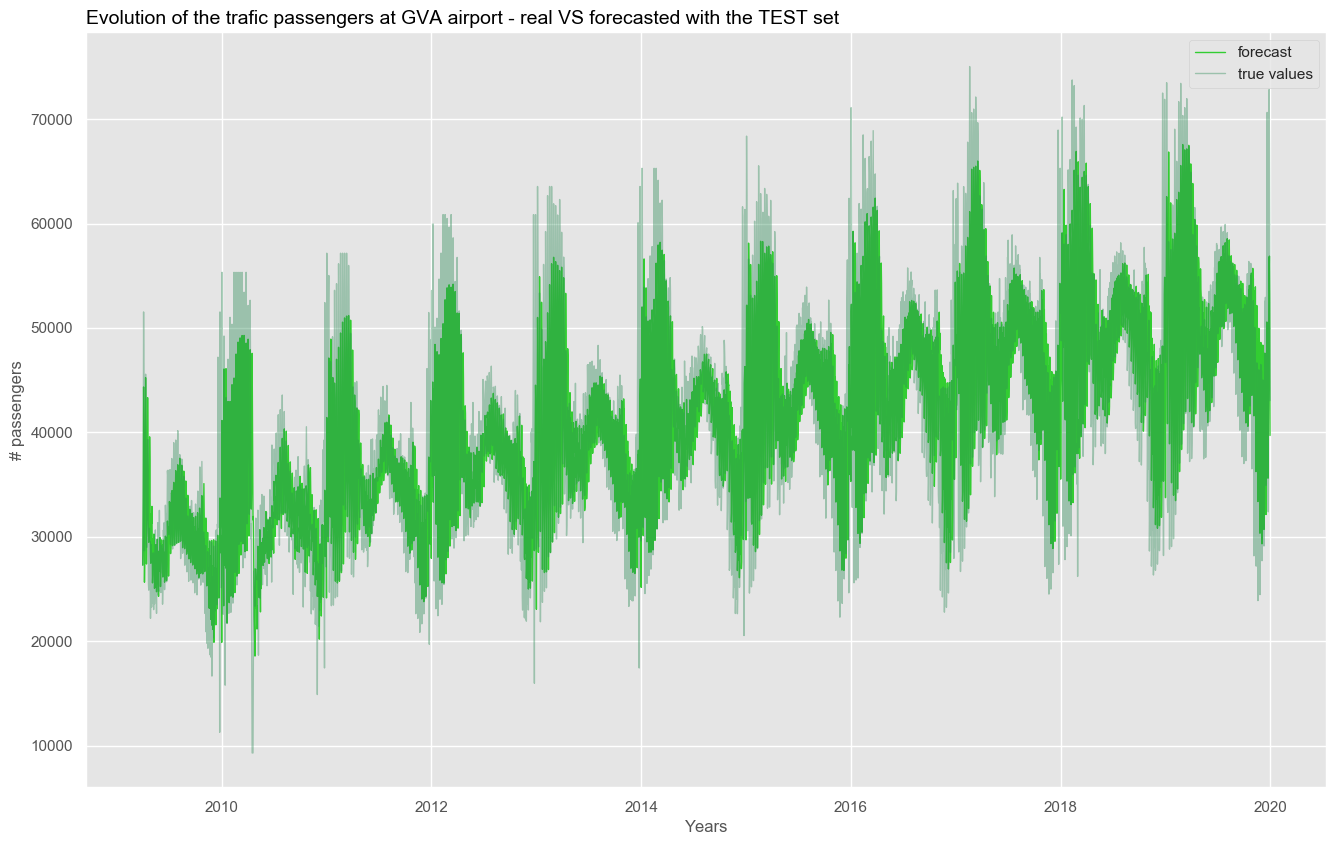

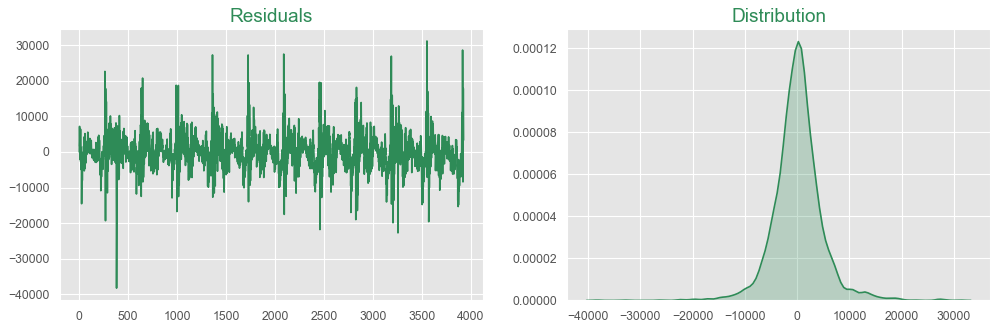

In [355]:
# 1.3.1.1.3. LR multiple of 7 days with TSS
#==========================================    
# WITH LOG DIFF VALUES RETRANSFORMED

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train_logdiff, y_train_logdiff)

# coefficients
print('Coefficients:', lr.coef_)
print('Intercept:   ', lr.intercept_)

# predicting
y_tr_pred = lr.predict(x_train_logdiff)
y_te_pred = lr.predict(x_test_logdiff)

y_tr_pred_r = revtransdiff(y_tr_pred, y_train_real)
y_te_pred_r = revtransdiff(y_te_pred, y_test_real)

costfunctions(y_train_real, y_tr_pred_r)

lr13113 = pd.DataFrame(costfunctions(y_test_real, y_te_pred_r))
costfunctions(y_test_real, y_te_pred_r)

res = pd.DataFrame()
#res['x_test_real'] = x_test_real
res['y_test_real'] = y_test_real
res['y_test_pred'] = y_te_pred_r


resulplot(y_te_pred_r, y_test_real, iata='GVA', dfindex=y_test_real)
residuals = residualsplotw(y_test_real, y_te_pred_r)

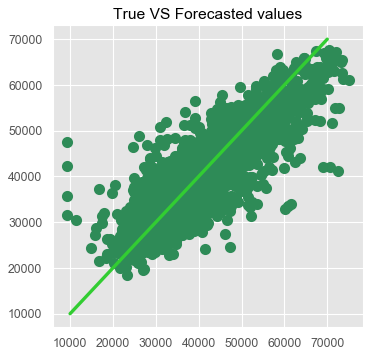

In [357]:
# Plotting
plt.style.use('ggplot')
plt.figure(figsize=(5,5), dpi=80)

# scatter plot
plt.scatter(y_test_real, y_te_pred_r, color='seagreen', linewidth=4, alpha=1)

val = np.arange(10000, 80000, 10000)

# Add title & legend
plt.title('True VS Forecasted values', fontsize=14, fontweight=0, color='black')
plt.xticks(val)
plt.yticks(val)

# creating a straight line
xline = val
yline = val
plt.plot(xline, yline, '-r', c='limegreen', linewidth=3)

plt.show()

#### 1.3.1.1.4. Huber Regressor - with the result from above (7,14,21,28 days lag)

In [358]:
# Creating the datasets

x_logdiff, y_logdiff, x_real, y_real, x_train_logdiff, y_train_logdiff, x_test_logdiff, y_test_logdiff, x_train_real, y_train_real, x_test_real, y_test_real = createsetsmultifeaturesMS(data_ofac_cleaned, 'GVA', 29, lg1='n')

# multiples of 7 : 4
# loops to execute : [1 2 3 4]
# of days to shift : 28
                 7        14       21       28
date                                          
1984-01-29  11093.0  11218.0  15239.0   8011.0
1984-01-30   9233.0   8921.0  11652.0  15318.0
1984-01-31   8148.0   8720.0   9664.0  11596.0
1984-02-01   8403.0   8175.0  12534.0  12820.0
1984-02-02  10730.0   5038.0   9863.0  11230.0
Line nb of train/test sets : 9194


In [359]:
# scaling the sets
scaler = StandardScaler()
scaler.fit(x_train_logdiff.reshape(-1, 1))
    
x_train_logdiff_scaled = scaler.transform(x_train_logdiff)
y_train_logdiff_scaled = scaler.transform(y_train_logdiff.reshape(-1, 1))
    
x_test_logdiff_scaled = scaler.transform(x_test_logdiff)
y_test_logdiff_scaled = scaler.transform(y_test_logdiff.reshape(-1, 1)) 

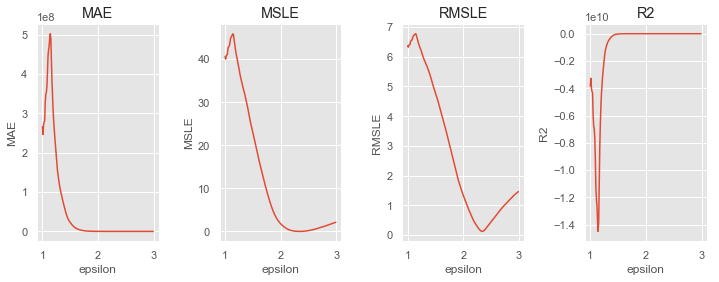

Huber Regressor : epsilon value which minimize MSLE is 2.34


In [360]:
from sklearn.linear_model import HuberRegressor
gs_huber = []

for eps in np.arange(1,3,0.01):
    # Create the estimator
    huber = HuberRegressor(epsilon=eps)

    # Fit it to X,y
    huber.fit(x_train_logdiff_scaled, y_train_logdiff_scaled.reshape(-1))
    
    # predicting
    y_pred_huber_trans = huber.predict(x_test_logdiff_scaled)

    # retransforming the data
    # First let's remove the scaling
    y_pred_huber = scaler.inverse_transform(y_pred_huber_trans)
    # Then retransform from logg diff
    y_pred_huber_retrans = revtransdiff(y_pred_huber, y_test_real)
    
    gs_huber.append({
        'epsilon':eps,
        'Coefficients': huber.coef_,
        'Intercept:': huber.intercept_,
        'MAE': mean_absolute_error(y_test_real, y_pred_huber_retrans),
        'MSE': mean_squared_error(y_test_real, y_pred_huber_retrans),
        'MSLE': mean_squared_log_error(y_test_real, y_pred_huber_retrans),
        'RMSE': RMSE(y_test_real, y_pred_huber_retrans),
        'RMSLE': RMSLE(y_test_real, y_pred_huber_retrans),        
        'R2': r2_score(y_test_real, y_pred_huber_retrans)
    })
gs_huber = pd.DataFrame(gs_huber)

# plotting the cost functions
plt.style.use('ggplot')

plt.figure(figsize=(12,4))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1,4,1)
plt.title('MAE')
plt.plot(gs_huber['epsilon'], gs_huber['MAE'])
plt.xlabel('epsilon')
plt.ylabel('MAE')

plt.subplot(1,4,2)
plt.title('MSLE')
plt.plot(gs_huber['epsilon'], gs_huber['MSLE'])
plt.xlabel('epsilon')
plt.ylabel('MSLE')

plt.subplot(1,4,3)
plt.title('RMSLE')
plt.plot(gs_huber['epsilon'], gs_huber['RMSLE'])
plt.xlabel('epsilon')
plt.ylabel('RMSLE')

plt.subplot(1,4,4)
plt.title('R2')
plt.plot(gs_huber['epsilon'], gs_huber['R2'])
plt.xlabel('epsilon')
plt.ylabel('R2')

plt.show()

# finding the value which maximimizes MSLE and saving it into a variable to be reused later

huber_eps_bestvalue = gs_huber[gs_huber['MSLE'] == gs_huber['MSLE'].min()].epsilon.values[0]
print('Huber Regressor : epsilon value which minimize MSLE is {:.2f}'.format(huber_eps_bestvalue))

Coefficients: [0.4964537  0.21419566 0.08109708 0.05027536]
Intercept: 2.3763170888091993e-05
Results
MAE   : 3122.6
MSE   : 20892797.1
MSLE  : 0.015
RMSE  : 4570.9
RMSLE : 0.124
R2    : 0.797
Results
MAE   : 3122.6
MSE   : 20892797.1
MSLE  : 0.015
RMSE  : 4570.9
RMSLE : 0.124
R2    : 0.797


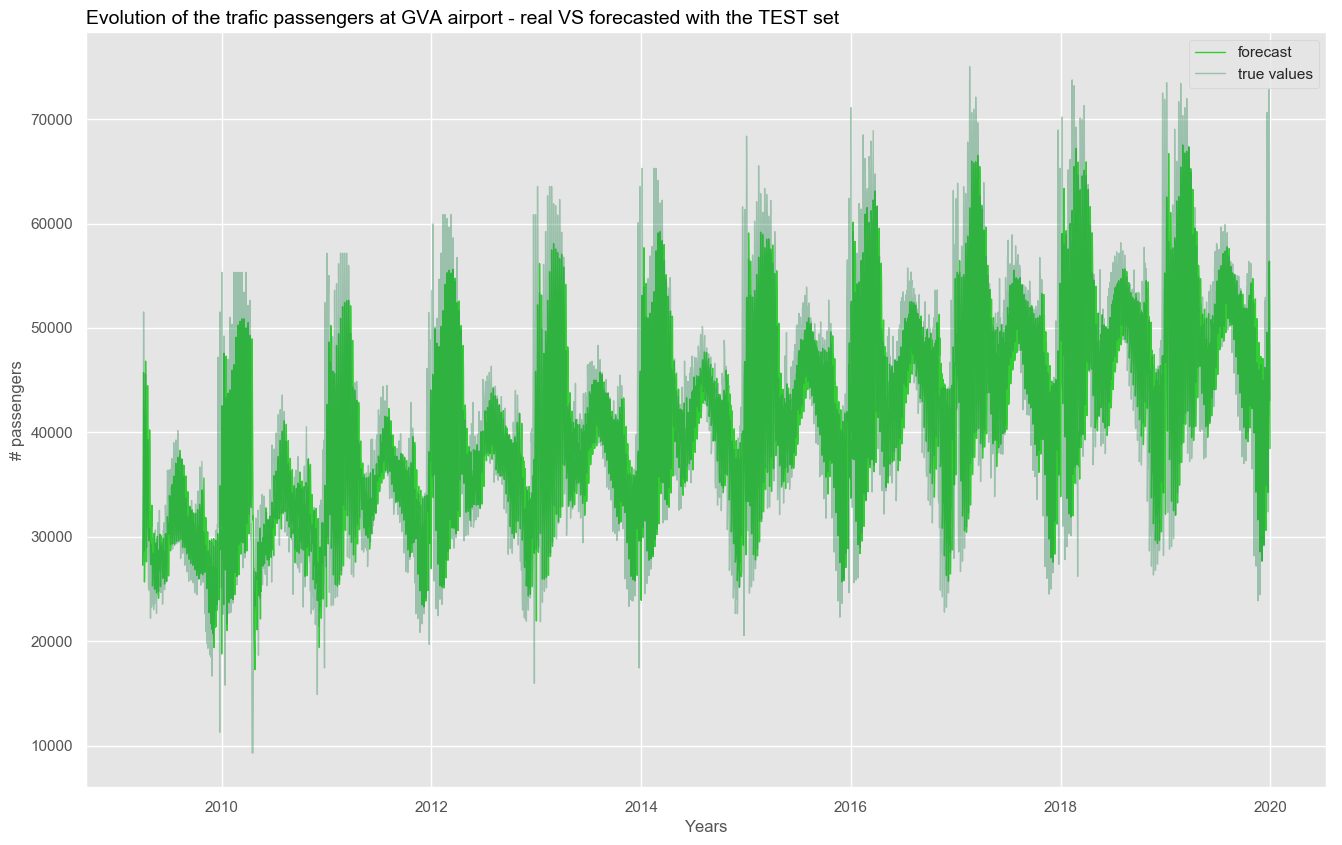

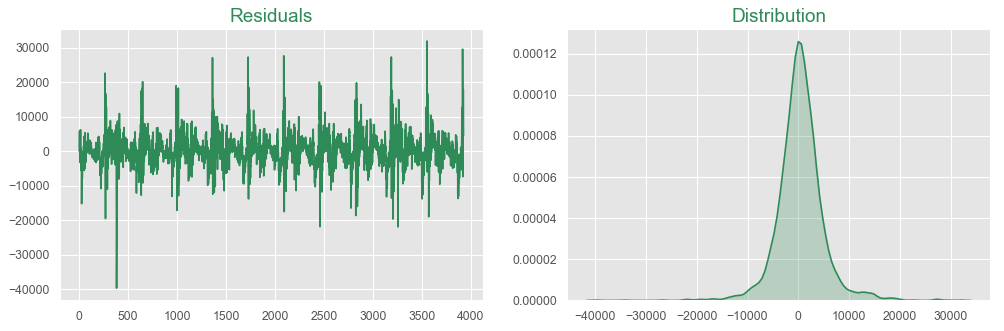

In [361]:
from sklearn.linear_model import HuberRegressor

# Create the estimator
huber = HuberRegressor(epsilon=huber_eps_bestvalue)

# Fit it to X,y
huber.fit(x_train_logdiff_scaled, y_train_logdiff_scaled.reshape(-1))

print('Coefficients:', huber.coef_)
print('Intercept:', huber.intercept_)

# predicting
y_pred_huber_trans = huber.predict(x_test_logdiff_scaled)

# retransforming the data
# First let's remove the scaling
y_pred_huber = scaler.inverse_transform(y_pred_huber_trans)
# Then retransform from logg diff
y_pred_huber_retrans = revtransdiff(y_pred_huber, y_test_real)

huber13114 = pd.DataFrame(costfunctions(y_test_real, y_pred_huber_retrans))
costfunctions(y_test_real, y_pred_huber_retrans)
resulplot(y_pred_huber_retrans, y_test_real, iata='GVA', dfindex=y_test_real)
residuals = residualsplotw(y_test_real, y_pred_huber_retrans)

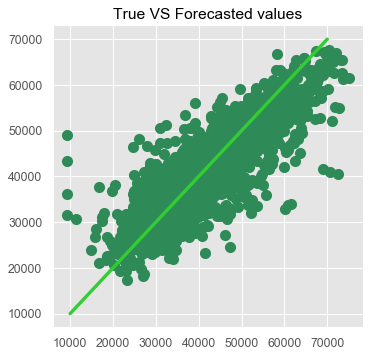

In [362]:
# Plotting
plt.style.use('ggplot')
plt.figure(figsize=(5,5), dpi=80)

# scatter plot
plt.scatter(y_test_real, y_pred_huber_retrans, color='seagreen', linewidth=4, alpha=1)

val = np.arange(10000, 80000, 10000)

# Add title & legend
plt.title('True VS Forecasted values', fontsize=14, fontweight=0, color='black')
plt.xticks(val)
plt.yticks(val)

# creating a straight line
xline = val
yline = val
plt.plot(xline, yline, '-r', c='limegreen', linewidth=3)

plt.show()

### 1.3.2. Time lags and other features

### 1.3.2.1. Analysing the relationships between the features

In a nutshell, we are looking for features which improve the accuracy of the model, by avoiding features which are highly correlated between each other and/or have no statistical realationship with the target.

Let's start by plotting the correlation matrix :

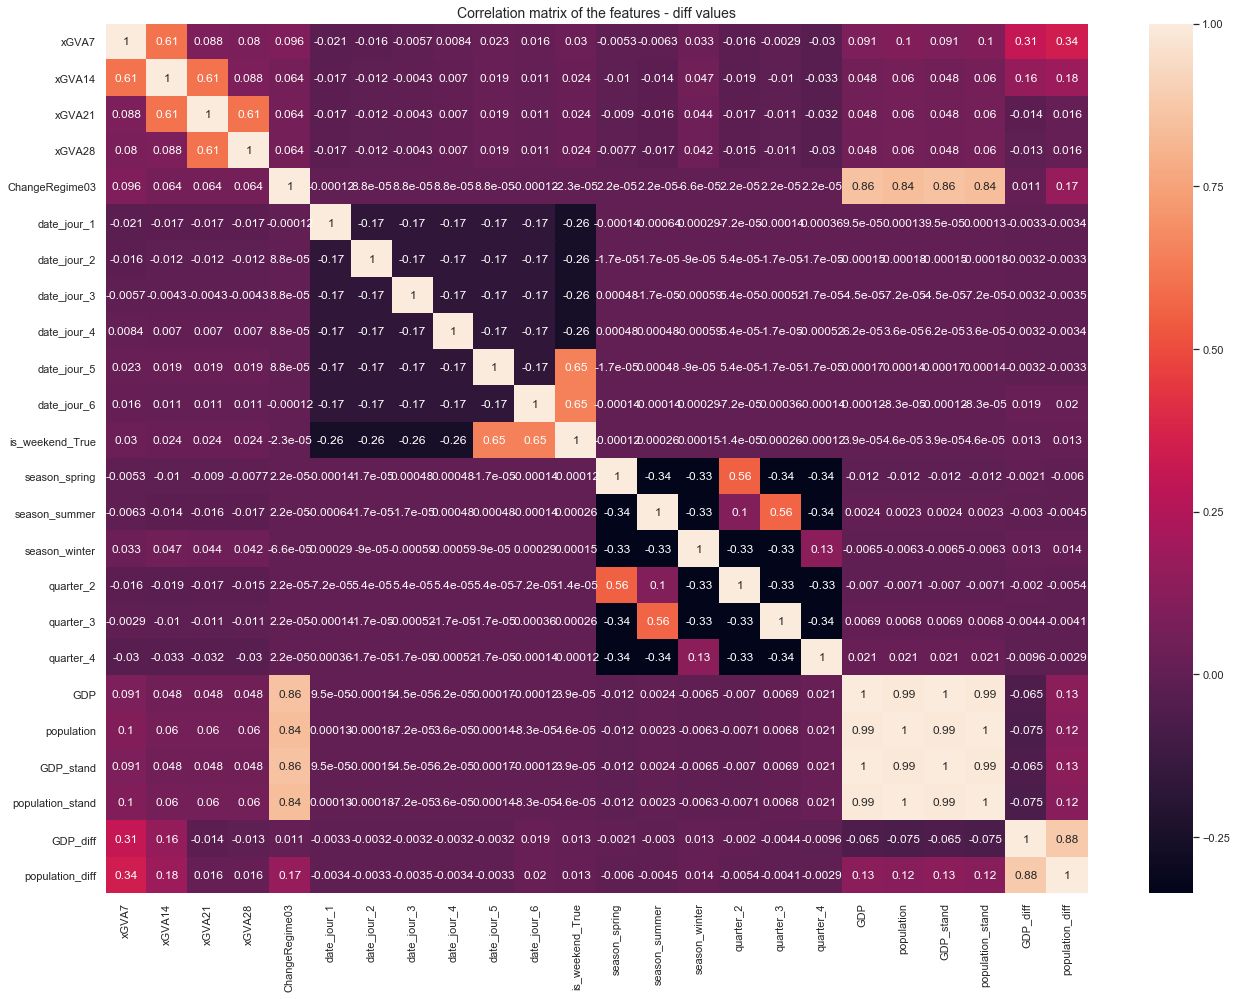

In [219]:
# Correlation matrix of the features

data_comp = data_ofac_cleaned.loc['1984-01-01':]

plt.figure(figsize = (22,16))

matrix = data_comp[['xGVA7', 'xGVA14','xGVA21', 'xGVA28','ChangeRegime03', 'date_jour_1', 'date_jour_2', 'date_jour_3',
       'date_jour_4', 'date_jour_5', 'date_jour_6', 'is_weekend_True',
       'season_spring', 'season_summer', 'season_winter', 'quarter_2',
       'quarter_3', 'quarter_4', 'GDP', 'population', 'GDP_stand', 'population_stand', 'GDP_diff',
       'population_diff']].corr()
sns.heatmap(matrix, annot=True)
plt.title("Correlation matrix of the features - diff values", fontsize=14)
plt.show()

Text(0.5, 1.0, 'Population versus GVA')

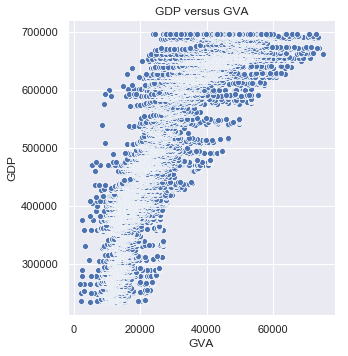

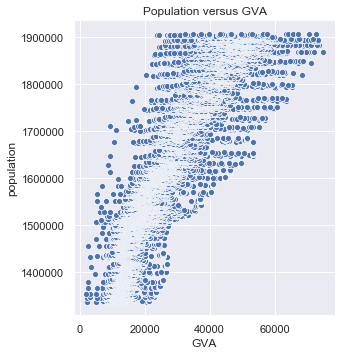

In [212]:
# plot of the features VS the GVA data

sns.set(style="darkgrid")

sns.relplot(x="GVA", y="GDP", data=data_ofac_cleaned.loc['1984-01-01':])
plt.title('GDP versus GVA')
sns.relplot(x="GVA", y="population", data=data_ofac_cleaned.loc['1984-01-01':])
plt.title('Population versus GVA')

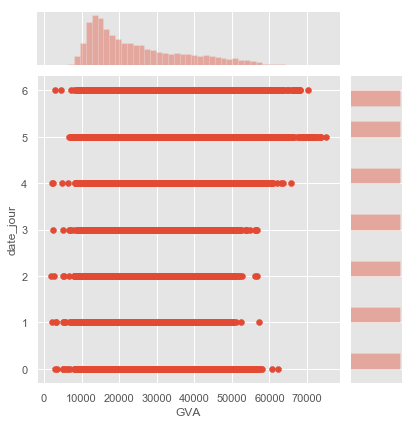

In [235]:
g = sns.jointplot(x="GVA", y="date_jour", data=data_ofac_cleaned.loc['1984-01-01':])

Text(0.5, 1.0, 'XXX versus GVA')

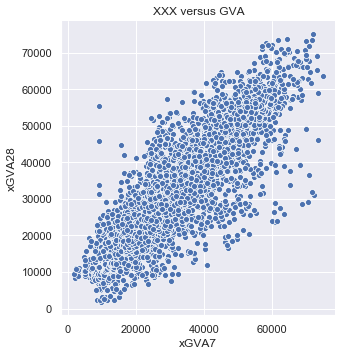

In [240]:
# plot of the features VS the GVA data

sns.set(style="darkgrid")
sns.relplot(x="xGVA7", y="xGVA28", data=data_ofac_cleaned.loc['1984-01-29':])
plt.title('XXX versus GVA')

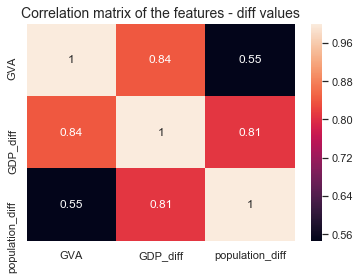

In [217]:
# Correlation matrix for the features (diff transformed)

data_comp = data_ofac_cleaned.loc['1984-01-01':]
matrix = data_ofac_cleaned[['GVA', 'GDP_diff', 'population_diff']].corr()
sns.heatmap(matrix, annot=True)
plt.title("Correlation matrix of the features - diff values", fontsize=14)
plt.show()

In [363]:
# All features

features_col_all = ['ChangeRegime03', 'date_jour_1', 'date_jour_2', 'date_jour_3',
       'date_jour_4', 'date_jour_5', 'date_jour_6', 'is_weekend_True',
       'season_spring', 'season_summer', 'season_winter', 'quarter_2',
       'quarter_3', 'quarter_4', 'GDP', 'population', 'GDP_stand', 'population_stand', 'GDP_diff',
       'population_diff']

# unscaled : 'GDP', 'population'
# scaled : 'GDP_stand', 'population_stand'
# diff : 'GDP_diff','population_diff'

#### 1.3.2.1. LR with all the features

# multiples of 7 : 4
# loops to execute : [1 2 3 4]
# of days to shift : 28
            ChangeRegime03  date_jour_1  date_jour_2  date_jour_3  \
date                                                                
1984-01-29           False            0            0            0   
1984-01-30           False            0            0            0   
1984-01-31           False            1            0            0   
1984-02-01           False            0            1            0   
1984-02-02           False            0            0            1   

            date_jour_4  date_jour_5  date_jour_6  is_weekend_True  \
date                                                                 
1984-01-29            0            0            1                1   
1984-01-30            0            0            0                0   
1984-01-31            0            0            0                0   
1984-02-01            0            0            0                0   
1984-02-02          

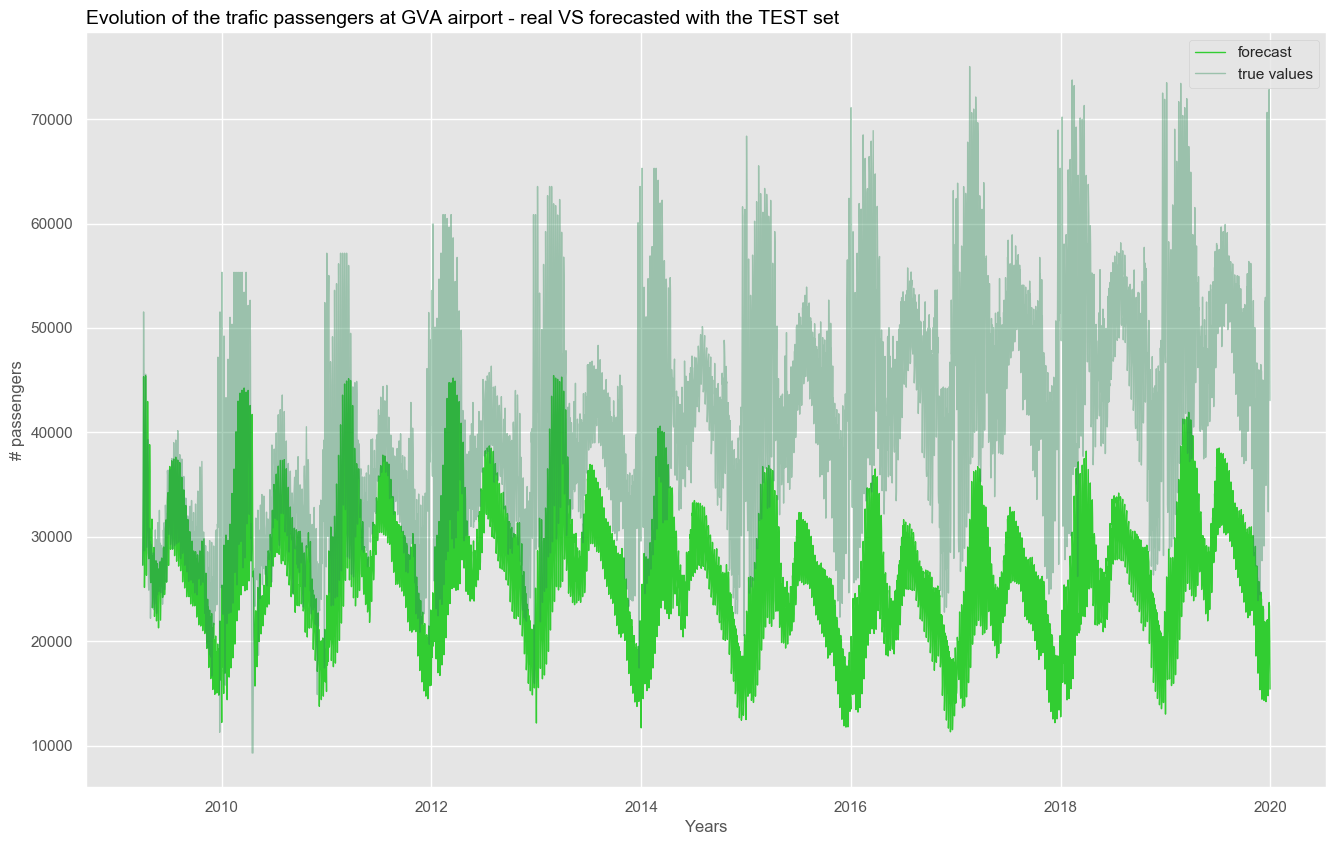

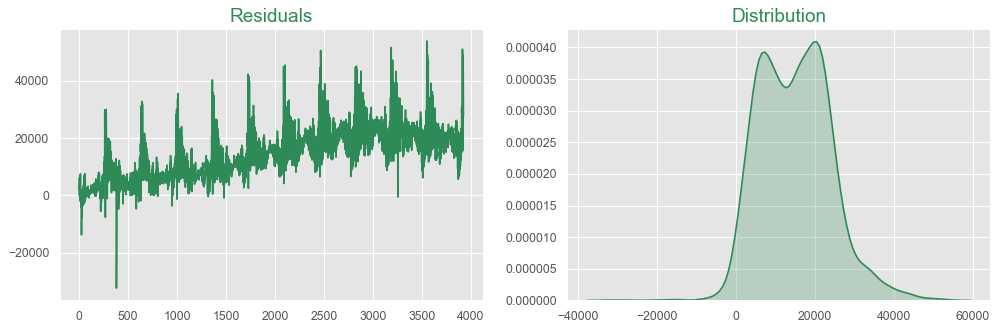

In [364]:
# 1.3.2. LR with all the features

# Creating the datasets with lag 1 and a multiple of lags of 7
features_col = ['ChangeRegime03', 'date_jour_1', 'date_jour_2', 'date_jour_3',
       'date_jour_4', 'date_jour_5', 'date_jour_6', 'is_weekend_True',
       'season_spring', 'season_summer', 'season_winter', 'quarter_2',
       'quarter_3', 'quarter_4', 'GDP_diff',
       'population_diff']

x_logdiff, y_logdiff, x_real, y_real, x_train_logdiff, y_train_logdiff, x_test_logdiff, y_test_logdiff, x_train_real, y_train_real, x_test_real, y_test_real = createsetsmultifeaturesMSadd(data_ofac_cleaned, 'GVA', 29, lg1='n', adcol=features_col)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train_logdiff, y_train_logdiff)

# coefficients
print('Coefficients:', lr.coef_)
print('Intercept:   ', lr.intercept_)

# predicting
y_tr_pred = lr.predict(x_train_logdiff)
y_te_pred = lr.predict(x_test_logdiff)


y_tr_pred_r = revtransdiff(y_tr_pred, y_train_real)
y_te_pred_r = revtransdiff(y_te_pred, y_test_real)

costfunctions(y_train_real, y_tr_pred_r)
res1321 = costfunctions(y_test_real, y_te_pred_r)
costfunctions(y_test_real, y_te_pred_r)

res1321df = pd.DataFrame()
#res['x_test_real'] = x_test_real
res1321df['y_test_real'] = y_test_real
res1321df['y_test_pred'] = y_te_pred_r


resulplot(y_te_pred_r, y_test_real, iata='GVA', dfindex=y_test_real)
residuals = residualsplotw(y_test_real, y_te_pred_r)

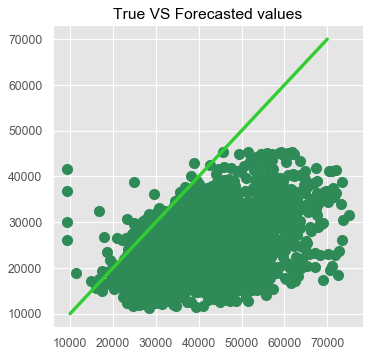

In [368]:
# Plotting
plt.style.use('ggplot')
plt.figure(figsize=(5,5), dpi=80)

# scatter plot
plt.scatter(y_test_real, y_te_pred_r, color='seagreen', linewidth=4, alpha=1)

val = np.arange(10000, 80000, 10000)

# Add title & legend
plt.title('True VS Forecasted values', fontsize=14, fontweight=0, color='black')
plt.xticks(val)
plt.yticks(val)

# creating a straight line
xline = val
yline = val
plt.plot(xline, yline, '-r', c='limegreen', linewidth=3)

plt.show()

In [369]:
features_all = np.array(data_ofac_cleaned.columns.tolist())

#### 1.3.2.2. LR with a selection of features

# multiples of 7 : 4
# loops to execute : [1 2 3 4]
# of days to shift : 28
            date_jour_1  date_jour_2  date_jour_3  date_jour_4  date_jour_5  \
date                                                                          
1984-01-29            0            0            0            0            0   
1984-01-30            0            0            0            0            0   
1984-01-31            1            0            0            0            0   
1984-02-01            0            1            0            0            0   
1984-02-02            0            0            1            0            0   

            date_jour_6  season_spring  season_summer  season_winter  \
date                                                                   
1984-01-29            1              0              0              1   
1984-01-30            0              0              0              1   
1984-01-31            0              0              0              1   
1984-02-01

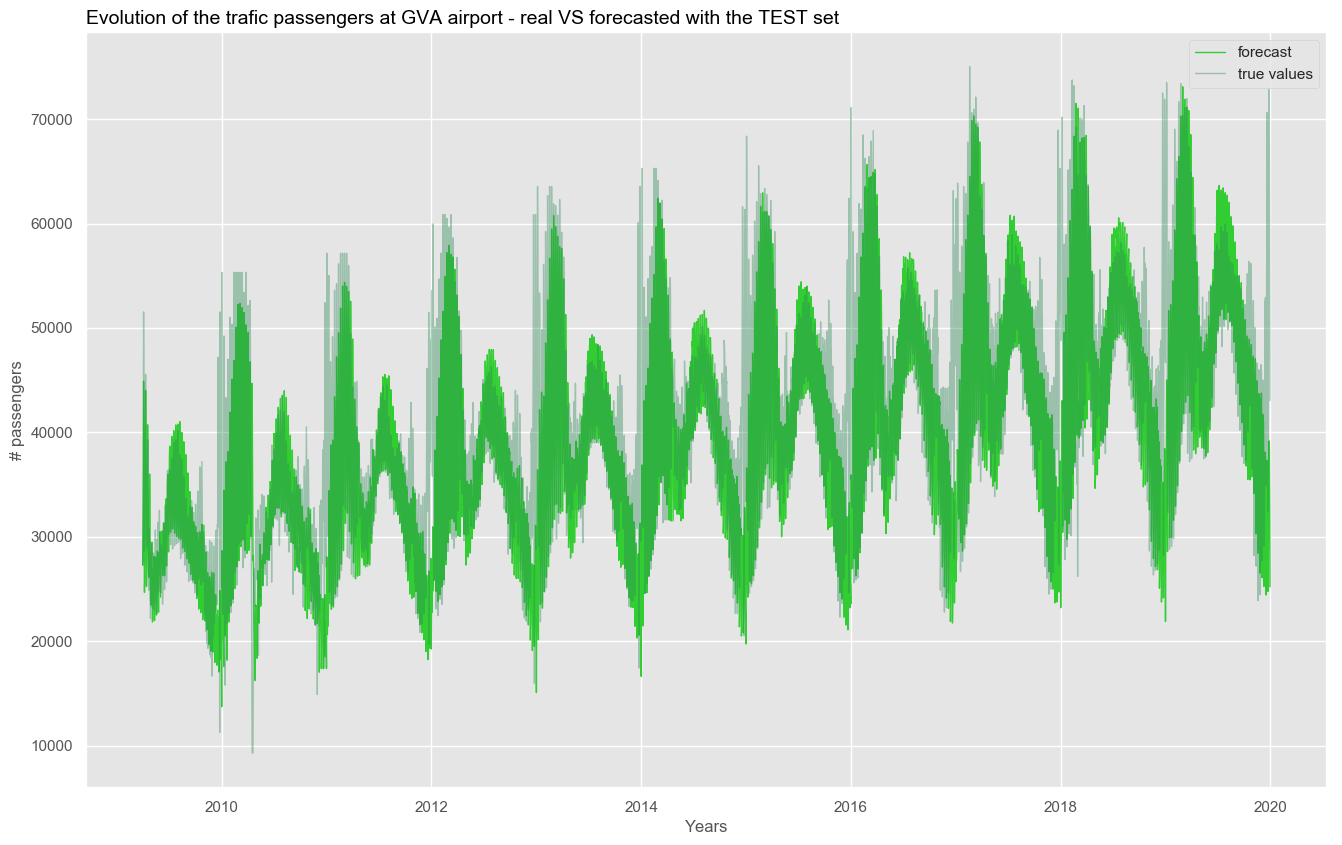

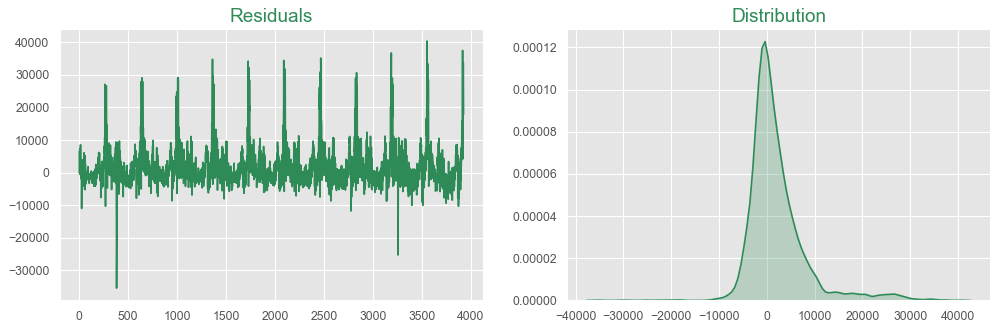

In [370]:
# 1.3.2.2. LR with a selection of features

# Creating the datasets with lag 1 and a multiple of lags of 7
features_col = ['date_jour_1', 'date_jour_2', 'date_jour_3', 'date_jour_4', 'date_jour_5', 'date_jour_6','season_spring', 'season_summer', 'season_winter', 'GDP_diff', 'month_nb_02','month_nb_03','month_nb_04','month_nb_05','month_nb_06','month_nb_07','month_nb_08','month_nb_09','month_nb_10','month_nb_11','month_nb_12']
x_logdiff, y_logdiff, x_real, y_real, x_train_logdiff, y_train_logdiff, x_test_logdiff, y_test_logdiff, x_train_real, y_train_real, x_test_real, y_test_real = createsetsmultifeaturesMSadd(data_ofac_cleaned, 'GVA', 29, lg1='n', adcol=features_col)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train_logdiff, y_train_logdiff)

# coefficients
print('Coefficients:', lr.coef_)
print('Intercept:   ', lr.intercept_)

# predicting
y_tr_pred = lr.predict(x_train_logdiff)
y_te_pred = lr.predict(x_test_logdiff)


y_tr_pred_r = revtransdiff(y_tr_pred, y_train_real)
y_te_pred_r = revtransdiff(y_te_pred, y_test_real)

costfunctions(y_train_real, y_tr_pred_r)
res1322 = costfunctions(y_test_real, y_te_pred_r)
costfunctions(y_test_real, y_te_pred_r)

res1322df = pd.DataFrame()
#res['x_test_real'] = x_test_real
res1322df['y_test_real'] = y_test_real
res1322df['y_test_pred'] = y_te_pred_r

resulplot(y_te_pred_r, y_test_real, iata='GVA', dfindex=y_test_real)
    
residuals = residualsplotw(y_test_real, y_te_pred_r)

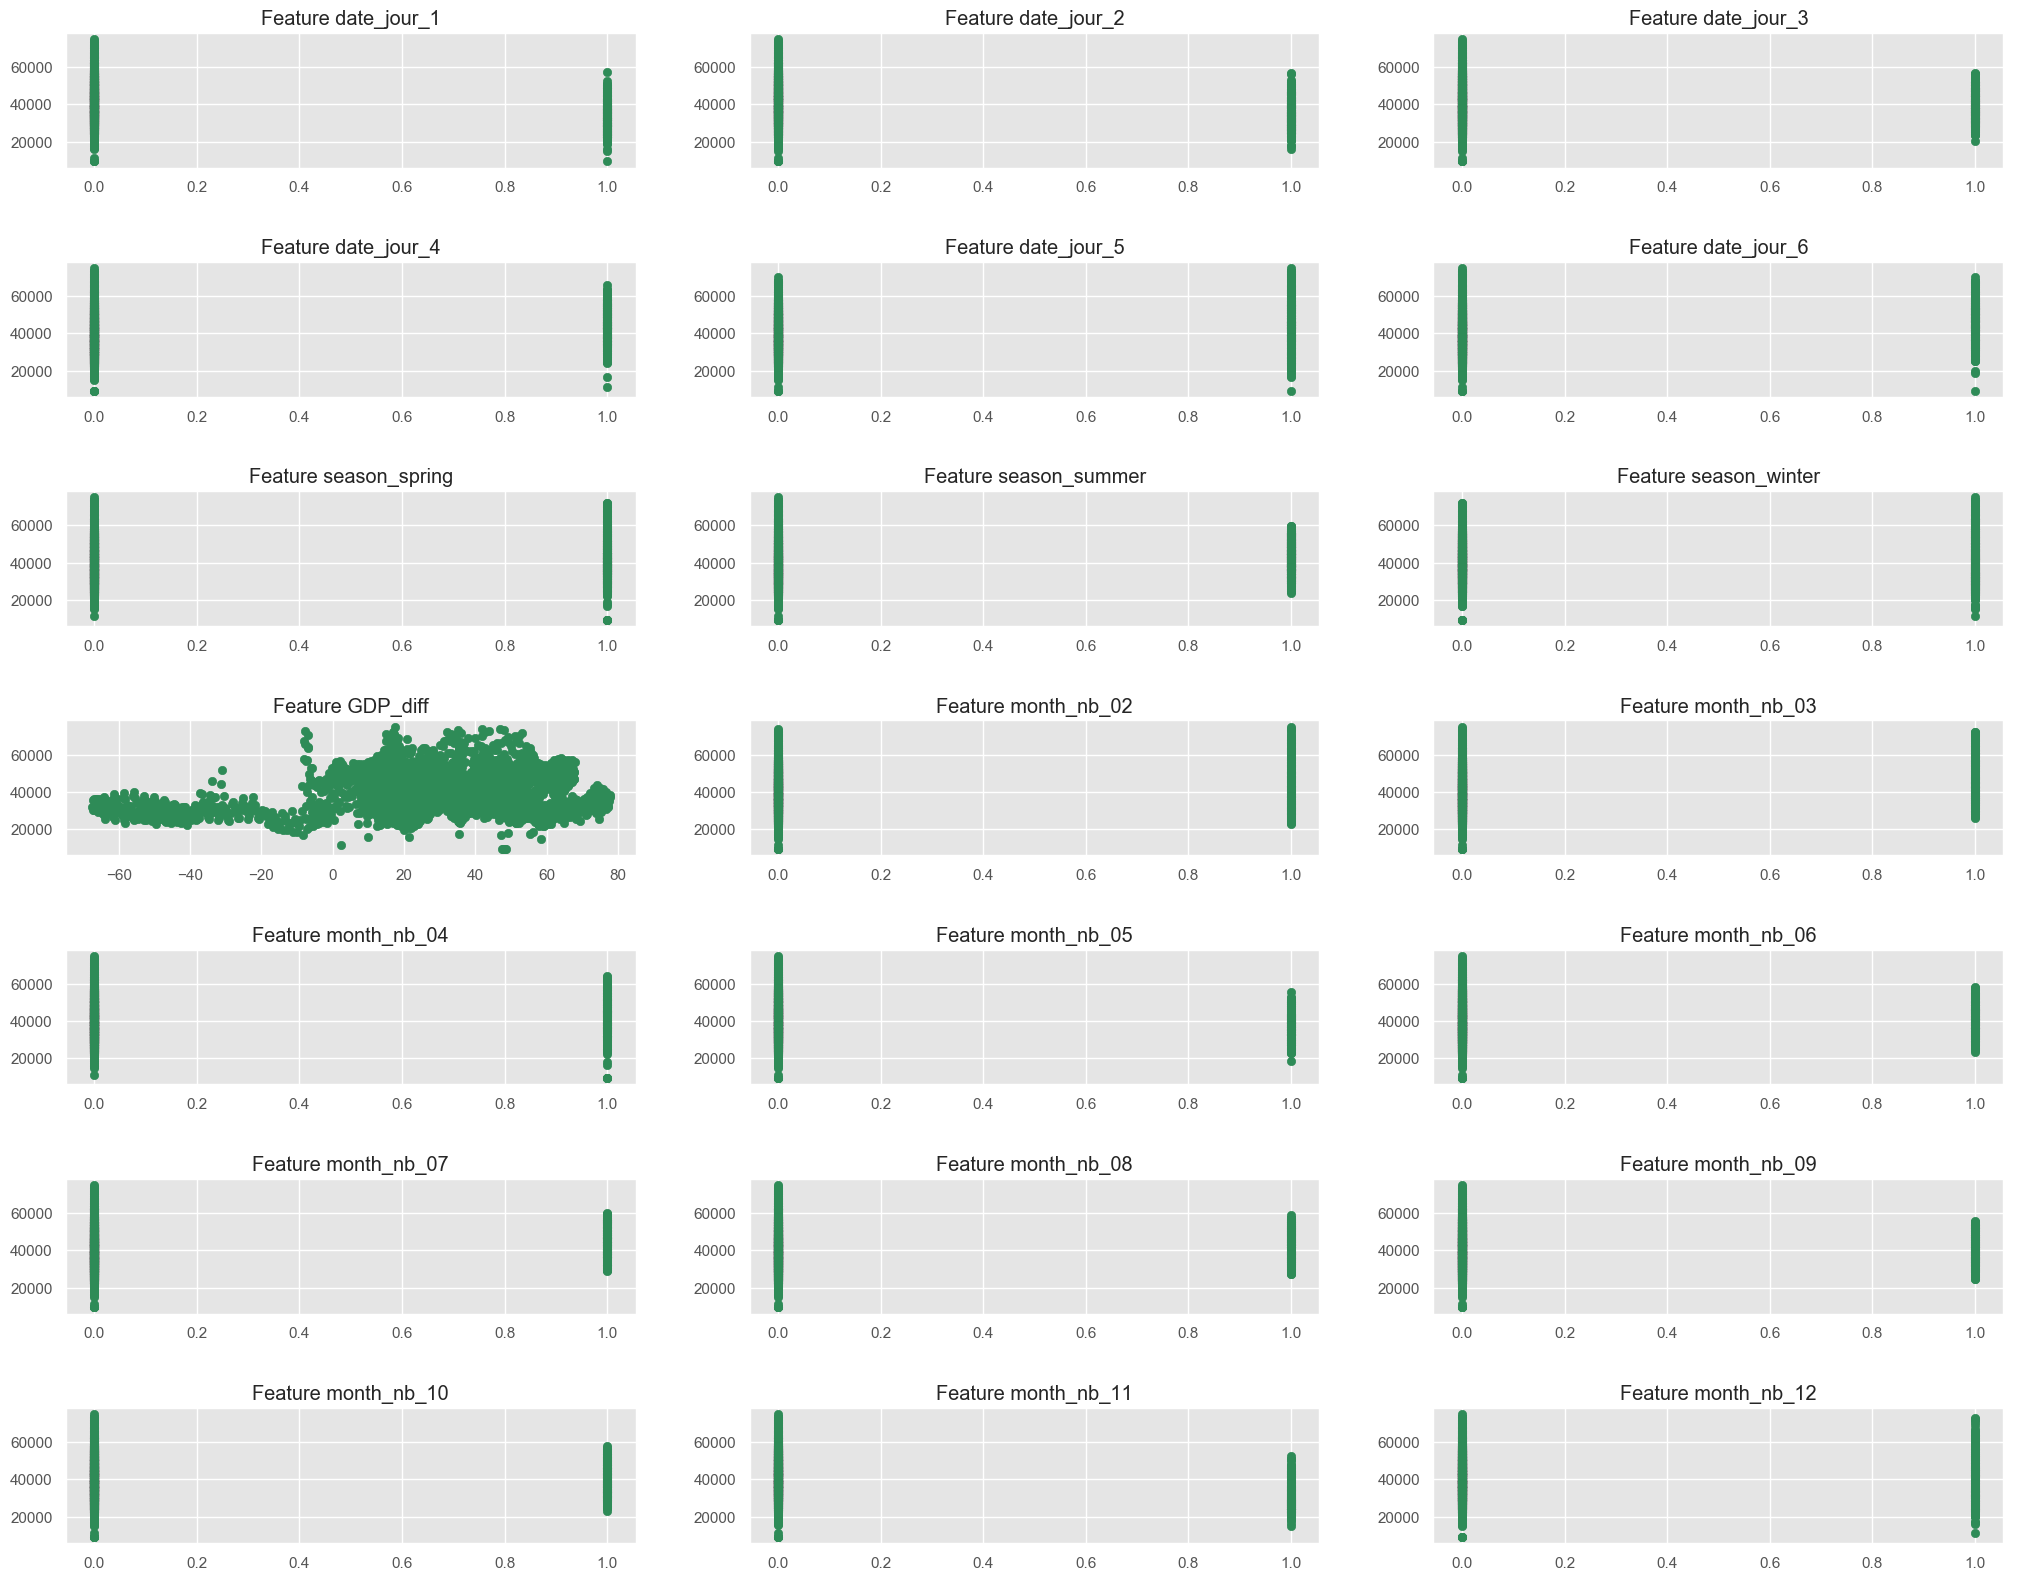

In [371]:
nb = np.arange(1, len(features_col)+1, 1)

plt.figure(figsize=(25,20), dpi=100)
plt.subplots_adjust(hspace=0.7, wspace=0.2)

for i in nb:
    featnb = i-1
    plt.subplot(7,3,i)
    plt.scatter(data_ofac_cleaned[features_col[featnb]].loc['2009-04-01':], y_test_real, c='seagreen')
    plt.title('Feature {}'.format(features_col[featnb]))
plt.show()

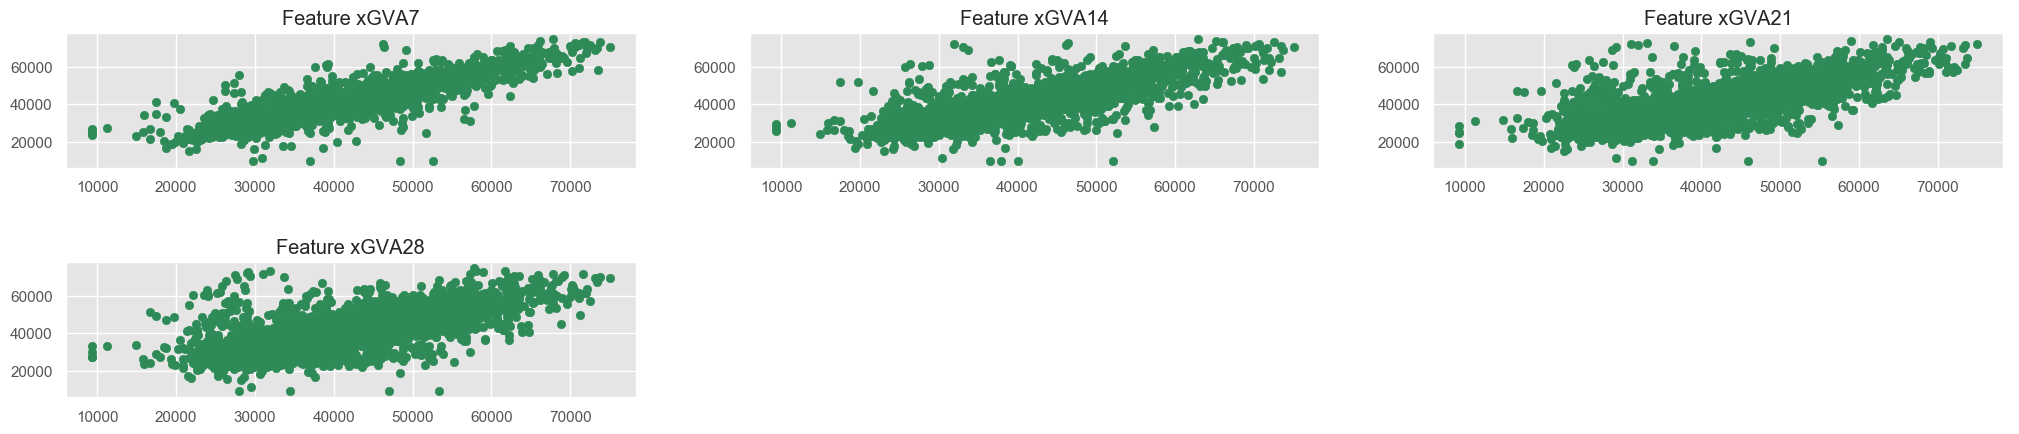

In [372]:
features_col_day = ['xGVA7','xGVA14','xGVA21','xGVA28']  # day lags that we are using

nb = np.arange(1, len(features_col_day)+1, 1)

plt.figure(figsize=(25,20), dpi=100)
plt.subplots_adjust(hspace=0.7, wspace=0.2)

for i in nb:
    featnb = i-1
    plt.subplot(7,3,i)
    plt.scatter(data_ofac_cleaned[features_col_day[featnb]].loc['2009-04-01':], y_test_real, c='seagreen')
    plt.title('Feature {}'.format(features_col_day[featnb]))
plt.show()

In [373]:
# 1.3.2.2. Inspecting the coefficients

# printing the number of coefficients
print('Number of coefficients : {}'.format(len(lr.coef_)))

# creating a dataframe to have a better view
features_col_day = ['xGVA7','xGVA14','xGVA21','xGVA28']  # day lags that we are using
col_names = np.concatenate((features_col, features_col_day)) # concatenating with the features used in the LR
df_lrcoef = pd.DataFrame(zip(col_names, lr.coef_), columns=['coeff name','(e)coefficient'])  #zip returns an iterator of tuples

# Pair plot of the selected features
sns.pairplot(data_ofac_cleaned.loc['1984-01-01':][features_col])
plt.show()

# plot of the distribution of the coefficients
fig = plt.figure(figsize=(15, 7), dpi=80)
plt.title('Coefficients', fontsize=20, color="seagreen")
plt.hist(lr.coef_, bins=10, color='seagreen')
plt.show()

df_lrcoef

Number of coefficients : 25


KeyboardInterrupt: 

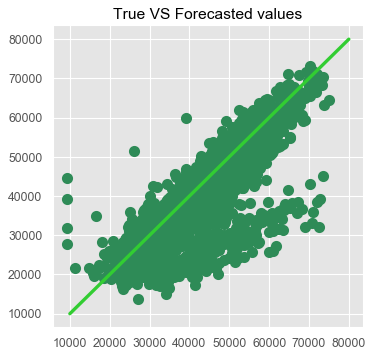

In [376]:
# Plotting
plt.style.use('ggplot')
plt.figure(figsize=(5,5), dpi=80)

# scatter plot
plt.scatter(y_test_real, y_te_pred_r, color='seagreen', linewidth=4, alpha=1)

val = np.arange(10000, 90000, 10000)

# Add title & legend
plt.title('True VS Forecasted values', fontsize=14, fontweight=0, color='black')
plt.xticks(val)
plt.yticks(val)

# creating a straight line
xline = val
yline = val
plt.plot(xline, yline, '-r', c='limegreen', linewidth=3)

plt.show()

#### 1.3.2.3. Huber Regressor with multiple of 7 and selected features

In [377]:
# 1.3.2.3. Creating the datasets with lag 1 and a multiple of lags of 7
features_col = ['date_jour_1', 'date_jour_2', 'date_jour_3', 'date_jour_4', 'date_jour_5', 'date_jour_6','GDP_diff']
x_logdiff, y_logdiff, x_real, y_real, x_train_logdiff, y_train_logdiff, x_test_logdiff, y_test_logdiff, x_train_real, y_train_real, x_test_real, y_test_real = createsetsmultifeaturesMSadd(data_ofac_cleaned, 'GVA', 29, lg1='n', adcol=features_col)

# multiples of 7 : 4
# loops to execute : [1 2 3 4]
# of days to shift : 28
            date_jour_1  date_jour_2  date_jour_3  date_jour_4  date_jour_5  \
date                                                                          
1984-01-29            0            0            0            0            0   
1984-01-30            0            0            0            0            0   
1984-01-31            1            0            0            0            0   
1984-02-01            0            1            0            0            0   
1984-02-02            0            0            1            0            0   

            date_jour_6   GDP_diff        7       14       21       28  
date                                                                    
1984-01-29            1  33.307615  11093.0  11218.0  15239.0   8011.0  
1984-01-30            0  33.416350   9233.0   8921.0  11652.0  15318.0  
1984-01-31            0  33.525085   8148.0   8720.0   9664.0  11596.0  
1984-

In [378]:
# 1.3.2.3. scaling the sets
scaler = StandardScaler()
scaler.fit(x_train_logdiff.reshape(-1, 1))
    
x_train_logdiff_scaled = scaler.transform(x_train_logdiff)
y_train_logdiff_scaled = scaler.transform(y_train_logdiff.reshape(-1, 1))
    
x_test_logdiff_scaled = scaler.transform(x_test_logdiff)
y_test_logdiff_scaled = scaler.transform(y_test_logdiff.reshape(-1, 1)) 

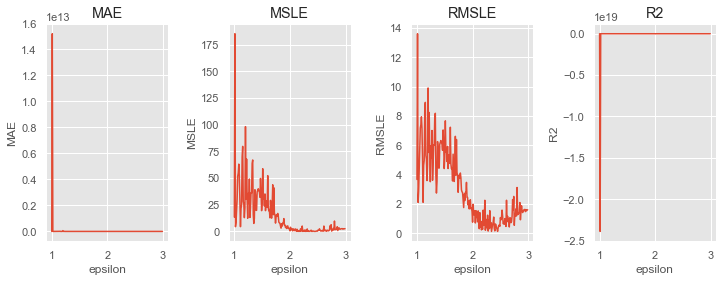

Huber Regressor : epsilon value which minimize MSLE is 2.34


In [379]:
# 1.3.2.3. Huber regressor on multiple of 7 and selected features

from sklearn.linear_model import HuberRegressor
gs_huber = []

for eps in np.arange(1,3,0.01):
    # Create the estimator
    huber = HuberRegressor(epsilon=eps)

    # Fit it to X,y
    huber.fit(x_train_logdiff_scaled, y_train_logdiff_scaled.reshape(-1))
    
    # predicting
    y_pred_huber_trans = huber.predict(x_test_logdiff_scaled)

    # retransforming the data
    # First let's remove the scaling
    y_pred_huber = scaler.inverse_transform(y_pred_huber_trans)
    # Then retransform from logg diff
    y_pred_huber_retrans = revtransdiff(y_pred_huber, y_test_real)
    
    gs_huber.append({
        'epsilon':eps,
        'Coefficients': huber.coef_,
        'Intercept:': huber.intercept_,
        'MAE': mean_absolute_error(y_test_real, y_pred_huber_retrans),
        'MSE': mean_squared_error(y_test_real, y_pred_huber_retrans),
        'MSLE': mean_squared_log_error(y_test_real, y_pred_huber_retrans),
        'RMSE': RMSE(y_test_real, y_pred_huber_retrans),
        'RMSLE': RMSLE(y_test_real, y_pred_huber_retrans),        
        'R2': r2_score(y_test_real, y_pred_huber_retrans)
    })
gs_huber = pd.DataFrame(gs_huber)

# plotting the cost functions
plt.style.use('ggplot')

plt.figure(figsize=(12,4))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1,4,1)
plt.title('MAE')
plt.plot(gs_huber['epsilon'], gs_huber['MAE'])
plt.xlabel('epsilon')
plt.ylabel('MAE')

plt.subplot(1,4,2)
plt.title('MSLE')
plt.plot(gs_huber['epsilon'], gs_huber['MSLE'])
plt.xlabel('epsilon')
plt.ylabel('MSLE')

plt.subplot(1,4,3)
plt.title('RMSLE')
plt.plot(gs_huber['epsilon'], gs_huber['RMSLE'])
plt.xlabel('epsilon')
plt.ylabel('RMSLE')

plt.subplot(1,4,4)
plt.title('R2')
plt.plot(gs_huber['epsilon'], gs_huber['R2'])
plt.xlabel('epsilon')
plt.ylabel('R2')

plt.show()

# finding the value which maximimizes MSLE and saving it into a variable to be reused later

huber_eps_bestvalue = gs_huber[gs_huber['MSLE'] == gs_huber['MSLE'].min()].epsilon.values[0]
print('Huber Regressor : epsilon value which minimize MSLE is {:.2f}'.format(huber_eps_bestvalue))

Coefficients: [ 2.03045694e-02  6.08385642e-02  6.78886253e-02  6.80340361e-02
  7.90734835e-02  3.65743817e-02 -4.31126675e-08  4.58672144e-01
  2.13338635e-01  6.17198037e-02  1.32513607e-02]
Intercept: 0.01776992312743817
Results
MAE   : 3193.8
MSE   : 20778329.8
MSLE  : 0.015
RMSE  : 4558.3
RMSLE : 0.123
R2    : 0.798
Results
MAE   : 3193.8
MSE   : 20778329.8
MSLE  : 0.015
RMSE  : 4558.3
RMSLE : 0.123
R2    : 0.798


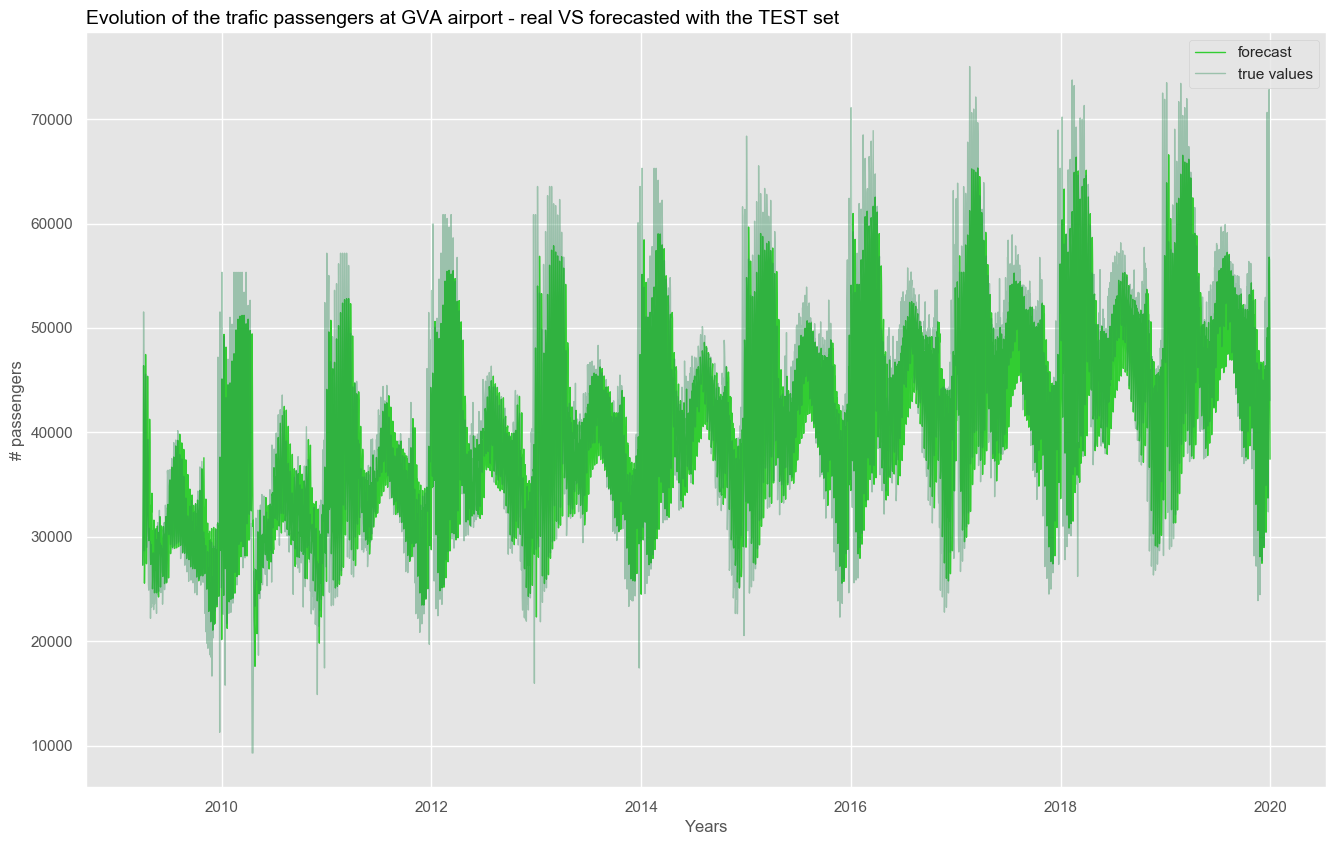

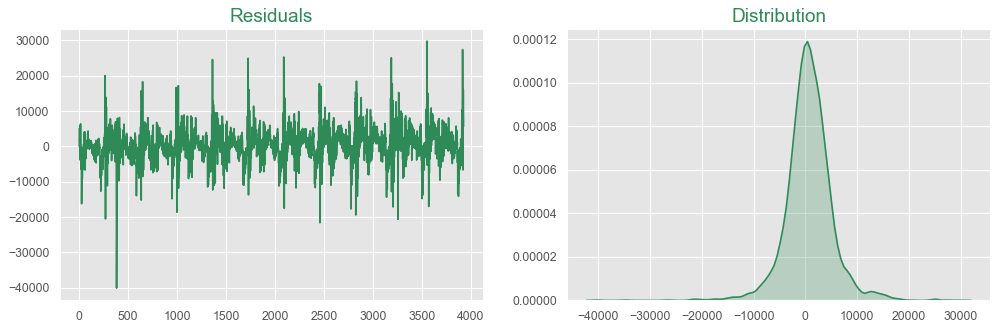

In [380]:
from sklearn.linear_model import HuberRegressor

# Create the estimator
huber = HuberRegressor(epsilon=huber_eps_bestvalue)

# Fit it to X,y
huber.fit(x_train_logdiff_scaled, y_train_logdiff_scaled.reshape(-1))

print('Coefficients:', huber.coef_)
print('Intercept:', huber.intercept_)

# predicting
y_pred_huber_trans_tr = huber.predict(x_train_logdiff_scaled)
y_pred_huber_trans = huber.predict(x_test_logdiff_scaled)

# retransforming the data
# First let's remove the scaling
y_pred_huber_tr = scaler.inverse_transform(y_pred_huber_trans_tr)
y_pred_huber = scaler.inverse_transform(y_pred_huber_trans)
# Then retransform from logg diff
y_pred_huber_retrans_tr = revtransdiff(y_pred_huber_tr, y_test_real)
y_pred_huber_retrans = revtransdiff(y_pred_huber, y_test_real)

huber1323 = pd.DataFrame(costfunctions(y_test_real, y_pred_huber_retrans))
costfunctions(y_test_real, y_pred_huber_retrans)
resulplot(y_pred_huber_retrans, y_test_real, iata='GVA', dfindex=y_test_real)
residuals = residualsplotw(y_test_real, y_pred_huber_retrans)

Number of coefficients : 11


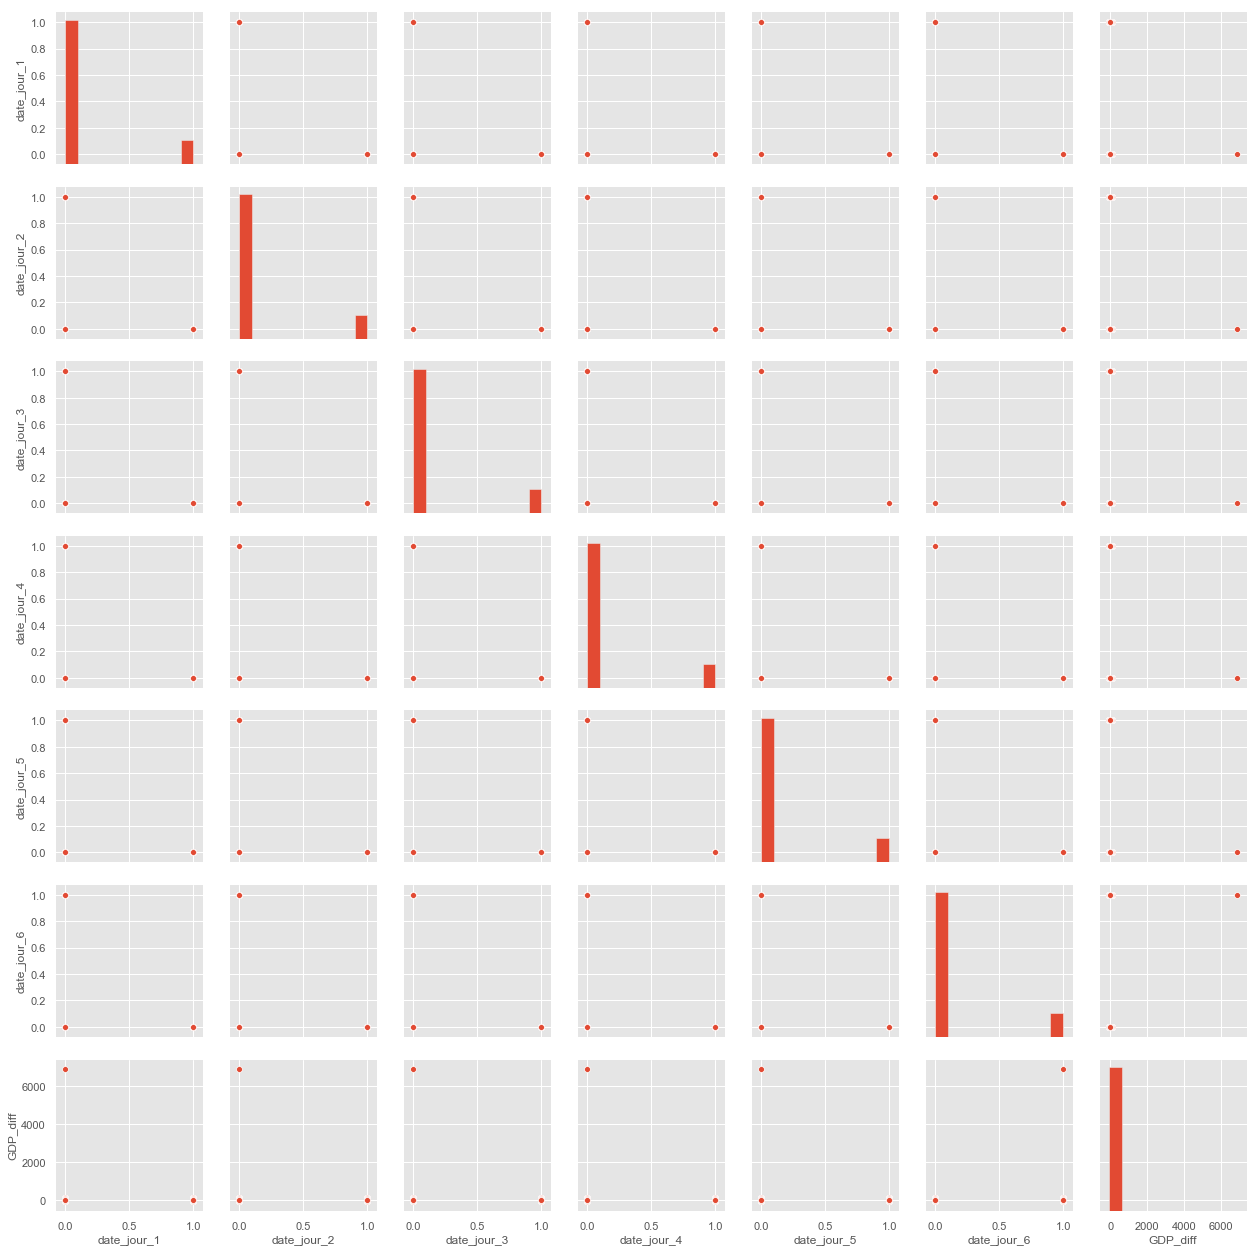

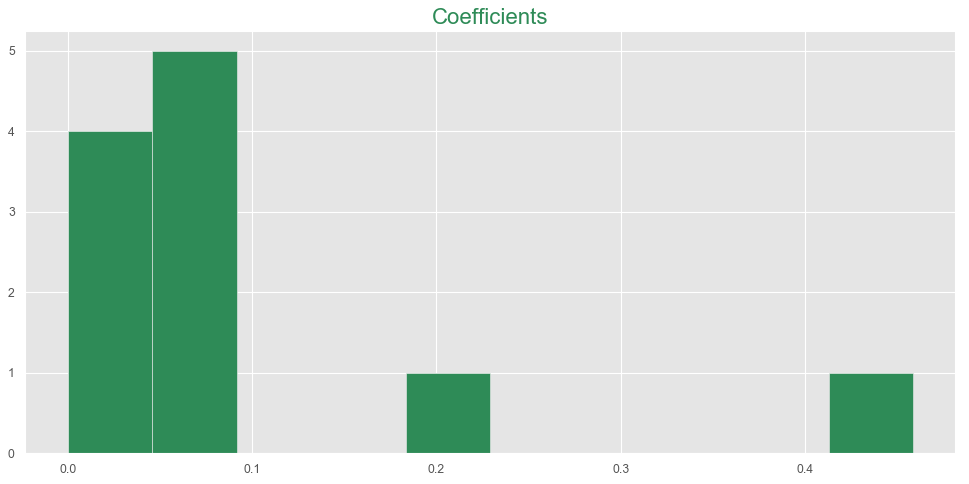

coeff name  (e)coefficient
0   date_jour_1    2.030457e-02
1   date_jour_2    6.083856e-02
2   date_jour_3    6.788863e-02
3   date_jour_4    6.803404e-02
4   date_jour_5    7.907348e-02
5   date_jour_6    3.657438e-02
6      GDP_diff   -4.311267e-08
7         xGVA7    4.586721e-01
8        xGVA14    2.133386e-01
9        xGVA21    6.171980e-02
10       xGVA28    1.325136e-02

In [381]:
# 1.3.2.4. Inspecting the coefficients

# printing the number of coefficients
print('Number of coefficients : {}'.format(len(huber.coef_)))

# creating a dataframe to have a better view
features_col_day = ['xGVA7','xGVA14','xGVA21','xGVA28']  # day lags that we are using
col_names = np.concatenate((features_col, features_col_day)) # concatenating with the features used in the LR
df_huber1323coef = pd.DataFrame(zip(col_names, huber.coef_), columns=['coeff name','(e)coefficient'])  #zip returns an iterator of tuples

# Pair plot of the selected features
sns.pairplot(data_ofac_cleaned.loc['1984-01-01':][features_col])
plt.show()

# plot of the distribution of the coefficients
fig = plt.figure(figsize=(15, 7), dpi=80)
plt.title('Coefficients', fontsize=20, color="seagreen")
plt.hist(huber.coef_, bins=10, color='seagreen')
plt.show()

df_huber1323coef

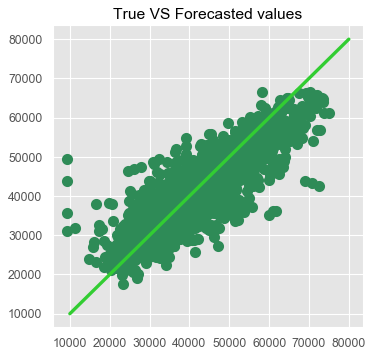

In [382]:
# Plotting
plt.style.use('ggplot')
plt.figure(figsize=(5,5), dpi=80)

# scatter plot
plt.scatter(y_test_real, y_pred_huber_retrans, color='seagreen', linewidth=4, alpha=1)

val = np.arange(10000, 90000, 10000)

# Add title & legend
plt.title('True VS Forecasted values', fontsize=14, fontweight=0, color='black')
plt.xticks(val)
plt.yticks(val)

# creating a straight line
xline = val
yline = val
plt.plot(xline, yline, '-r', c='limegreen', linewidth=3)

plt.show()

#### 1.3.2.4. LR Lasso tuning hyperparameters with multiple of 7 and selected features

In [383]:
# 1.3.2.4. LR Lasso tuning hyperparameters with multiple of 7 and selected features

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

features_col = ['date_jour_1', 'date_jour_2', 'date_jour_3', 'date_jour_4', 'date_jour_5', 'date_jour_6','season_spring', 'season_summer', 'season_winter', 'GDP_diff']
x_logdiff, y_logdiff, x_real, y_real, x_train_logdiff, y_train_logdiff, x_test_logdiff, y_test_logdiff, x_train_real, y_train_real, x_test_real, y_test_real = createsetsmultifeaturesMSadd(data_ofac_cleaned, 'GVA', 29, lg1='n', adcol=features_col)

lassores = []
alphas = np.arange(1e-15, 1e-3, 0.000001)  # defining a refined range of values
for al in alphas:
    lasso = Lasso(alpha=al, max_iter=10000)
    lasso.fit(x_train_logdiff, y_train_logdiff)

    # predicting
    y_tr_pred = lasso.predict(x_train_logdiff)
    y_te_pred = lasso.predict(x_test_logdiff)

    y_tr_pred_r = revtransdiff(y_tr_pred, y_train_real)
    y_te_pred_r = revtransdiff(y_te_pred, y_test_real)

    lassores.append({
        'alpha':al,
        'MAE tr': mean_absolute_error(y_train_real, y_tr_pred_r),        
        'MAE te': mean_absolute_error(y_test_real, y_te_pred_r),
        'MSE': mean_squared_error(y_test_real, y_te_pred_r),
        'MSLE': mean_squared_log_error(y_test_real, y_te_pred_r),
        'RMSE': RMSE(y_test_real, y_te_pred_r),
        'RMSLE': RMSLE(y_test_real, y_te_pred_r),        
        'R2': r2_score(y_test_real, y_te_pred_r)
    })
lassores = pd.DataFrame(lassores)
lassores.head(10)

# multiples of 7 : 4
# loops to execute : [1 2 3 4]
# of days to shift : 28
            date_jour_1  date_jour_2  date_jour_3  date_jour_4  date_jour_5  \
date                                                                          
1984-01-29            0            0            0            0            0   
1984-01-30            0            0            0            0            0   
1984-01-31            1            0            0            0            0   
1984-02-01            0            1            0            0            0   
1984-02-02            0            0            1            0            0   

            date_jour_6  season_spring  season_summer  season_winter  \
date                                                                   
1984-01-29            1              0              0              1   
1984-01-30            0              0              0              1   
1984-01-31            0              0              0              1   
1984-02-01

MAE te       MAE tr           MSE      MSLE        R2         RMSE  \
0  3124.306086  1884.395040  2.098153e+07  0.015169  0.796359  4580.560513   
1  3122.978610  1885.252230  2.096317e+07  0.015161  0.796537  4578.555439   
2  3121.696970  1886.138460  2.094520e+07  0.015153  0.796712  4576.593099   
3  3120.440285  1887.027083  2.092743e+07  0.015146  0.796884  4574.650303   
4  3119.250573  1887.938112  2.091008e+07  0.015139  0.797053  4572.754406   
5  3118.156608  1888.859365  2.089321e+07  0.015132  0.797216  4570.908901   
6  3117.153043  1889.804546  2.087657e+07  0.015125  0.797378  4569.088986   
7  3116.213394  1890.762889  2.086031e+07  0.015118  0.797536  4567.309115   
8  3115.296409  1891.728627  2.084445e+07  0.015112  0.797690  4565.572461   
9  3114.409728  1892.713618  2.082891e+07  0.015106  0.797840  4563.870190   

      RMSLE         alpha  
0  0.123163  1.000000e-15  
1  0.123131  1.000000e-06  
2  0.123099  2.000000e-06  
3  0.123069  3.000000e-06  
4  0.123039  4.000000e-06  
5  0.123011  5.000000e-06  
6  0.122983  6.000000e-06  
7  0.122956  7.000000e-06  
8  0.122930  8.000000e-06  
9  0.122905  9.000000e-06

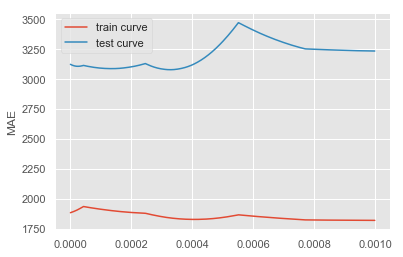

In [384]:
# 1.3.2.4. Ploting the alpha curves
plt.plot(lassores['alpha'], lassores['MAE tr'], label='train curve')
plt.plot(lassores['alpha'], lassores['MAE te'], label='test curve')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [385]:
# 1.3.2.4. Getting the best results

lassminmaeval = lassores[lassores['MAE tr'] == lassores['MAE tr'].min()]['MAE tr'].values[0] # MAE value
lassminmaevalalpha = lassores[lassores['MAE tr'] == lassores['MAE tr'].min()]['alpha'].values[0] # alpha value

lassmaxr2val = lassores[lassores['R2'] == lassores['R2'].max()]['R2'].values[0] # MAE value
lassmaxr2valalpha = lassores[lassores['R2'] == lassores['R2'].min()]['alpha'].values[0] # alpha valuelpha = lassores[lassores['MAE tr'] == lassores['MAE tr'].min()]['alpha'].values[0]

print('Alpha {:.6f} is minimizing the MAE with a value of {:.2f}.'.format(lassminmaevalalpha, lassminmaeval))
print('Alpha {:.6f} is maximizing the R2 with a value of {:.2f}.'.format(lassmaxr2valalpha, lassmaxr2val))

Alpha 0.000961 is minimizing the MAE with a value of 1820.06.
Alpha 0.000552 is maximizing the R2 with a value of 0.81.


# multiples of 7 : 4
# loops to execute : [1 2 3 4]
# of days to shift : 28
            date_jour_1  date_jour_2  date_jour_3  date_jour_4  date_jour_5  \
date                                                                          
1984-01-29            0            0            0            0            0   
1984-01-30            0            0            0            0            0   
1984-01-31            1            0            0            0            0   
1984-02-01            0            1            0            0            0   
1984-02-02            0            0            1            0            0   

            date_jour_6  season_spring  season_summer  season_winter  \
date                                                                   
1984-01-29            1              0              0              1   
1984-01-30            0              0              0              1   
1984-01-31            0              0              0              1   
1984-02-01

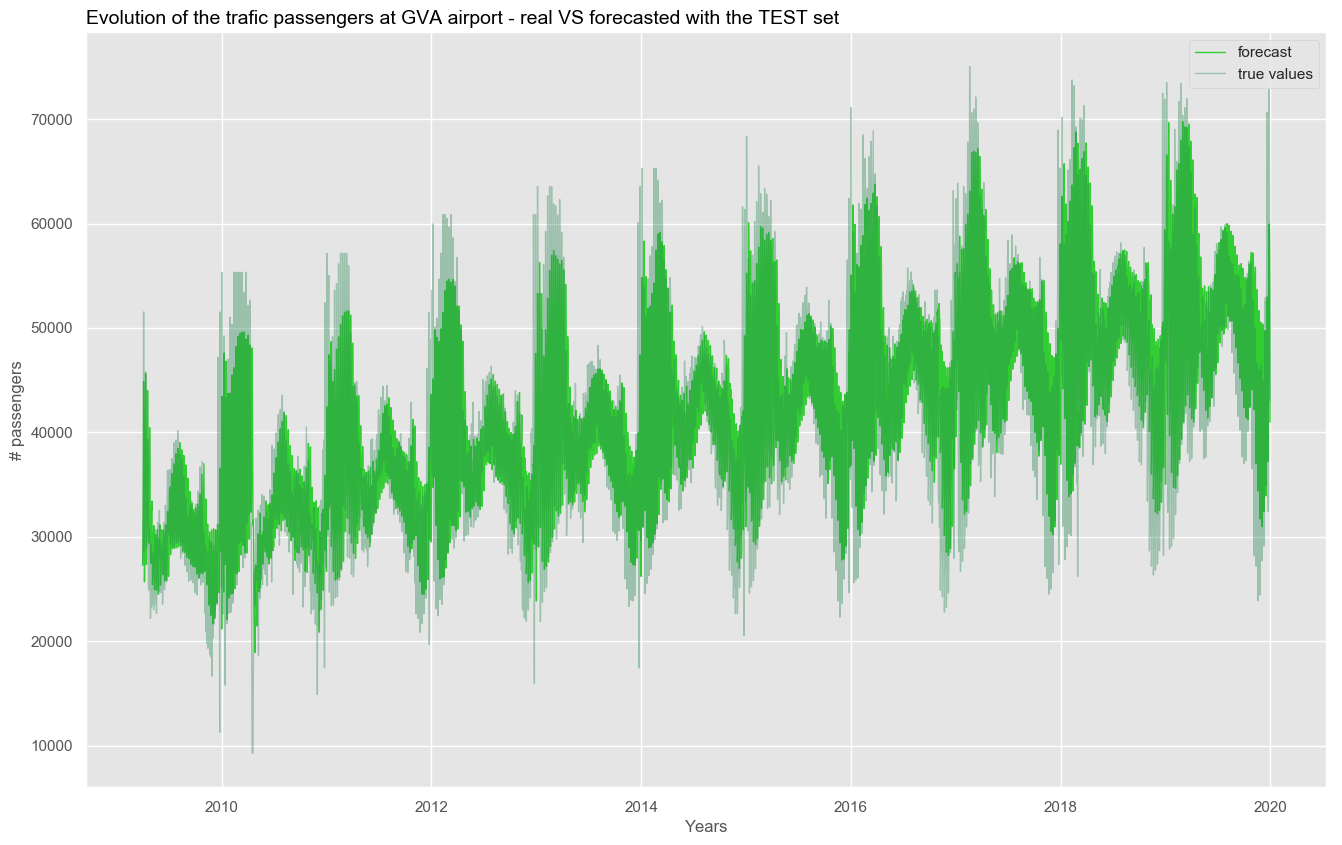

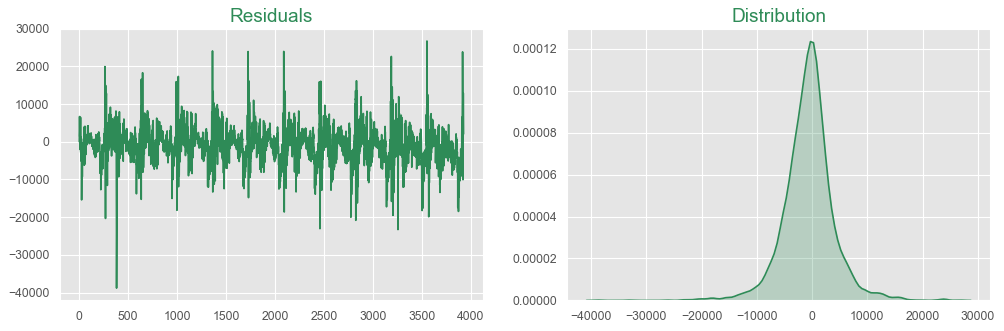

In [386]:
# 1.3.2.4. LR Lasso with the best MAE

features_col = []

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

# selecting the features and creating the datasets
features_col = ['date_jour_1', 'date_jour_2', 'date_jour_3', 'date_jour_4', 'date_jour_5', 'date_jour_6','season_spring', 'season_summer', 'season_winter', 'GDP_diff']
x_logdiff, y_logdiff, x_real, y_real, x_train_logdiff, y_train_logdiff, x_test_logdiff, y_test_logdiff, x_train_real, y_train_real, x_test_real, y_test_real = createsetsmultifeaturesMSadd(data_ofac_cleaned, 'GVA', 29, lg1='n', adcol=features_col)

# Lasso fitting
lasso = Lasso(alpha=lassminmaevalalpha, max_iter=1e5)   # using the previously best alpha result
lasso.fit(x_train_logdiff, y_train_logdiff)

# predicting
y_tr_pred = lasso.predict(x_train_logdiff)
y_te_pred = lasso.predict(x_test_logdiff)

y_tr_pred_r = revtransdiff(y_tr_pred, y_train_real)
y_te_pred_r = revtransdiff(y_te_pred, y_test_real)

res1324df = pd.DataFrame()
res1324df['y_test_real'] = y_test_real
res1324df['y_test_pred'] = y_te_pred_r

# coefficients
print('Coefficients:', lr.coef_)
print('Intercept:   ', lr.intercept_)

costfunctions(y_train_real, y_tr_pred_r)
res1324 = costfunctions(y_test_real, y_te_pred_r)
costfunctions(y_test_real, y_te_pred_r)

resulplot(y_te_pred_r, y_test_real, iata='GVA', dfindex=y_test_real)
residuals = residualsplotw(y_test_real, y_te_pred_r)

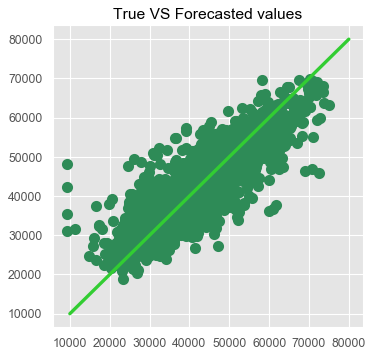

In [388]:
# Plotting
plt.style.use('ggplot')
plt.figure(figsize=(5,5), dpi=80)

# scatter plot
plt.scatter(y_test_real, y_te_pred_r, color='seagreen', linewidth=4, alpha=1)

val = np.arange(10000, 90000, 10000)

# Add title & legend
plt.title('True VS Forecasted values', fontsize=14, fontweight=0, color='black')
plt.xticks(val)
plt.yticks(val)

# creating a straight line
xline = val
yline = val
plt.plot(xline, yline, '-r', c='limegreen', linewidth=3)

plt.show()

Number of coefficients : 14


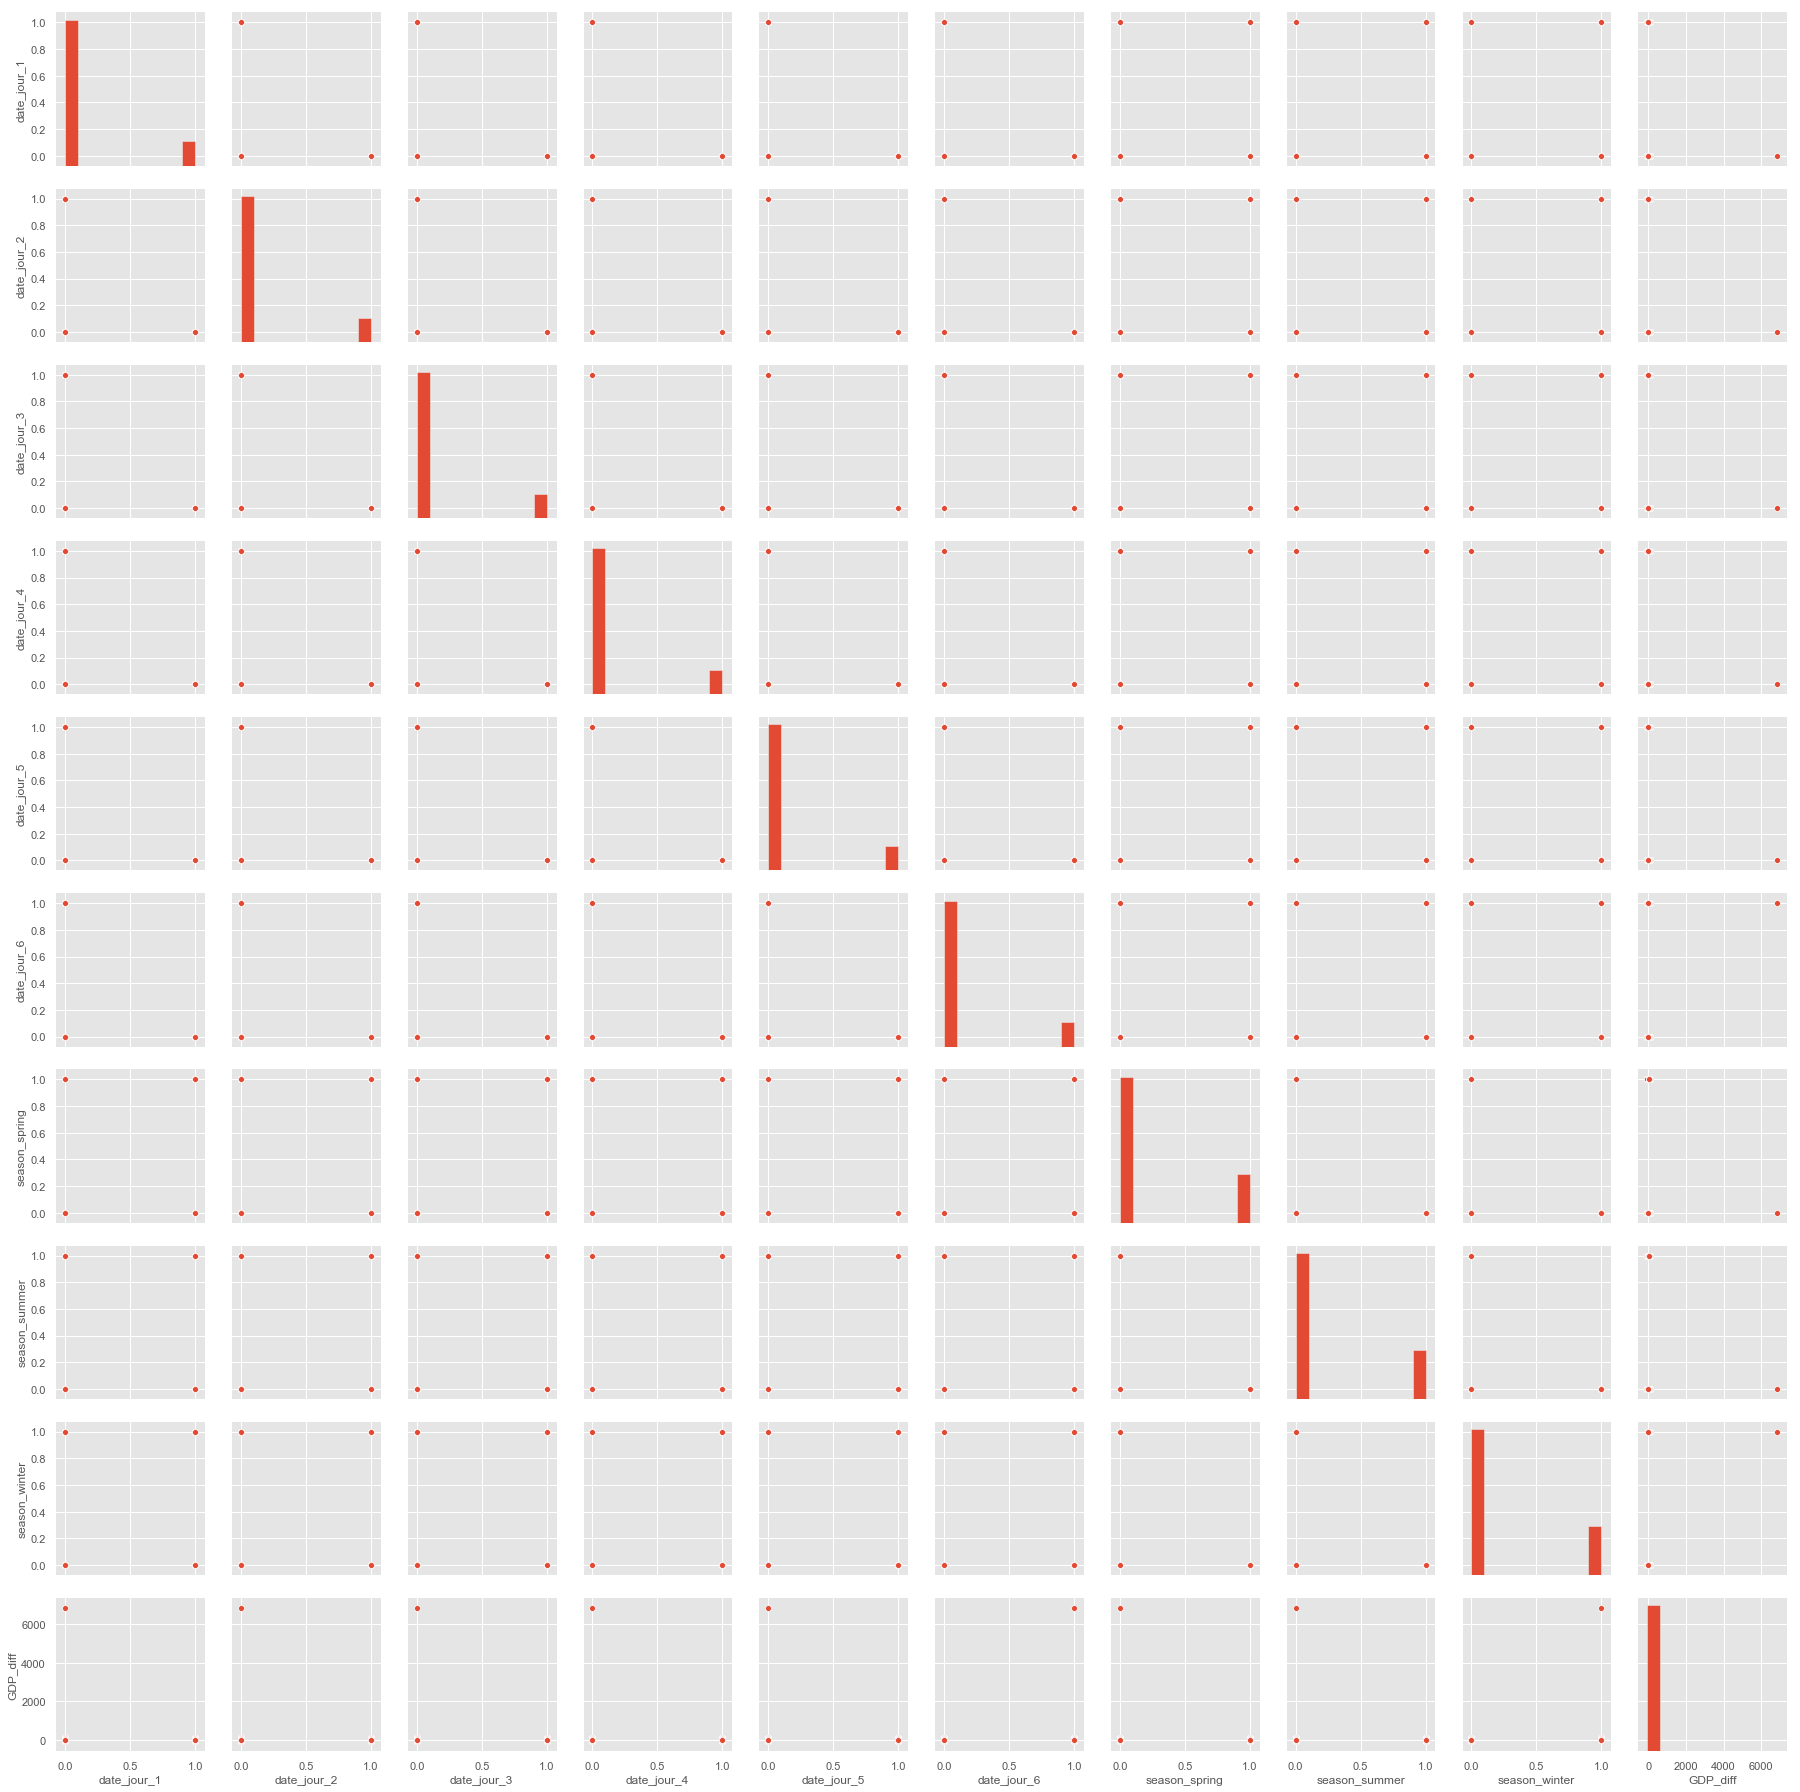

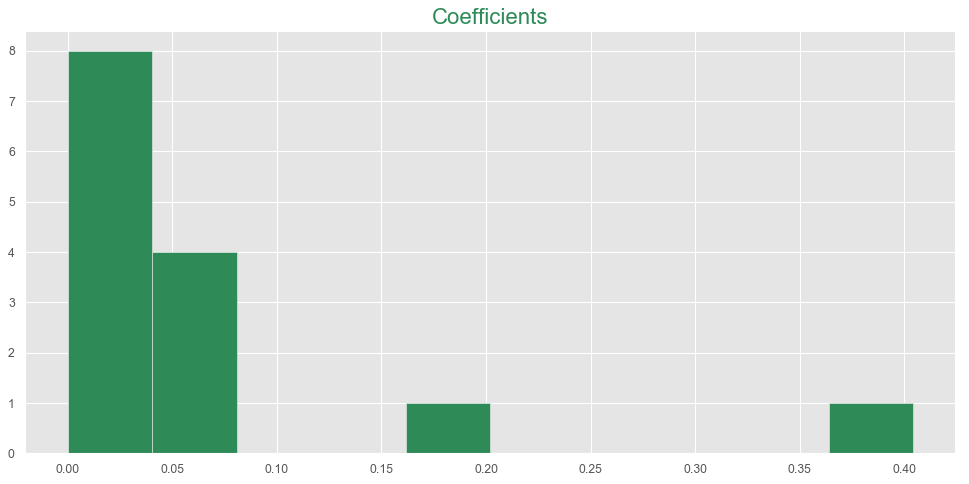

coeff name  (e)coefficient
0     date_jour_1       -0.000000
1     date_jour_2        0.037239
2     date_jour_3        0.044440
3     date_jour_4        0.048383
4     date_jour_5        0.062914
5     date_jour_6        0.000000
6   season_spring       -0.000000
7   season_summer        0.000000
8   season_winter        0.000000
9        GDP_diff       -0.000000
10          xGVA7        0.404213
11         xGVA14        0.201193
12         xGVA21        0.070337
13         xGVA28        0.016480

In [387]:
# 1.3.2.4. Inspecting the coefficients

# printing the number of coefficients
print('Number of coefficients : {}'.format(len(lasso.coef_)))

# creating a dataframe to have a better view
features_col_day = ['xGVA7','xGVA14','xGVA21','xGVA28']  # day lags that we are using
col_names = np.concatenate((features_col, features_col_day)) # concatenating with the features used in the LR
df_lassocoef = pd.DataFrame(zip(col_names, lasso.coef_), columns=['coeff name','(e)coefficient'])  #zip returns an iterator of tuples

# Pair plot of the selected features
sns.pairplot(data_ofac_cleaned.loc['1984-01-01':][features_col])
plt.show()

# plot of the distribution of the coefficients
fig = plt.figure(figsize=(15, 7), dpi=80)
plt.title('Coefficients', fontsize=20, color="seagreen")
plt.hist(lasso.coef_, bins=10, color='seagreen')
plt.show()

df_lassocoef

# 1.4. Linear regressions - consolidated results

In [233]:
LRconsres = []
LRconsres = pd.DataFrame(columns=['Nb', 'Model', 'MAE test', 'R2'])

# 1.2.1.1.1.
LRconsres = LRconsres.append({'Nb':'1.2.1.1.1.', 'Model':'Linear Regression 1d lag', 'MAE test':lr111res[lr111res['MAE te'] == lr111res['MAE te'].min()]['MAE te'].values[0], 'R2':lr111res[lr111res['MAE te'] == lr111res['MAE te'].min()]['R2'].values[0]}, ignore_index=True)
# 1.2.1.1.2.
LRconsres = LRconsres.append({'Nb':'1.2.1.1.2.','Model':'Linear Regression 1d lag TSsplit', 'MAE test':tss_score_gr[tss_score_gr['MAE'] == tss_score_gr['MAE'].min()]['MAE'].values[0], 'R2':tss_score_gr[tss_score_gr['MAE'] == tss_score_gr['MAE'].min()]['R2'].values[0]}, ignore_index=True)
# 1.2.1.1.3.
LRconsres = LRconsres.append({'Nb':'1.2.1.1.3.','Model':'LR Huber 7d lag', 'MAE test':lrhuber12113[0][0], 'R2':lrhuber12113[0][5]}, ignore_index=True)
# 1.3.1.1.1.
LRconsres = LRconsres.append({'Nb':'1.3.1.1.1.','Model':'LR Consecutive days TSsplit', 'MAE test':res13111[0][0], 'R2':res13111[0][5]}, ignore_index=True)
# 1.3.1.1.2.
LRconsres = LRconsres.append({'Nb':'1.3.1.1.2.','Model':'LR multiple of 7 days TSsplit', 'MAE test':res13112[0][0], 'R2':res13112[0][5]}, ignore_index=True)
# 1.3.1.1.3.
LRconsres = LRconsres.append({'Nb':'1.3.1.1.3.','Model':'LR over 7-14-21-28 days', 'MAE test':lr13113[0][0], 'R2':lr13113[0][5]}, ignore_index=True)
# 1.3.1.1.4.
LRconsres = LRconsres.append({'Nb':'1.3.1.1.4.','Model':'Huber over 7-14-21-28 days', 'MAE test':huber13114[0][0], 'R2':huber13114[0][5]}, ignore_index=True)
# 1.3.2.1.
LRconsres = LRconsres.append({'Nb':'1.3.2.1.','Model':'LR all features', 'MAE test':res1321[0], 'R2':res1321[5]}, ignore_index=True)
# 1.3.2.2.
LRconsres = LRconsres.append({'Nb':'1.3.2.2.','Model':'LR on selected features', 'MAE test':res1322[0], 'R2':res1322[5]}, ignore_index=True)
# 1.3.2.3.
LRconsres = LRconsres.append({'Nb':'1.3.2.3.','Model':'Huber on selected features', 'MAE test':huber1323[0][0], 'R2':huber1323[0][5]}, ignore_index=True)
# 1.3.2.4.
LRconsres = LRconsres.append({'Nb':'1.3.2.4.','Model':'Lasso on selected features', 'MAE test':res1324[0], 'R2':res1324[5]}, ignore_index=True)

LRconsres

Nb                             Model      MAE test        R2
0   1.2.1.1.1.          Linear Regression 1d lag   5269.519471  0.511899
1   1.2.1.1.2.  Linear Regression 1d lag TSsplit   1808.336175  0.533450
2   1.2.1.1.3.                   LR Huber 7d lag   2950.965929  0.818355
3   1.3.1.1.1.       LR Consecutive days TSsplit   4897.536775  0.505676
4   1.3.1.1.2.     LR multiple of 7 days TSsplit   4897.536775  0.505676
5   1.3.1.1.3.           LR over 7-14-21-28 days   3224.611917  0.788169
6   1.3.1.1.4.        Huber over 7-14-21-28 days   3122.630252  0.797220
7     1.3.2.1.                   LR all features  15090.731092 -1.968610
8     1.3.2.2.           LR on selected features   3124.306086  0.796359
9     1.3.2.3.        Huber on selected features   3193.826331  0.798331
10    1.3.2.4.        Lasso on selected features   3236.888464  0.791860

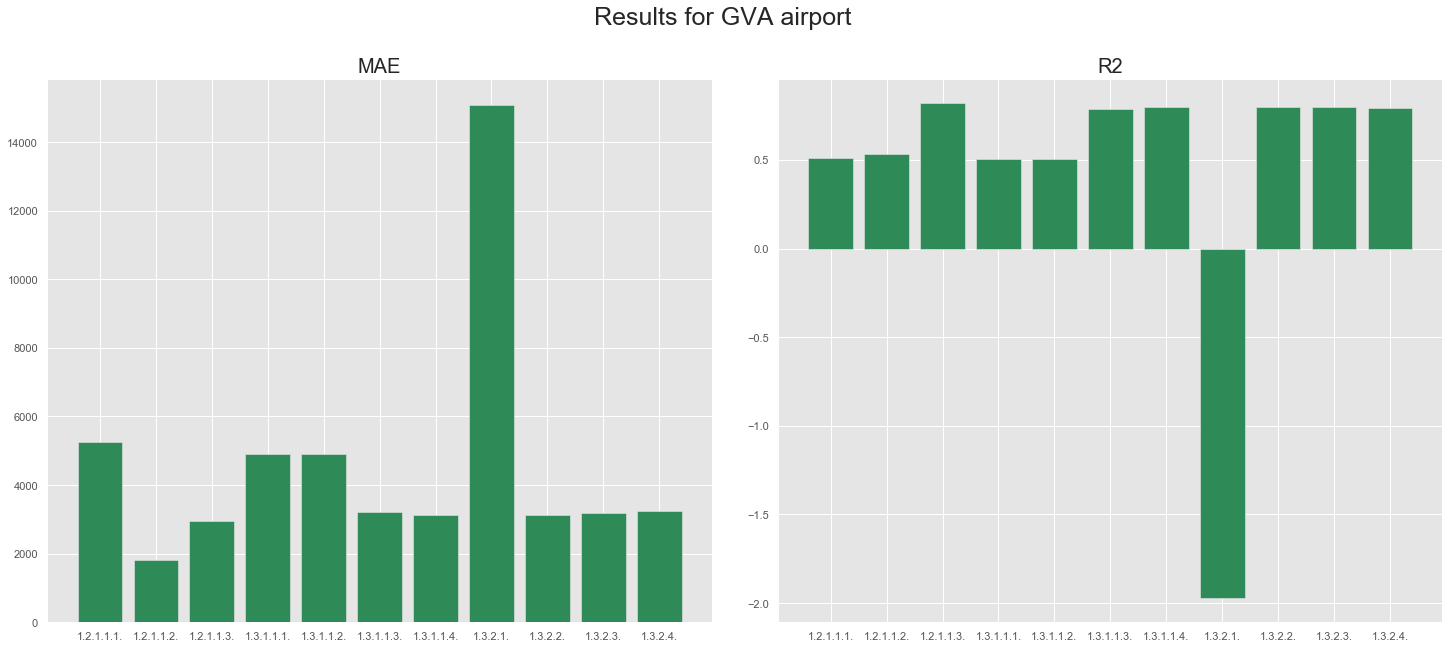

In [234]:
# plotting the results

plt.figure(figsize=(25,10))
plt.subplots_adjust(wspace=0.1)
plt.suptitle('Results for GVA airport', fontsize=25)

plt.subplot(1,2,1)
plt.title('MAE', fontsize=20)
height1 = LRconsres['MAE test']
bars1 = LRconsres['Nb']
y_pos1 = np.arange(len(bars1))
plt.bar(y_pos1, height1, color='seagreen')
plt.xticks(y_pos1, bars1)

plt.subplot(1,2,2)
plt.title('R2', fontsize=20)
height2 = LRconsres['R2']
bars2 = LRconsres['Nb']
y_pos2 = np.arange(len(bars2))
plt.bar(y_pos2, height2, color='seagreen')
plt.xticks(y_pos2, bars2)

# Show graphic
plt.show()

#np.arange(np.round(LRconsres['MAE test'].min(), -2), np.round(LRconsres['MAE test'].max(), -2)+1000, 1000)